In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import duckdb

import seaborn as sns

In [2]:
con = duckdb.connect('energy_data.duckdb')

print("Duckdb file created successfully!")

Duckdb file created successfully!


In [3]:
# # Create a table and insert data from a CSV file
con.execute("""
DROP TABLE IF EXISTS energy;
CREATE TABLE energy AS
SELECT * FROM read_csv_auto('/kaggle/input/lithuanian-power-consumption/power_consumption_data_2022_2024.csv')
""")


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [4]:
row_count = con.execute("SELECT COUNT(*) FROM energy").fetchone()[0]
print(f"Total rows: {row_count}")

Total rows: 5240120


In [5]:
pd.set_option('display.max_columns', None)
df_preview = con.execute("SELECT * FROM energy LIMIT 5").fetchdf()
df_preview

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


_type  \
0  datasets/gov/eso/jur_asm_elektros_suvartojimas...   
1  datasets/gov/eso/jur_asm_elektros_suvartojimas...   
2  datasets/gov/eso/jur_asm_elektros_suvartojimas...   
3  datasets/gov/eso/jur_asm_elektros_suvartojimas...   
4  datasets/gov/eso/jur_asm_elektros_suvartojimas...   

                                    _id                             _revision  \
0  a7348dbb-de47-4f63-b576-90caf97c54ce  009e4c15-b85e-4add-ba81-68ac9f4d1578   
1  450016ec-adc8-4890-836e-182811c470f4  36f2c8f6-5309-4c7e-8a59-20c3730c49c2   
2  15e26a94-4727-431e-9782-37c324aba31c  98c67821-02e7-45b2-8a85-04ac138bc331   
3  40247b6c-7330-44e3-90dc-0183f6f4552b  81e3f93b-8179-4b26-aa6d-2e5fb5e55de3   
4  26c75abd-87a2-43be-885a-ef2fb05f349a  c1259498-4ad1-406b-8be1-a7e49e3cafe9   

  _page.next         record_id        client_id        object_id  \
0       None  00000004b80ee158  f69c9fd5c754b40  c87042a79c715b9   
1       None  000002de2c6d608a  a576cce5d531f82  4c605e666c9e87e   
2       None  0000053cdc78efc0  b1736c42abd8f9a  e611d437da36b55   
3       None  0000062fe52b1cab  9026d1851b20610  84f2c59c7ca5651   
4       None  00000c0c9000680c  a651b64d9389030  1eeb59d15827cc3   

  object_municipality                object_address_grid_id     company_code  \
0    Kėdainių r. sav.  0d92d5df-fe07-48ea-9ef5-3f9582725c75  82db7ae8bfb22bb   
1   Klaipėdos m. sav.  a9906876-866c-4c71-b716-bdcc2377a278  fbc4a7cf03bd439   
2    Vilniaus m. sav.  16db17d7-678a-4e1e-93cc-7604f9959a69  27a01aa889fcbfa   
3       Visagino sav.  8289fac3-1982-462a-a060-44c360384ee1  5d9b40666e96b35   
4    Vilniaus m. sav.  b727acc1-768f-43d6-a62b-ba2e33f24265             None   

   industry_code valid_from valid_until billing_month  recovered_kwh  \
0       360000.0 1990-03-11         NaT    2023-01-01          14.13   
1       251100.0 2008-06-01         NaT    2024-09-01           0.00   
2       631200.0 2015-06-02         NaT    2024-04-01           0.00   
3       811000.0 2010-11-01         NaT    2023-12-01           0.00   
4            NaN 2021-05-19         NaT    2024-02-01           0.00   

   consumed_kwh  total_consumption_kwh data_provider  \
0        491.87                  506.0          None   
1        103.00                  103.0          None   
2        120.00                  120.0          None   
3        360.00                  360.0          None   
4        552.00                  552.0          None   

                company_address_grid_id  remote_metering automated_metering  \
0  4b362174-277a-4c4a-8bae-16d5ef292197             True                Aut   
1  a9906876-866c-4c71-b716-bdcc2377a278            False                Aut   
2  c5f0431e-05c6-4ab4-a683-0843869c183b            False               None   
3  8289fac3-1982-462a-a060-44c360384ee1            False                Aut   
4  356429d2-f08a-4597-a6f7-b252638bd163            False                Aut   

     email_address     phone_number  voltage_level  voltage_kv  \
0  1eabdc7fff07155  5ee4eb9d86a51a6  Žemoji įtampa        0.40   
1  fe2edf5e4e003b9  28c913034b02243  Žemoji įtampa        0.23   
2  4faad7bc623c744  8d7f598755f0a3b  Žemoji įtampa        0.40   
3  4e3f39e8bb8d826  1ce667c395fdff6  Žemoji įtampa        0.40   
4  2d20196c17b4132  0af41d8a59a5e67  Žemoji įtampa        0.40   

   allowed_power_kw  allowed_generation_power_kw  \
0               8.0                          0.0   
1               2.0                          0.0   
2               5.0                          0.0   
3              15.0                          0.0   
4              14.0                          0.0   

   installed_generation_power_kw producer_type  
0                            NaN          None  
1                            NaN          None  
2                            NaN          None  
3                            NaN          None  
4                            0.0          None

In [6]:
df_structure = con.execute("PRAGMA table_info('energy')").fetchdf()
print(df_structure)


    cid                           name     type  notnull dflt_value     pk
0     0                          _type  VARCHAR    False       None  False
1     1                            _id  VARCHAR    False       None  False
2     2                      _revision  VARCHAR    False       None  False
3     3                     _page.next  VARCHAR    False       None  False
4     4                      record_id  VARCHAR    False       None  False
5     5                      client_id  VARCHAR    False       None  False
6     6                      object_id  VARCHAR    False       None  False
7     7            object_municipality  VARCHAR    False       None  False
8     8         object_address_grid_id  VARCHAR    False       None  False
9     9                   company_code  VARCHAR    False       None  False
10   10                  industry_code   DOUBLE    False       None  False
11   11                     valid_from     DATE    False       None  False
12   12                  

In [7]:
df = con.execute("SELECT * FROM energy").fetchdf() 
print(df.head())

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

                                               _type  \
0  datasets/gov/eso/jur_asm_elektros_suvartojimas...   
1  datasets/gov/eso/jur_asm_elektros_suvartojimas...   
2  datasets/gov/eso/jur_asm_elektros_suvartojimas...   
3  datasets/gov/eso/jur_asm_elektros_suvartojimas...   
4  datasets/gov/eso/jur_asm_elektros_suvartojimas...   

                                    _id                             _revision  \
0  a7348dbb-de47-4f63-b576-90caf97c54ce  009e4c15-b85e-4add-ba81-68ac9f4d1578   
1  450016ec-adc8-4890-836e-182811c470f4  36f2c8f6-5309-4c7e-8a59-20c3730c49c2   
2  15e26a94-4727-431e-9782-37c324aba31c  98c67821-02e7-45b2-8a85-04ac138bc331   
3  40247b6c-7330-44e3-90dc-0183f6f4552b  81e3f93b-8179-4b26-aa6d-2e5fb5e55de3   
4  26c75abd-87a2-43be-885a-ef2fb05f349a  c1259498-4ad1-406b-8be1-a7e49e3cafe9   

  _page.next         record_id        client_id        object_id  \
0       None  00000004b80ee158  f69c9fd5c754b40  c87042a79c715b9   
1       None  000002de2c6d608a  a576cce5

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [8]:
unique_objects_per_municipality = df.groupby('object_municipality')['object_id'].nunique().reset_index()

# Rename columns for clarity
unique_objects_per_municipality.columns = ['municipality', 'unique_object_count']

# Sort descending for better view
unique_objects_per_municipality = unique_objects_per_municipality.sort_values(by='unique_object_count', ascending=False)

# Display top results
print(unique_objects_per_municipality)

           municipality  unique_object_count
48     Vilniaus m. sav.                43667
14        Kauno m. sav.                21468
18    Klaipėdos m. sav.                10129
49     Vilniaus r. sav.                 6134
30     Palangos m. sav.                 6118
15        Kauno r. sav.                 6117
54      Šiaulių m. sav.                 6021
19    Klaipėdos r. sav.                 4517
31    Panevėžio m. sav.                 4157
24    Marijampolės sav.                 2891
22     Kėdainių r. sav.                 2842
25     Mažeikių r. sav.                 2744
55      Šiaulių r. sav.                 2483
32    Panevėžio r. sav.                 2401
57      Šilutės r. sav.                 2338
36  Radviliškio r. sav.                 2318
42       Telšių r. sav.                 2283
44     Ukmergės r. sav.                 2260
47  Vilkaviškio r. sav.                 2203
41     Tauragės r. sav.                 2189
1       Alytaus m. sav.                 2086
45       U

In [9]:
# For each object_id, compute mean/median consumption
object_stats = df.groupby("object_id")["total_consumption_kwh"].agg(["mean", "std", "count"]).reset_index()
object_stats


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


object_id          mean          std  count
0       00001f7624bdf3c     29.027778     9.409679     36
1       000083d92810b12      6.851852     0.988538     27
2       00012af6dd56cbc  22178.472222  3675.335028     36
3       00014fe1a92350d    238.594595   103.444419     37
4       00015d6f234965e      1.080000     0.276887     25
...                 ...           ...          ...    ...
192350  fffe7d9517901a5      1.000000          NaN      1
192351  ffff1d6434927a9   5750.371429  2659.315448     35
192352  ffff4efa2ed9321    446.861111   257.259974     36
192353  ffff63e9f9c2c6f    183.500000    72.051767     36
192354  ffffe982f8ff734    148.000000          NaN      1

[192355 rows x 4 columns]

In [10]:
df.shape

(5240120, 29)

In [11]:
con.execute("""

CREATE OR REPLACE TABLE energy_clean AS
SELECT
  billing_month,
  total_consumption_kwh,
  consumed_kwh,
  recovered_kwh,
  object_municipality,
  object_address_grid_id,
  client_id,
  object_id,
  industry_code,
  voltage_level,
  voltage_kv,
  allowed_power_kw,
  allowed_generation_power_kw,
  installed_generation_power_kw,
  producer_type,
  remote_metering,
  automated_metering,
  valid_from,
  valid_until
FROM energy
WHERE billing_month IS NOT NULL AND total_consumption_kwh IS NOT NULL;
""")
print("Clean table created!")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Clean table created!


In [12]:
con.sql("SHOW TABLES").df()

name
0        energy
1  energy_clean

In [13]:
df_cleaned = con.execute("SELECT * FROM energy_clean").fetchdf()
print(df_cleaned.head())

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

  billing_month  total_consumption_kwh  consumed_kwh  recovered_kwh  \
0    2023-01-01                  506.0        491.87          14.13   
1    2024-09-01                  103.0        103.00           0.00   
2    2024-04-01                  120.0        120.00           0.00   
3    2023-12-01                  360.0        360.00           0.00   
4    2024-02-01                  552.0        552.00           0.00   

  object_municipality                object_address_grid_id        client_id  \
0    Kėdainių r. sav.  0d92d5df-fe07-48ea-9ef5-3f9582725c75  f69c9fd5c754b40   
1   Klaipėdos m. sav.  a9906876-866c-4c71-b716-bdcc2377a278  a576cce5d531f82   
2    Vilniaus m. sav.  16db17d7-678a-4e1e-93cc-7604f9959a69  b1736c42abd8f9a   
3       Visagino sav.  8289fac3-1982-462a-a060-44c360384ee1  9026d1851b20610   
4    Vilniaus m. sav.  b727acc1-768f-43d6-a62b-ba2e33f24265  a651b64d9389030   

         object_id  industry_code  voltage_level  voltage_kv  \
0  c87042a79c715b9       360

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [14]:
df_cleaned.head(1000).to_csv('df_cleaned.csv', index = False)


# **Feature Engineering**

**Extract year, quarter and month**

In [15]:
df_cleaned['billing_month'] = pd.to_datetime(df_cleaned['billing_month'])
df_cleaned['year'] = df_cleaned['billing_month'].dt.year
df_cleaned['month'] = df_cleaned['billing_month'].dt.month
df_cleaned['quarter'] = df_cleaned['billing_month'].dt.quarter
df_cleaned.head(2)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


billing_month  total_consumption_kwh  consumed_kwh  recovered_kwh  \
0    2023-01-01                  506.0        491.87          14.13   
1    2024-09-01                  103.0        103.00           0.00   

  object_municipality                object_address_grid_id        client_id  \
0    Kėdainių r. sav.  0d92d5df-fe07-48ea-9ef5-3f9582725c75  f69c9fd5c754b40   
1   Klaipėdos m. sav.  a9906876-866c-4c71-b716-bdcc2377a278  a576cce5d531f82   

         object_id  industry_code  voltage_level  voltage_kv  \
0  c87042a79c715b9       360000.0  Žemoji įtampa        0.40   
1  4c605e666c9e87e       251100.0  Žemoji įtampa        0.23   

   allowed_power_kw  allowed_generation_power_kw  \
0               8.0                          0.0   
1               2.0                          0.0   

   installed_generation_power_kw producer_type  remote_metering  \
0                            NaN          None             True   
1                            NaN          None            False   

  automated_metering valid_from valid_until  year  month  quarter  
0                Aut 1990-03-11         NaT  2023      1        1  
1                Aut 2008-06-01         NaT  2024      9        3

**Add Season**

In [16]:
def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Autumn'

df_cleaned['season'] = df_cleaned['month'].apply(get_season)
df_cleaned.head(3)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


billing_month  total_consumption_kwh  consumed_kwh  recovered_kwh  \
0    2023-01-01                  506.0        491.87          14.13   
1    2024-09-01                  103.0        103.00           0.00   
2    2024-04-01                  120.0        120.00           0.00   

  object_municipality                object_address_grid_id        client_id  \
0    Kėdainių r. sav.  0d92d5df-fe07-48ea-9ef5-3f9582725c75  f69c9fd5c754b40   
1   Klaipėdos m. sav.  a9906876-866c-4c71-b716-bdcc2377a278  a576cce5d531f82   
2    Vilniaus m. sav.  16db17d7-678a-4e1e-93cc-7604f9959a69  b1736c42abd8f9a   

         object_id  industry_code  voltage_level  voltage_kv  \
0  c87042a79c715b9       360000.0  Žemoji įtampa        0.40   
1  4c605e666c9e87e       251100.0  Žemoji įtampa        0.23   
2  e611d437da36b55       631200.0  Žemoji įtampa        0.40   

   allowed_power_kw  allowed_generation_power_kw  \
0               8.0                          0.0   
1               2.0                          0.0   
2               5.0                          0.0   

   installed_generation_power_kw producer_type  remote_metering  \
0                            NaN          None             True   
1                            NaN          None            False   
2                            NaN          None            False   

  automated_metering valid_from valid_until  year  month  quarter  season  
0                Aut 1990-03-11         NaT  2023      1        1  Winter  
1                Aut 2008-06-01         NaT  2024      9        3  Autumn  
2               None 2015-06-02         NaT  2024      4        2  Spring

In [17]:
#filtering
df_cleaned  = df_cleaned[df_cleaned['object_municipality'].notna()]

In [18]:
municipalities = df_cleaned['object_municipality'].unique()
len(municipalities)


60

In [19]:
municipalities

array(['Kėdainių r. sav.', 'Klaipėdos m. sav.', 'Vilniaus m. sav.',
       'Visagino sav.', 'Panevėžio r. sav.', 'Druskininkų sav.',
       'Kupiškio r. sav.', 'Neringos sav.', 'Šiaulių m. sav.',
       'Kalvarijos sav.', 'Šilalės r. sav.', 'Joniškio r. sav.',
       'Kauno r. sav.', 'Kauno m. sav.', 'Vilkaviškio r. sav.',
       'Marijampolės sav.', 'Ignalinos r. sav.', 'Palangos m. sav.',
       'Šilutės r. sav.', 'Raseinių r. sav.', 'Alytaus r. sav.',
       'Švenčionių r. sav.', 'Alytaus m. sav.', 'Kaišiadorių r. sav.',
       'Panevėžio m. sav.', 'Telšių r. sav.', 'Šalčininkų r. sav.',
       'Šakių r. sav.', 'Zarasų r. sav.', 'Plungės r. sav.',
       'Mažeikių r. sav.', 'Ukmergės r. sav.', 'Molėtų r. sav.',
       'Klaipėdos r. sav.', 'Skuodo r. sav.', 'Radviliškio r. sav.',
       'Trakų r. sav.', 'Birštono sav.', 'Lazdijų r. sav.',
       'Prienų r. sav.', 'Utenos r. sav.', 'Biržų r. sav.',
       'Jonavos r. sav.', 'Vilniaus r. sav.', 'Anykščių r. sav.',
       'Pakruojo r. s

In [20]:
#Handling the missing muncipality as we nee none in the last

municipality_df = pd.DataFrame({'municipality':municipalities})
municipality_df.to_csv("municipalities_list.csv",index = False)
municipality_df.head()

municipality
0   Kėdainių r. sav.
1  Klaipėdos m. sav.
2   Vilniaus m. sav.
3      Visagino sav.
4  Panevėžio r. sav.

In [21]:
import pandas as pd
from geopy.geocoders import Nominatim
from time import sleep

# List of municipalities
municipalities = {'Akmenės r. sav.': 'Akmenė, Lithuania',
                    'Alytaus m. sav.': 'Alytus, Lithuania',
                    'Alytaus r. sav.': 'Alytus district municipality, Lithuania',
                    'Anykščių r. sav.': 'Anykščiai district municipality, Lithuania',
                    'Birštono sav.': 'Birštonas, Lithuania',
                    'Biržų r. sav.': 'Biržai, Lithuania',
                    'Druskininkų sav.': 'Druskininkai, Lithuania',
                    'Elektrėnų sav.': 'Elektrėnai, Lithuania',
                    'Ignalinos r. sav.': 'Ignalina, Lithuania',
                    'Jonavos r. sav.': 'Jonava district municipality, Lithuania',
                    'Joniškio r. sav.': 'Joniškis, Lithuania',
                    'Jurbarko r. sav.': 'Jurbarkas district municipality, Lithuania',
                    'Kaišiadorių r. sav.': 'Kaišiadorys, Lithuania',
                    'Kalvarijos sav.': 'Kalvarija, Lithuania',
                    'Kauno m. sav.': 'Kaunas, Lithuania',
                    'Kauno r. sav.': 'Kaunas district municipality, Lithuania',
                    'Kazlų Rūdos sav.': 'Kazlų Rūda, Lithuania',
                    'Kėdainių r. sav.': 'Kėdainiai district municipality, Lithuania',
                    'Kelmės r. sav.': 'Kelmė, Lithuania',
                    'Klaipėdos m. sav.': 'Klaipėda, Lithuania',
                    'Klaipėdos r. sav.': 'Klaipėda district municipality, Lithuania',
                    'Kretingos r. sav.': 'Kretinga district municipality, Lithuania',
                    'Kupiškio r. sav.': 'Kupiškis, Lithuania',
                    'Lazdijų r. sav.': 'Lazdijai district municipality, Lithuania',
                    'Marijampolės sav.': 'Marijampolė, Lithuania',
                    'Mažeikių r. sav.': 'Mažeikiai district municipality, Lithuania',
                    'Molėtų r. sav.': 'Molėtai district municipality, Lithuania',
                    'Neringos sav.': 'Neringa, Lithuania',
                    'Pagėgių sav.': 'Pagėgiai, Lithuania',
                    'Pakruojo r. sav.': 'Pakruojis, Lithuania',
                    'Palangos m. sav.': 'Palanga, Lithuania', 
                    'Panevėžio m. sav.': 'Panevėžys, Lithuania',
                    'Panevėžio r. sav.': 'Panevėžys district municipality, Lithuania',
                    'Pasvalio r. sav.': 'Pasvalys, Lithuania',
                    'Plungės r. sav.': 'Plungė, Lithuania', 
                    'Prienų r. sav.': 'Prienai district municipality, Lithuania', 
                    'Radviliškio r. sav.': 'Radviliškis, Lithuania',
                    'Raseinių r. sav.': 'Raseiniai, Lithuania',
                    'Rietavo sav.': 'Rietavas, Lithuania', 
                    'Rokiškio r. sav.': 'Rokiškis district municipality, Lithuania', 
                    'Šakių r. sav.': 'Šakiai district municipality, Lithuania',
                    'Šalčininkų r. sav.': 'Šalčininkai, Lithuania',
                    'Šiaulių m. sav.': 'Šiauliai, Lithuania',
                    'Šiaulių r. sav.': 'Šiauliai district municipality, Lithuania',
                    'Šilalės r. sav.': 'Šilalė district municipality, Lithuania',
                    'Šilutės r. sav.': 'Šilutė district municipality, Lithuania', 
                    'Širvintų r. sav.': 'Širvintos district municipality, Lithuania',
                    'Skuodo r. sav.': 'Skuodas, Lithuania',
                    'Švenčionių r. sav.': 'Švenčionys, Lithuania', 
                    'Tauragės r. sav.': 'Tauragė, Lithuania',
                    'Telšių r. sav.': 'Telšiai, Lithuania', 
                    'Trakų r. sav.': 'Trakai district municipality, Lithuania',
                    'Ukmergės r. sav.': 'Ukmergė district municipality, Lithuania',
                    'Utenos r. sav.': 'Utena district municipality, Lithuania', 
                    'Varėnos r. sav.': 'Varėna, Lithuania',
                    'Vilkaviškio r. sav.': 'Vilkaviškis district municipality, Lithuania',
                    'Vilniaus m. sav.': 'Vilnius, Lithuania',
                    'Vilniaus r. sav.': 'Vilnius district municipality, Lithuania', 
                    'Visagino sav.': 'Visaginas, Lithuania',
                    'Zarasų r. sav.': 'Zarasai, Lithuania'}


# Setup dataframe
df = pd.DataFrame(list(municipalities.items()), columns=["municipality", "query"])
df["latitude"] = None
df["longitude"] = None

# Initialize geocoder
geolocator = Nominatim(user_agent="lt_municipality_locator") #unique userid that identifies me 

# Geocoding each municipality
for i, row in df.iterrows():
    try:
        location = geolocator.geocode(row["query"])
        if location:
            df.at[i, "latitude"] = location.latitude
            df.at[i, "longitude"] = location.longitude
            print(f" {row['municipality']} -> {location.latitude}, {location.longitude}")
        else:
            print(f" {row['municipality']} not found.")
    except Exception as e:
        print(f"Error with {row['municipality']}: {e}")
    sleep(1)  # Avoid rate limiting]

# Save results
df.to_csv("lithuania_municipalities_geocoded.csv", index=False)
print("Saved to lithuania_municipalities_geocoded.csv")


 Akmenės r. sav. -> 56.2460515, 22.7545972
 Alytaus m. sav. -> 54.3961344, 24.0459268
 Alytaus r. sav. -> 54.3647754, 23.8118762
 Anykščių r. sav. -> 55.335003, 24.8910886
 Birštono sav. -> 54.6043509, 24.0335131
 Biržų r. sav. -> 56.1999121, 24.7571107
 Druskininkų sav. -> 54.0171932, 23.9772282
 Elektrėnų sav. -> 54.786657, 24.6708398
 Ignalinos r. sav. -> 55.3398975, 26.1614043
 Jonavos r. sav. -> 54.4410008, 23.2544079
 Joniškio r. sav. -> 56.2412052, 23.6151344
 Jurbarko r. sav. -> 55.057394, 23.4677114
 Kaišiadorių r. sav. -> 54.8602337, 24.4544785
 Kalvarijos sav. -> 54.4143869, 23.2273639
 Kauno m. sav. -> 54.8982139, 23.9044817
 Kauno r. sav. -> 54.9615884, 23.7734915
 Kazlų Rūdos sav. -> 54.7520669, 23.4985141
 Kėdainių r. sav. -> 55.1376937, 23.7265625
 Kelmės r. sav. -> 55.6294679, 22.9313095
 Klaipėdos m. sav. -> 55.7127529, 21.1350469
 Klaipėdos r. sav. -> 55.6789671, 21.5137356
 Kretingos r. sav. -> 55.9686093, 21.3604059
 Kupiškio r. sav. -> 55.8388909, 24.9760431
 Lazd

* df_cleaned => feature engineer with month,year,quarter and seasonal columns 

* Then cleaned the null values

* municipalities => unique municipalities

* created geoencoded lithuania_municipalities_geocoded file 

* Nxt Merge both df_cleaned and the coordinates

In [22]:
df_coords = pd.read_csv("/kaggle/working/lithuania_municipalities_geocoded.csv")
df_coords.head()

municipality                                       query   latitude  \
0   Akmenės r. sav.                           Akmenė, Lithuania  56.246052   
1   Alytaus m. sav.                           Alytus, Lithuania  54.396134   
2   Alytaus r. sav.     Alytus district municipality, Lithuania  54.364775   
3  Anykščių r. sav.  Anykščiai district municipality, Lithuania  55.335003   
4     Birštono sav.                        Birštonas, Lithuania  54.604351   

   longitude  
0  22.754597  
1  24.045927  
2  23.811876  
3  24.891089  
4  24.033513

In [23]:
#Merging the coordinates into energy data

df_merged = df_cleaned.merge(df_coords[['municipality', 'latitude', 'longitude']],
                             left_on='object_municipality',
                             right_on='municipality',
                             how='left')
df_merged.head(3)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


billing_month  total_consumption_kwh  consumed_kwh  recovered_kwh  \
0    2023-01-01                  506.0        491.87          14.13   
1    2024-09-01                  103.0        103.00           0.00   
2    2024-04-01                  120.0        120.00           0.00   

  object_municipality                object_address_grid_id        client_id  \
0    Kėdainių r. sav.  0d92d5df-fe07-48ea-9ef5-3f9582725c75  f69c9fd5c754b40   
1   Klaipėdos m. sav.  a9906876-866c-4c71-b716-bdcc2377a278  a576cce5d531f82   
2    Vilniaus m. sav.  16db17d7-678a-4e1e-93cc-7604f9959a69  b1736c42abd8f9a   

         object_id  industry_code  voltage_level  voltage_kv  \
0  c87042a79c715b9       360000.0  Žemoji įtampa        0.40   
1  4c605e666c9e87e       251100.0  Žemoji įtampa        0.23   
2  e611d437da36b55       631200.0  Žemoji įtampa        0.40   

   allowed_power_kw  allowed_generation_power_kw  \
0               8.0                          0.0   
1               2.0                          0.0   
2               5.0                          0.0   

   installed_generation_power_kw producer_type  remote_metering  \
0                            NaN          None             True   
1                            NaN          None            False   
2                            NaN          None            False   

  automated_metering valid_from valid_until  year  month  quarter  season  \
0                Aut 1990-03-11         NaT  2023      1        1  Winter   
1                Aut 2008-06-01         NaT  2024      9        3  Autumn   
2               None 2015-06-02         NaT  2024      4        2  Spring   

        municipality   latitude  longitude  
0   Kėdainių r. sav.  55.137694  23.726562  
1  Klaipėdos m. sav.  55.712753  21.135047  
2   Vilniaus m. sav.  54.687046  25.282911

# **Column Selection**

In [24]:
selected_columns = [
    #Target variable
    'total_consumption_kwh',

    #Time Features
    'billing_month',
    'year',
    'month',
    'quarter',
    'season',

    #Location features
    'object_municipality',
    'latitude',
    'longitude',

    #Electrical Infra
    'voltage_kv',
    'allowed_power_kw',
    'allowed_generation_power_kw',
    'installed_generation_power_kw',


    #Metering
    'remote_metering',
    'automated_metering'

]

In [25]:
df_model = df_merged[selected_columns].copy()

In [26]:
df_model.head(3)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


total_consumption_kwh billing_month  year  month  quarter  season  \
0                  506.0    2023-01-01  2023      1        1  Winter   
1                  103.0    2024-09-01  2024      9        3  Autumn   
2                  120.0    2024-04-01  2024      4        2  Spring   

  object_municipality   latitude  longitude  voltage_kv  allowed_power_kw  \
0    Kėdainių r. sav.  55.137694  23.726562        0.40               8.0   
1   Klaipėdos m. sav.  55.712753  21.135047        0.23               2.0   
2    Vilniaus m. sav.  54.687046  25.282911        0.40               5.0   

   allowed_generation_power_kw  installed_generation_power_kw  \
0                          0.0                            NaN   
1                          0.0                            NaN   
2                          0.0                            NaN   

   remote_metering automated_metering  
0             True                Aut  
1            False                Aut  
2            False               None

In [27]:
missing_summary = df_model.isnull().sum().reset_index() #series to a df
missing_summary.columns = ["column", "missing_count"]
print(missing_summary[missing_summary["missing_count"] > 0])


                           column  missing_count
9                      voltage_kv           1004
10               allowed_power_kw           4734
11    allowed_generation_power_kw           4734
12  installed_generation_power_kw        5031446
14             automated_metering        2470521


## **Filling missing values**

In [28]:
# Handling automated metering df.method({col: value}, inplace=True)
df_model.fillna({'automated_metering':'unknown'},inplace = True)
df_model['automated_metering'].unique()

array(['Aut', 'unknown', 'DAut'], dtype=object)

Aut is Auto 

unknown=>for the missing values and 

DAut can be Disabled or Disconnectted automated?

In [29]:
df_model['automated_metering'] = df_model['automated_metering'].str.lower()
df_model['automated_metering'].unique()

array(['aut', 'unknown', 'daut'], dtype=object)

In [30]:
# Normalizing values

df_model['automated_metering_flag'] = df_model['automated_metering'].apply(lambda x: 1 if x in ['aut','daut'] else 0)
df_model.head(3)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


total_consumption_kwh billing_month  year  month  quarter  season  \
0                  506.0    2023-01-01  2023      1        1  Winter   
1                  103.0    2024-09-01  2024      9        3  Autumn   
2                  120.0    2024-04-01  2024      4        2  Spring   

  object_municipality   latitude  longitude  voltage_kv  allowed_power_kw  \
0    Kėdainių r. sav.  55.137694  23.726562        0.40               8.0   
1   Klaipėdos m. sav.  55.712753  21.135047        0.23               2.0   
2    Vilniaus m. sav.  54.687046  25.282911        0.40               5.0   

   allowed_generation_power_kw  installed_generation_power_kw  \
0                          0.0                            NaN   
1                          0.0                            NaN   
2                          0.0                            NaN   

   remote_metering automated_metering  automated_metering_flag  
0             True                aut                        1  
1            False                aut                        1  
2            False            unknown                        0

In [31]:
#  Filling missing generation-related columns with 0
df_model["allowed_generation_power_kw"] = df_model["allowed_generation_power_kw"].fillna(0)
df_model["installed_generation_power_kw"] = df_model["installed_generation_power_kw"].fillna(0)
df_model.head(3)

total_consumption_kwh billing_month  year  month  quarter  season  \
0                  506.0    2023-01-01  2023      1        1  Winter   
1                  103.0    2024-09-01  2024      9        3  Autumn   
2                  120.0    2024-04-01  2024      4        2  Spring   

  object_municipality   latitude  longitude  voltage_kv  allowed_power_kw  \
0    Kėdainių r. sav.  55.137694  23.726562        0.40               8.0   
1   Klaipėdos m. sav.  55.712753  21.135047        0.23               2.0   
2    Vilniaus m. sav.  54.687046  25.282911        0.40               5.0   

   allowed_generation_power_kw  installed_generation_power_kw  \
0                          0.0                            0.0   
1                          0.0                            0.0   
2                          0.0                            0.0   

   remote_metering automated_metering  automated_metering_flag  
0             True                aut                        1  
1            False                aut                        1  
2            False            unknown                        0

In [32]:
#Filling allowed power with median
median_allowed_power = df_model["allowed_power_kw"].median()
df_model["allowed_power_kw"] = df_model["allowed_power_kw"].fillna(median_allowed_power)
df_model.head(3)

total_consumption_kwh billing_month  year  month  quarter  season  \
0                  506.0    2023-01-01  2023      1        1  Winter   
1                  103.0    2024-09-01  2024      9        3  Autumn   
2                  120.0    2024-04-01  2024      4        2  Spring   

  object_municipality   latitude  longitude  voltage_kv  allowed_power_kw  \
0    Kėdainių r. sav.  55.137694  23.726562        0.40               8.0   
1   Klaipėdos m. sav.  55.712753  21.135047        0.23               2.0   
2    Vilniaus m. sav.  54.687046  25.282911        0.40               5.0   

   allowed_generation_power_kw  installed_generation_power_kw  \
0                          0.0                            0.0   
1                          0.0                            0.0   
2                          0.0                            0.0   

   remote_metering automated_metering  automated_metering_flag  
0             True                aut                        1  
1            False                aut                        1  
2            False            unknown                        0

In [33]:
#Filling voltage_kv with median (or drop if preferred)
median_voltage = df_model["voltage_kv"].median()
df_model["voltage_kv"] = df_model["voltage_kv"].fillna(median_voltage)
df_model.head(3)

total_consumption_kwh billing_month  year  month  quarter  season  \
0                  506.0    2023-01-01  2023      1        1  Winter   
1                  103.0    2024-09-01  2024      9        3  Autumn   
2                  120.0    2024-04-01  2024      4        2  Spring   

  object_municipality   latitude  longitude  voltage_kv  allowed_power_kw  \
0    Kėdainių r. sav.  55.137694  23.726562        0.40               8.0   
1   Klaipėdos m. sav.  55.712753  21.135047        0.23               2.0   
2    Vilniaus m. sav.  54.687046  25.282911        0.40               5.0   

   allowed_generation_power_kw  installed_generation_power_kw  \
0                          0.0                            0.0   
1                          0.0                            0.0   
2                          0.0                            0.0   

   remote_metering automated_metering  automated_metering_flag  
0             True                aut                        1  
1            False                aut                        1  
2            False            unknown                        0

# **Aggregation**

In [34]:
df_agg = df_model.groupby(["object_municipality", "year", "month"]).agg({
    "total_consumption_kwh": "sum",
    "allowed_power_kw": "mean",
    "remote_metering": "mean",
    "automated_metering_flag": "mean",
    "latitude": "first",
    "longitude": "first"
}).reset_index()
df_agg.head(5)

object_municipality  year  month  total_consumption_kwh  allowed_power_kw  \
0     Akmenės r. sav.  2022      1             7776567.00         41.396514   
1     Akmenės r. sav.  2022      2             6902665.00         48.878671   
2     Akmenės r. sav.  2022      3             7279188.08         49.204669   
3     Akmenės r. sav.  2022      4             6976821.00         48.792730   
4     Akmenės r. sav.  2022      5             6738225.00         49.799368   

   remote_metering  automated_metering_flag   latitude  longitude  
0         0.000726                 0.172113  56.246052  22.754597  
1         0.000773                 0.183153  56.246052  22.754597  
2         0.000778                 0.181323  56.246052  22.754597  
3         0.001547                 0.184068  56.246052  22.754597  
4         0.001580                 0.187204  56.246052  22.754597

In [35]:
df_agg.isnull().sum()

object_municipality        0
year                       0
month                      0
total_consumption_kwh      0
allowed_power_kw           0
remote_metering            0
automated_metering_flag    0
latitude                   0
longitude                  0
dtype: int64

In [36]:
#lets create a helper column so that it would be easy to fetch the data with correct names

df_agg["weather_query"] = df_agg["object_municipality"].map(municipalities)
df_agg.head()

object_municipality  year  month  total_consumption_kwh  allowed_power_kw  \
0     Akmenės r. sav.  2022      1             7776567.00         41.396514   
1     Akmenės r. sav.  2022      2             6902665.00         48.878671   
2     Akmenės r. sav.  2022      3             7279188.08         49.204669   
3     Akmenės r. sav.  2022      4             6976821.00         48.792730   
4     Akmenės r. sav.  2022      5             6738225.00         49.799368   

   remote_metering  automated_metering_flag   latitude  longitude  \
0         0.000726                 0.172113  56.246052  22.754597   
1         0.000773                 0.183153  56.246052  22.754597   
2         0.000778                 0.181323  56.246052  22.754597   
3         0.001547                 0.184068  56.246052  22.754597   
4         0.001580                 0.187204  56.246052  22.754597   

       weather_query  
0  Akmenė, Lithuania  
1  Akmenė, Lithuania  
2  Akmenė, Lithuania  
3  Akmenė, Lithuania  
4  Akmenė, Lithuania

# **Weather Integration**

Finding the nearest meteostat station for each municipality


In [37]:
# Extract unique municipalities with their coordinates
unique_municipalities = df_agg[['object_municipality', 'latitude', 'longitude','weather_query']].drop_duplicates().reset_index(drop=True)

print(f"Found {len(unique_municipalities)} unique municipalities")
display(unique_municipalities.head())

Found 60 unique municipalities


object_municipality   latitude  longitude  \
0     Akmenės r. sav.  56.246052  22.754597   
1     Alytaus m. sav.  54.396134  24.045927   
2     Alytaus r. sav.  54.364775  23.811876   
3    Anykščių r. sav.  55.335003  24.891089   
4       Birštono sav.  54.604351  24.033513   

                                weather_query  
0                           Akmenė, Lithuania  
1                           Alytus, Lithuania  
2     Alytus district municipality, Lithuania  
3  Anykščiai district municipality, Lithuania  
4                        Birštonas, Lithuania

In [38]:
!pip install meteostat

In [39]:
# Finding the nearest weather station for each municipality using Meteostat


from meteostat import Stations
import pandas as pd

# List to store results
station_mapping = []

# Loop through each municipality
for idx, row in unique_municipalities.iterrows():
    name = row['object_municipality']
    lat = row['latitude']
    lon = row['longitude']
    
    try:
        # Search for nearest station
        stations = Stations()
        stations = stations.nearby(lat, lon)
        station = stations.fetch(1)

        if not station.empty:
            station_id = station.index[0]
            station_mapping.append({'object_municipality': name, 'station_id': station_id})
            print(f"Found station for {name}: {station_id}")
        else:
            station_mapping.append({'object_municipality': name, 'station_id': None})
            print(f"No station found for {name}")
    except Exception as e:
        station_mapping.append({'object_municipality': name, 'station_id': None})
        print(f"Error for {name}: {e}")

# Save to DataFrame
station_df = pd.DataFrame(station_mapping)

Found station for Akmenės r. sav.: 26515
Found station for Alytaus m. sav.: 26737
Found station for Alytaus r. sav.: 26728
Found station for Anykščių r. sav.: 26634
Found station for Birštono sav.: 26629
Found station for Biržų r. sav.: 26531
Found station for Druskininkų sav.: 26728
Found station for Elektrėnų sav.: 26730
Found station for Ignalinos r. sav.: 26547
Found station for Jonavos r. sav.: 26728
Found station for Joniškio r. sav.: 26524
Found station for Jurbarko r. sav.: 26629
Found station for Kaišiadorių r. sav.: 26629
Found station for Kalvarijos sav.: 26728
Found station for Kauno m. sav.: 26629
Found station for Kauno r. sav.: 26629
Found station for Kazlų Rūdos sav.: 26629
Found station for Kelmės r. sav.: 26621
Found station for Klaipėdos m. sav.: 26509
Found station for Klaipėdos r. sav.: 26509
Found station for Kretingos r. sav.: 26502
Found station for Kupiškio r. sav.: EYPP0
Found station for Kėdainių r. sav.: 26629
Found station for Lazdijų r. sav.: 26728
Found s

In [40]:
station_df.to_csv('weather_stations_in_lithuania.csv',index = False)

In [41]:
station_df = pd.read_csv('/kaggle/working/weather_stations_in_lithuania.csv')

In [42]:
!pip install meteostat


In [43]:
from datetime import datetime
from meteostat import Monthly
import pandas as pd
from tqdm import tqdm

# Redefine municipality to station mapping
municipality_station_map = {
    'Akmenės r. sav.': '26515', 'Alytaus m. sav.': '26737', 'Alytaus r. sav.': '26728', 'Anykščių r. sav.': '26634',
    'Birštono sav.': '26629', 'Biržų r. sav.': '26531', 'Druskininkų sav.': '26728', 'Elektrėnų sav.': '26730',
    'Ignalinos r. sav.': '26547', 'Jonavos r. sav.': '26728', 'Joniškio r. sav.': '26524', 'Jurbarko r. sav.': '26629',
    'Kaišiadorių r. sav.': '26629', 'Kalvarijos sav.': '26728', 'Kauno m. sav.': '26629', 'Kauno r. sav.': '26629',
    'Kazlų Rūdos sav.': '26629', 'Kelmės r. sav.': '26621', 'Klaipėdos m. sav.': '26509', 'Klaipėdos r. sav.': '26509',
    'Kretingos r. sav.': '26502', 'Kupiškio r. sav.': 'EYPP0', 'Kėdainių r. sav.': '26629', 'Lazdijų r. sav.': '26728',
    'Marijampolės sav.': '26728', 'Mažeikių r. sav.': '26634', 'Molėtų r. sav.': '26634', 'Neringos sav.': '26603',
    'Pagėgių sav.': '26615', 'Pakruojo r. sav.': '26524', 'Palangos m. sav.': '26502', 'Panevėžio m. sav.': '26529',
    'Panevėžio r. sav.': '26730', 'Pasvalio r. sav.': '26531', 'Plungės r. sav.': '26515', 'Prienų r. sav.': '26629',
    'Radviliškio r. sav.': '26524', 'Raseinių r. sav.': '26621', 'Rietavo sav.': '26518', 'Rokiškio r. sav.': '26629',
    'Skuodo r. sav.': '26503', 'Tauragės r. sav.': '26615', 'Telšių r. sav.': '26515', 'Trakų r. sav.': '26730',
    'Ukmergės r. sav.': '26634', 'Utenos r. sav.': '26634', 'Varėnos r. sav.': '26737', 'Vilkaviškio r. sav.': '26713',
    'Vilniaus m. sav.': '26730', 'Vilniaus r. sav.': '26730', 'Visagino sav.': '26547', 'Zarasų r. sav.': '26547',
    'Šakių r. sav.': '26634', 'Šalčininkų r. sav.': '26730', 'Šiaulių m. sav.': '26524', 'Šiaulių r. sav.': '26600',
    'Šilalės r. sav.': '26600', 'Šilutės r. sav.': '26600', 'Širvintų r. sav.': '26713', 'Švenčionių r. sav.': '26645'
}

# Set date range
start = datetime(2022, 1, 1)
end = datetime(2024, 12, 31)

# Fetch and collect weather data
all_weather = []
for municipality, station_id in tqdm(municipality_station_map.items()):
    try:
        data = Monthly(station_id, start, end).fetch()
        data = data.reset_index()
        data['year'] = data['time'].dt.year
        data['month'] = data['time'].dt.month
        data['object_municipality'] = municipality
        data = data[['object_municipality', 'year', 'month', 'tavg', 'tmin', 'tmax', 'prcp', 'wspd']]
        all_weather.append(data)
    except Exception as e:
        print(f" Failed to fetch data for {municipality} ({station_id}): {e}")

# Combine all into one DataFrame
weather_df = pd.concat(all_weather, ignore_index=True)


100%|██████████| 60/60 [00:06<00:00,  8.82it/s]


In [44]:
weather_df

object_municipality  year  month  tavg  tmin  tmax   prcp  wspd
0        Alytaus m. sav.  2022      1  -0.7  -3.0   1.0   93.8  12.0
1        Alytaus m. sav.  2022      2   0.7  -1.4   3.4   58.8  11.3
2        Alytaus m. sav.  2022      4   5.3   0.8   9.5   35.9   8.0
3        Alytaus m. sav.  2022      6  18.1  13.0  23.1   75.4   6.3
4        Alytaus m. sav.  2022      7  18.0  13.6  22.5   98.1   7.0
...                  ...   ...    ...   ...   ...   ...    ...   ...
1610  Švenčionių r. sav.  2024      5  14.6   9.2  19.9    7.3   7.6
1611  Švenčionių r. sav.  2024      6  18.0  13.1  22.8   43.9   6.8
1612  Švenčionių r. sav.  2024      7  19.5  15.7  23.7  126.1   7.6
1613  Švenčionių r. sav.  2024     10   7.3   4.5  10.3   37.7   8.6
1614  Švenčionių r. sav.  2024     11   2.3   1.0   3.8   49.7  12.0

[1615 rows x 8 columns]

In [45]:
weather_df.to_csv('fetched_weather_with_missing_values.csv', index = False)

In [46]:
#Merging the data to check which rows are missing


merged_df = pd.merge(
    df_agg,
    weather_df,
    on=['object_municipality', 'year', 'month'],
    how='left'
)

# Display the first few rows of the merged DataFrame to check the result
print(merged_df.head())

  object_municipality  year  month  total_consumption_kwh  allowed_power_kw  \
0     Akmenės r. sav.  2022      1             7776567.00         41.396514   
1     Akmenės r. sav.  2022      2             6902665.00         48.878671   
2     Akmenės r. sav.  2022      3             7279188.08         49.204669   
3     Akmenės r. sav.  2022      4             6976821.00         48.792730   
4     Akmenės r. sav.  2022      5             6738225.00         49.799368   

   remote_metering  automated_metering_flag   latitude  longitude  \
0         0.000726                 0.172113  56.246052  22.754597   
1         0.000773                 0.183153  56.246052  22.754597   
2         0.000778                 0.181323  56.246052  22.754597   
3         0.001547                 0.184068  56.246052  22.754597   
4         0.001580                 0.187204  56.246052  22.754597   

       weather_query  tavg  tmin  tmax  prcp  wspd  
0  Akmenė, Lithuania   NaN   NaN   NaN   NaN   NaN  
1  A

In [47]:
merged_df.head(5)

object_municipality  year  month  total_consumption_kwh  allowed_power_kw  \
0     Akmenės r. sav.  2022      1             7776567.00         41.396514   
1     Akmenės r. sav.  2022      2             6902665.00         48.878671   
2     Akmenės r. sav.  2022      3             7279188.08         49.204669   
3     Akmenės r. sav.  2022      4             6976821.00         48.792730   
4     Akmenės r. sav.  2022      5             6738225.00         49.799368   

   remote_metering  automated_metering_flag   latitude  longitude  \
0         0.000726                 0.172113  56.246052  22.754597   
1         0.000773                 0.183153  56.246052  22.754597   
2         0.000778                 0.181323  56.246052  22.754597   
3         0.001547                 0.184068  56.246052  22.754597   
4         0.001580                 0.187204  56.246052  22.754597   

       weather_query  tavg  tmin  tmax  prcp  wspd  
0  Akmenė, Lithuania   NaN   NaN   NaN   NaN   NaN  
1  Akmenė, Lithuania   NaN   NaN   NaN   NaN   NaN  
2  Akmenė, Lithuania   NaN   NaN   NaN   NaN   NaN  
3  Akmenė, Lithuania   NaN   NaN   NaN   NaN   NaN  
4  Akmenė, Lithuania   NaN   NaN   NaN   NaN   NaN

In [48]:
#checking for missing values
# Columns used to detect missing weather
weather_columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wspd']

# Find rows where all weather data is missing
missing_weather_df = merged_df[merged_df[weather_columns].isnull().all(axis=1)].copy()

print(f"Missing weather rows: {len(missing_weather_df)}")
missing_weather_df.head()


Missing weather rows: 545


object_municipality  year  month  total_consumption_kwh  allowed_power_kw  \
0     Akmenės r. sav.  2022      1             7776567.00         41.396514   
1     Akmenės r. sav.  2022      2             6902665.00         48.878671   
2     Akmenės r. sav.  2022      3             7279188.08         49.204669   
3     Akmenės r. sav.  2022      4             6976821.00         48.792730   
4     Akmenės r. sav.  2022      5             6738225.00         49.799368   

   remote_metering  automated_metering_flag   latitude  longitude  \
0         0.000726                 0.172113  56.246052  22.754597   
1         0.000773                 0.183153  56.246052  22.754597   
2         0.000778                 0.181323  56.246052  22.754597   
3         0.001547                 0.184068  56.246052  22.754597   
4         0.001580                 0.187204  56.246052  22.754597   

       weather_query  tavg  tmin  tmax  prcp  wspd  
0  Akmenė, Lithuania   NaN   NaN   NaN   NaN   NaN  
1  Akmenė, Lithuania   NaN   NaN   NaN   NaN   NaN  
2  Akmenė, Lithuania   NaN   NaN   NaN   NaN   NaN  
3  Akmenė, Lithuania   NaN   NaN   NaN   NaN   NaN  
4  Akmenė, Lithuania   NaN   NaN   NaN   NaN   NaN

In [49]:
# import requests
# import time
# import pandas as pd

# # Container for newly fetched weather
# new_weather_data = []

# # Loop through missing rows
# for idx, row in missing_weather_df.iterrows():
#     lat = row['latitude']
#     lon = row['longitude']
#     year = int(row['year'])
#     month = int(row['month'])

#     # Build start/end dates
#     start_date = f"{year}-{month:02d}-01"
#     if month == 12:
#         end_date = f"{year+1}-01-01"
#     else:
#         end_date = f"{year}-{month+1:02d}-01"

#     # Open-Meteo API URL
#     url = (
#         f"https://archive-api.open-meteo.com/v1/archive?"
#         f"latitude={lat}&longitude={lon}"
#         f"&start_date={start_date}&end_date={end_date}"
#         f"&daily=temperature_2m_min,temperature_2m_max,temperature_2m_mean,precipitation_sum,windspeed_10m_max"
#         f"&timezone=auto"
#     )

#     try:
#         response = requests.get(url)
#         response.raise_for_status()
#         data = response.json()

#         if 'daily' not in data or len(data['daily']['time']) == 0:
#             print(f" No data for {row['object_municipality']} ({year}-{month})")
#             continue

#         # Convert to DataFrame
#         daily = pd.DataFrame(data['daily'])

#         # Compute monthly averages/sum
#         tavg = daily['temperature_2m_mean'].mean()
#         tmin = daily['temperature_2m_min'].min()
#         tmax = daily['temperature_2m_max'].max()
#         prcp = daily['precipitation_sum'].sum()
#         wspd = daily['windspeed_10m_max'].mean()

#         new_weather_data.append({
#             'object_municipality': row['object_municipality'],
#             'year': year,
#             'month': month,
#             'tavg': tavg,
#             'tmin': tmin,
#             'tmax': tmax,
#             'prcp': prcp,
#             'wspd': wspd
#         })

#         print(f"Weather fetched for {row['object_municipality']} ({year}-{month})")
#         time.sleep(0.6)  # to respect rate limit

#     except Exception as e:
#         print(f"Error for {row['object_municipality']} ({year}-{month}): {e}")
#         continue

# # Create DataFrame
# fetched_weather_df = pd.DataFrame(new_weather_data)
# fetched_weather_df.to_csv('all_missing_weather_data.csv',index = False)


In [50]:
# fetched_weather_df.head()

In [51]:
fetched_weather_df = pd.read_csv('/kaggle/input/municipalities-coordinates-and-weather-data/all_missing_weather_data.csv')
fetched_weather_df.head()

object_municipality  year  month       tavg  tmin  tmax  prcp       wspd
0     Akmenės r. sav.  2022      1  -0.309375 -14.7   5.8  67.7  23.834375
1     Akmenės r. sav.  2022      2   0.889655  -6.4   6.7  96.2  24.144828
2     Akmenės r. sav.  2022      3   1.003125  -7.5  13.3   3.5  16.093750
3     Akmenės r. sav.  2022      4   5.012903  -5.7  16.4  55.0  21.129032
4     Akmenės r. sav.  2022      5  10.484375  -1.9  21.1  92.8  20.603125

In [52]:
weather_columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wspd']

# Find rows where all weather data is missing
missing_weather_df1 = fetched_weather_df[fetched_weather_df[weather_columns].isnull().all(axis=1)].copy()

print(f"Missing weather rows: {len(missing_weather_df1)}")
missing_weather_df1.head()


Missing weather rows: 0


Empty DataFrame
Columns: [object_municipality, year, month, tavg, tmin, tmax, prcp, wspd]
Index: []

In [53]:
# Check data types for merging keys
print("merged_df dtypes:")
print(merged_df[['object_municipality', 'year', 'month']].dtypes)

print("\nfetched_weather_df dtypes:")
print(fetched_weather_df[['object_municipality', 'year', 'month']].dtypes)


merged_df dtypes:
object_municipality    object
year                    int32
month                   int32
dtype: object

fetched_weather_df dtypes:
object_municipality    object
year                    int64
month                   int64
dtype: object


In [54]:
fetched_weather_df.head()

object_municipality  year  month       tavg  tmin  tmax  prcp       wspd
0     Akmenės r. sav.  2022      1  -0.309375 -14.7   5.8  67.7  23.834375
1     Akmenės r. sav.  2022      2   0.889655  -6.4   6.7  96.2  24.144828
2     Akmenės r. sav.  2022      3   1.003125  -7.5  13.3   3.5  16.093750
3     Akmenės r. sav.  2022      4   5.012903  -5.7  16.4  55.0  21.129032
4     Akmenės r. sav.  2022      5  10.484375  -1.9  21.1  92.8  20.603125

In [55]:
# Merge on municipality, year, month, adding suffix only to new weather columns
merged = merged_df.merge(
    fetched_weather_df,
    on=['object_municipality', 'year', 'month'],
    how='left',
    suffixes=('', '_fetched')
)

# Replace missing values in original weather columns using fetched data
for col in ['tavg', 'tmin', 'tmax', 'prcp', 'wspd']:
    fetched_col = f"{col}_fetched"
    if fetched_col in merged.columns:
        merged[col] = merged[col].combine_first(merged[fetched_col])

# Drop the temporary '_fetched' columns
merged.drop(columns=[f"{col}_fetched" for col in ['tavg', 'tmin', 'tmax', 'prcp', 'wspd']], inplace=True)

print("✅ Weather columns filled and cleaned.")


✅ Weather columns filled and cleaned.


In [56]:
merged.head(5)

object_municipality  year  month  total_consumption_kwh  allowed_power_kw  \
0     Akmenės r. sav.  2022      1             7776567.00         41.396514   
1     Akmenės r. sav.  2022      2             6902665.00         48.878671   
2     Akmenės r. sav.  2022      3             7279188.08         49.204669   
3     Akmenės r. sav.  2022      4             6976821.00         48.792730   
4     Akmenės r. sav.  2022      5             6738225.00         49.799368   

   remote_metering  automated_metering_flag   latitude  longitude  \
0         0.000726                 0.172113  56.246052  22.754597   
1         0.000773                 0.183153  56.246052  22.754597   
2         0.000778                 0.181323  56.246052  22.754597   
3         0.001547                 0.184068  56.246052  22.754597   
4         0.001580                 0.187204  56.246052  22.754597   

       weather_query       tavg  tmin  tmax  prcp       wspd  
0  Akmenė, Lithuania  -0.309375 -14.7   5.8  67.7  23.834375  
1  Akmenė, Lithuania   0.889655  -6.4   6.7  96.2  24.144828  
2  Akmenė, Lithuania   1.003125  -7.5  13.3   3.5  16.093750  
3  Akmenė, Lithuania   5.012903  -5.7  16.4  55.0  21.129032  
4  Akmenė, Lithuania  10.484375  -1.9  21.1  92.8  20.603125

In [57]:
# Check for any remaining missing weather values
missing_counts = merged[['tavg', 'tmin', 'tmax', 'prcp', 'wspd']].isna().sum()

print("Remaining missing values per weather column:")
print(missing_counts)



Remaining missing values per weather column:
tavg      1
tmin     21
tmax      7
prcp    198
wspd     40
dtype: int64


<Axes: xlabel='tmin', ylabel='Count'>

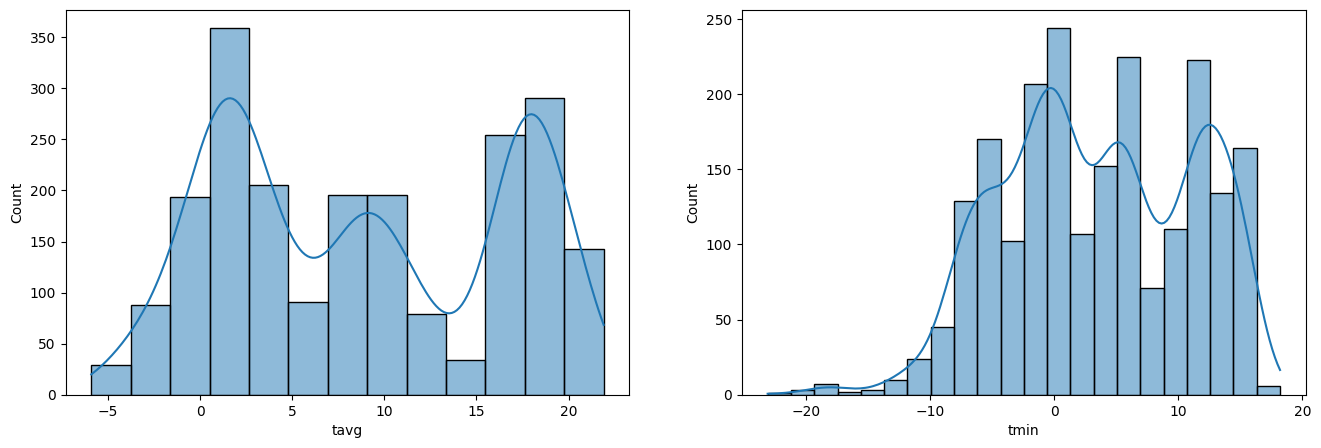

In [58]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(merged['tavg'], kde=True)

plt.subplot(1,2,2)
sns.histplot(merged['tmin'], kde=True)

In [59]:
merged.head()

object_municipality  year  month  total_consumption_kwh  allowed_power_kw  \
0     Akmenės r. sav.  2022      1             7776567.00         41.396514   
1     Akmenės r. sav.  2022      2             6902665.00         48.878671   
2     Akmenės r. sav.  2022      3             7279188.08         49.204669   
3     Akmenės r. sav.  2022      4             6976821.00         48.792730   
4     Akmenės r. sav.  2022      5             6738225.00         49.799368   

   remote_metering  automated_metering_flag   latitude  longitude  \
0         0.000726                 0.172113  56.246052  22.754597   
1         0.000773                 0.183153  56.246052  22.754597   
2         0.000778                 0.181323  56.246052  22.754597   
3         0.001547                 0.184068  56.246052  22.754597   
4         0.001580                 0.187204  56.246052  22.754597   

       weather_query       tavg  tmin  tmax  prcp       wspd  
0  Akmenė, Lithuania  -0.309375 -14.7   5.8  67.7  23.834375  
1  Akmenė, Lithuania   0.889655  -6.4   6.7  96.2  24.144828  
2  Akmenė, Lithuania   1.003125  -7.5  13.3   3.5  16.093750  
3  Akmenė, Lithuania   5.012903  -5.7  16.4  55.0  21.129032  
4  Akmenė, Lithuania  10.484375  -1.9  21.1  92.8  20.603125

In [60]:


merged['tmin'] = merged.groupby(['object_municipality', 'month'])['tmin'].transform(
    lambda x: x.fillna(x.mean())
)

# Step 2: For any remaining missing tmin values, fill using only month average
merged['tmin'] = merged.groupby('month')['tmin'].transform(
    lambda x: x.fillna(x.mean())
)


In [61]:
missing_counts = merged[['tavg', 'tmin', 'tmax', 'prcp', 'wspd']].isna().sum()

print("Remaining missing values per weather column:")
print(missing_counts)


Remaining missing values per weather column:
tavg      1
tmin      0
tmax      7
prcp    198
wspd     40
dtype: int64


In [62]:
#Fill missing tmax using municipality + month average
merged['tmax'] = merged.groupby(['object_municipality', 'month'])['tmax'].transform(
    lambda x: x.fillna(x.mean())
)

#Fill remaining tmax using month average across all municipalities
merged['tmax'] = merged.groupby('month')['tmax'].transform(
    lambda x: x.fillna(x.mean())
)

In [63]:
missing_counts = merged[['tavg', 'tmin', 'tmax', 'prcp', 'wspd']].isna().sum()

print("Remaining missing values per weather column:")
print(missing_counts)


Remaining missing values per weather column:
tavg      1
tmin      0
tmax      0
prcp    198
wspd     40
dtype: int64


In [64]:
# Step 1: Fill missing wspd using municipality + month average
merged['wspd'] = merged.groupby(['object_municipality', 'month'])['wspd'].transform(
    lambda x: x.fillna(x.mean())
)

# Step 2: Fill remaining wspd using overall month average
merged['wspd'] = merged.groupby('month')['wspd'].transform(
    lambda x: x.fillna(x.mean())
)


In [65]:
missing_counts = merged[['tavg', 'tmin', 'tmax', 'prcp', 'wspd']].isna().sum()

print("Remaining missing values per weather column:")
print(missing_counts)


Remaining missing values per weather column:
tavg      1
tmin      0
tmax      0
prcp    198
wspd      0
dtype: int64


In [66]:
# Step 1: Fill missing prcp using municipality + month average
merged['prcp'] = merged.groupby(['object_municipality', 'month'])['prcp'].transform(
    lambda x: x.fillna(x.mean())
)

# Step 2: Fill any remaining prcp using overall month average
merged['prcp'] = merged.groupby('month')['prcp'].transform(
    lambda x: x.fillna(x.mean())
)


In [67]:
missing_counts = merged[['tavg', 'tmin', 'tmax', 'prcp', 'wspd']].isna().sum()

print("Remaining missing values per weather column:")
print(missing_counts)


Remaining missing values per weather column:
tavg    1
tmin    0
tmax    0
prcp    0
wspd    0
dtype: int64


In [68]:
# Step 1: Fill missing prcp using municipality + month average
merged['tavg'] = merged.groupby(['object_municipality', 'month'])['tavg'].transform(
    lambda x: x.fillna(x.mean())
)

# Step 2: Fill any remaining prcp using overall month average
merged['tavg'] = merged.groupby('month')['tavg'].transform(
    lambda x: x.fillna(x.mean())
)


In [69]:
missing_counts = merged[['tavg', 'tmin', 'tmax', 'prcp', 'wspd']].isna().sum()

print("Remaining missing values per weather column:")
print(missing_counts)

Remaining missing values per weather column:
tavg    0
tmin    0
tmax    0
prcp    0
wspd    0
dtype: int64


# **Visualizations for EDA**

## **Monthly Electricity Consumption Trend**

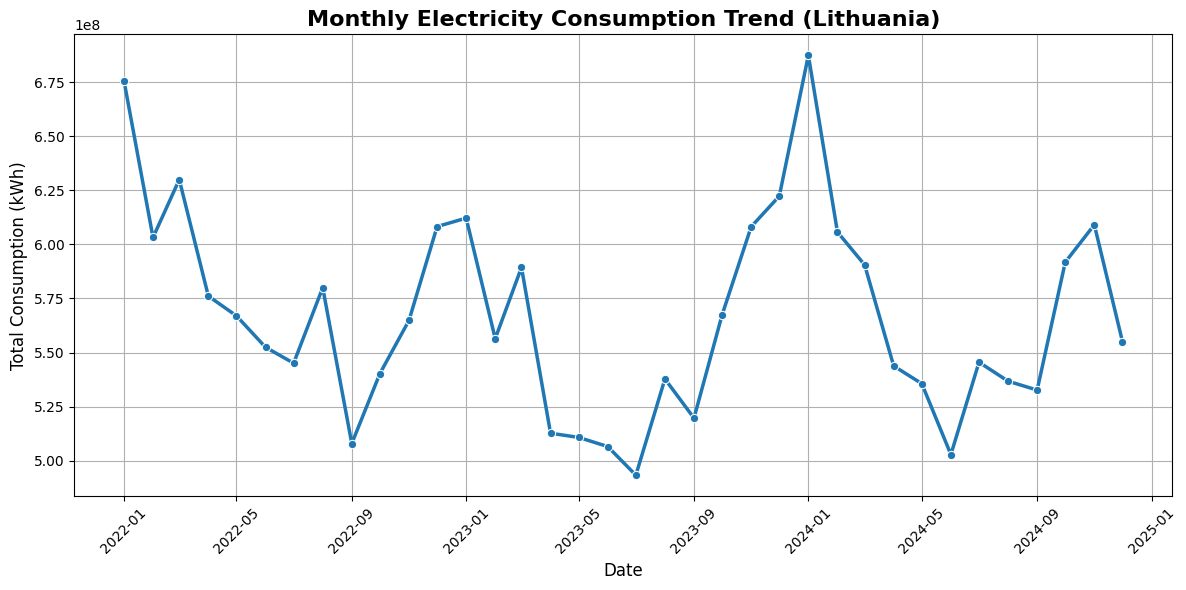

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Assuming merged_df is already loaded
monthly_trend = merged.groupby(['year', 'month'])['total_consumption_kwh'].sum().reset_index()
monthly_trend['date'] = pd.to_datetime(monthly_trend[['year', 'month']].assign(day=1))

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='date', y='total_consumption_kwh', marker='o', linewidth=2.5)
plt.title('Monthly Electricity Consumption Trend (Lithuania)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Consumption (kWh)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## **Average Temperature vs Electricity Consumption**

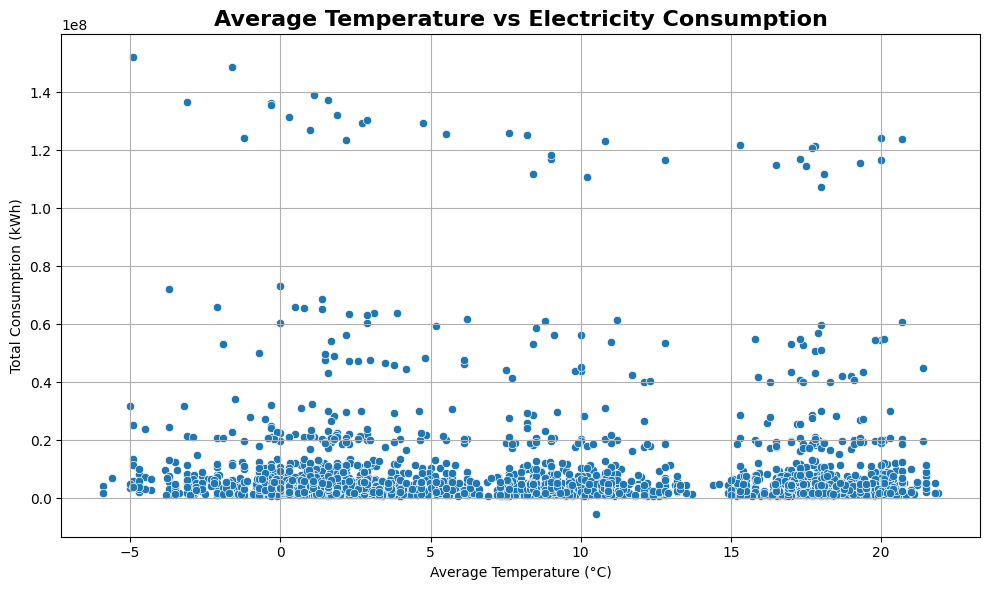

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged, x='tavg', y='total_consumption_kwh')
plt.title('Average Temperature vs Electricity Consumption',fontsize=16, fontweight='bold')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Total Consumption (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()


# **Total Electricity consumption by Municipality**

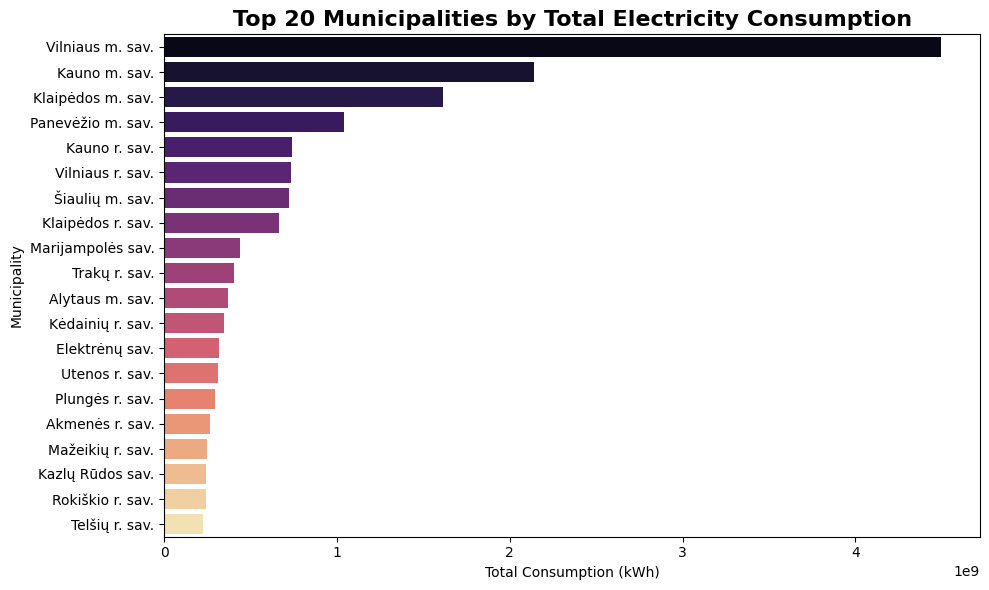

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 20 municipalities only
top20 = merged_df.groupby("object_municipality")["total_consumption_kwh"].sum().nlargest(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top20.values, y=top20.index, palette="magma")
plt.title("Top 20 Municipalities by Total Electricity Consumption",fontsize=16, fontweight='bold')
plt.xlabel("Total Consumption (kWh)")
plt.ylabel("Municipality")
plt.tight_layout()
plt.show()

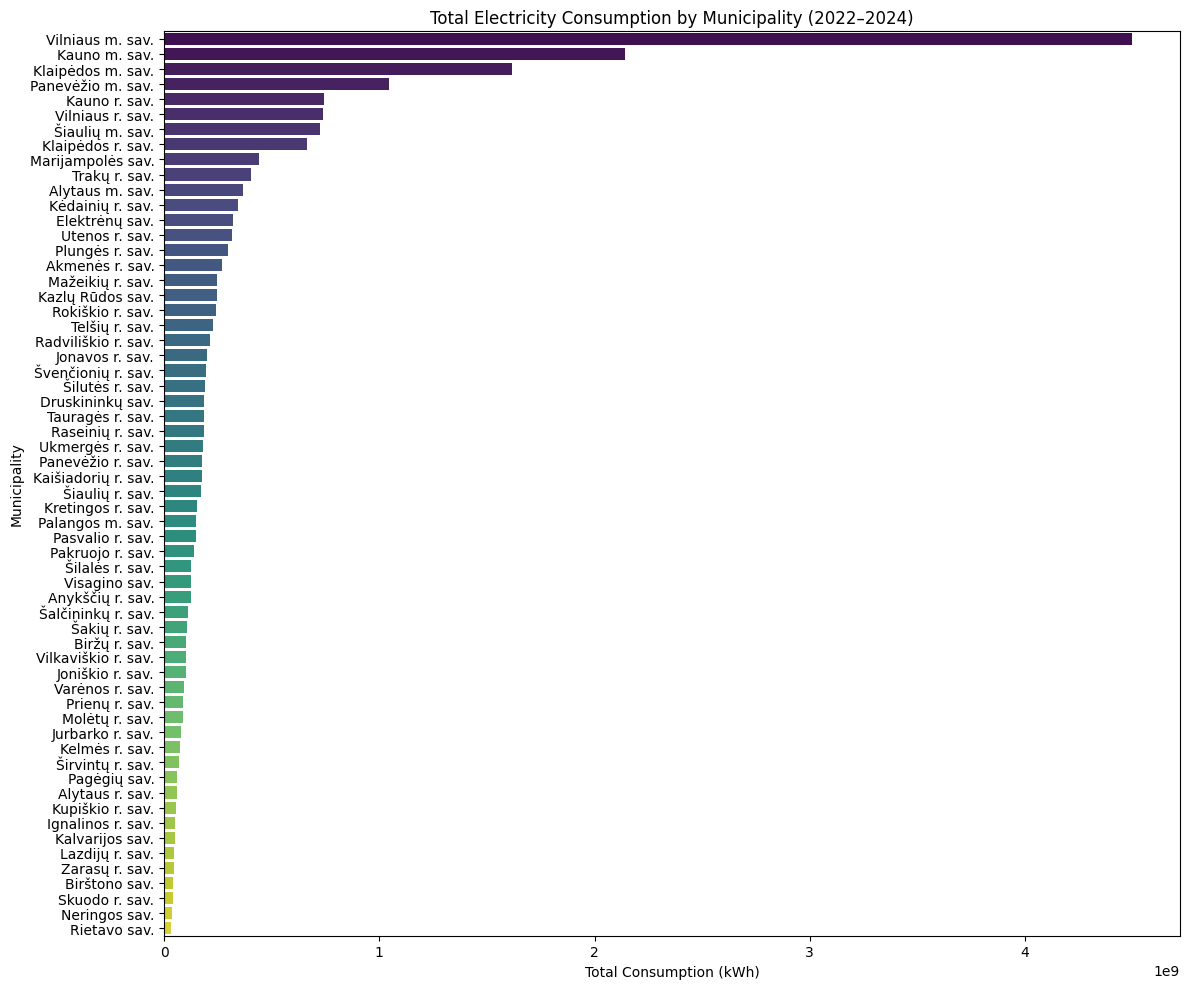

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate total consumption per municipality
municipality_totals = merged_df.groupby("object_municipality")["total_consumption_kwh"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 10))
sns.barplot(x=municipality_totals.values, y=municipality_totals.index, palette="viridis")
plt.title("Total Electricity Consumption by Municipality (2022–2024)")
plt.xlabel("Total Consumption (kWh)")
plt.ylabel("Municipality")
plt.tight_layout()
plt.show()


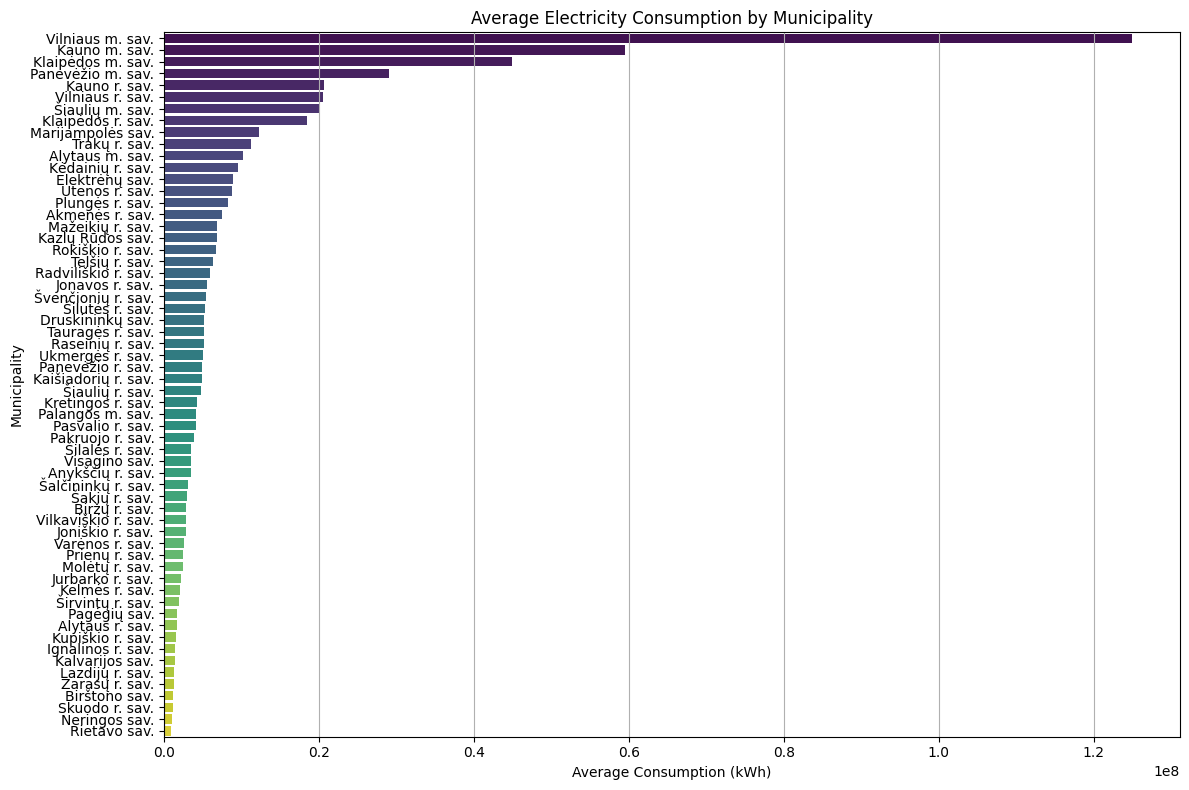

In [74]:
# Calculate average consumption per municipality
avg_consumption = merged_df.groupby('object_municipality')['total_consumption_kwh'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_consumption.values, y=avg_consumption.index, palette='viridis')

plt.title('Average Electricity Consumption by Municipality')
plt.xlabel('Average Consumption (kWh)')
plt.ylabel('Municipality')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


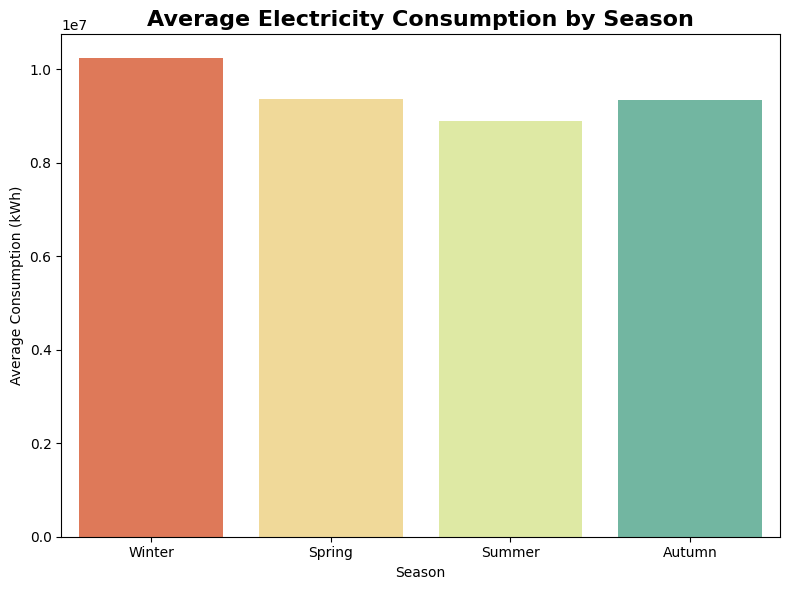

In [75]:
# Define seasons for Lithuania
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Add a 'season' column
merged['season'] = merged['month'].apply(get_season)

# Group by season and calculate average consumption
seasonal_avg = merged.groupby('season')['total_consumption_kwh'].mean().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=seasonal_avg.index, y=seasonal_avg.values, palette='Spectral')

plt.title('Average Electricity Consumption by Season',fontsize=16, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('Average Consumption (kWh)')
plt.tight_layout()
plt.show()


In [76]:
merged.head()

object_municipality  year  month  total_consumption_kwh  allowed_power_kw  \
0     Akmenės r. sav.  2022      1             7776567.00         41.396514   
1     Akmenės r. sav.  2022      2             6902665.00         48.878671   
2     Akmenės r. sav.  2022      3             7279188.08         49.204669   
3     Akmenės r. sav.  2022      4             6976821.00         48.792730   
4     Akmenės r. sav.  2022      5             6738225.00         49.799368   

   remote_metering  automated_metering_flag   latitude  longitude  \
0         0.000726                 0.172113  56.246052  22.754597   
1         0.000773                 0.183153  56.246052  22.754597   
2         0.000778                 0.181323  56.246052  22.754597   
3         0.001547                 0.184068  56.246052  22.754597   
4         0.001580                 0.187204  56.246052  22.754597   

       weather_query       tavg  tmin  tmax  prcp       wspd  season  
0  Akmenė, Lithuania  -0.309375 -14.7   5.8  67.7  23.834375  Winter  
1  Akmenė, Lithuania   0.889655  -6.4   6.7  96.2  24.144828  Winter  
2  Akmenė, Lithuania   1.003125  -7.5  13.3   3.5  16.093750  Spring  
3  Akmenė, Lithuania   5.012903  -5.7  16.4  55.0  21.129032  Spring  
4  Akmenė, Lithuania  10.484375  -1.9  21.1  92.8  20.603125  Spring

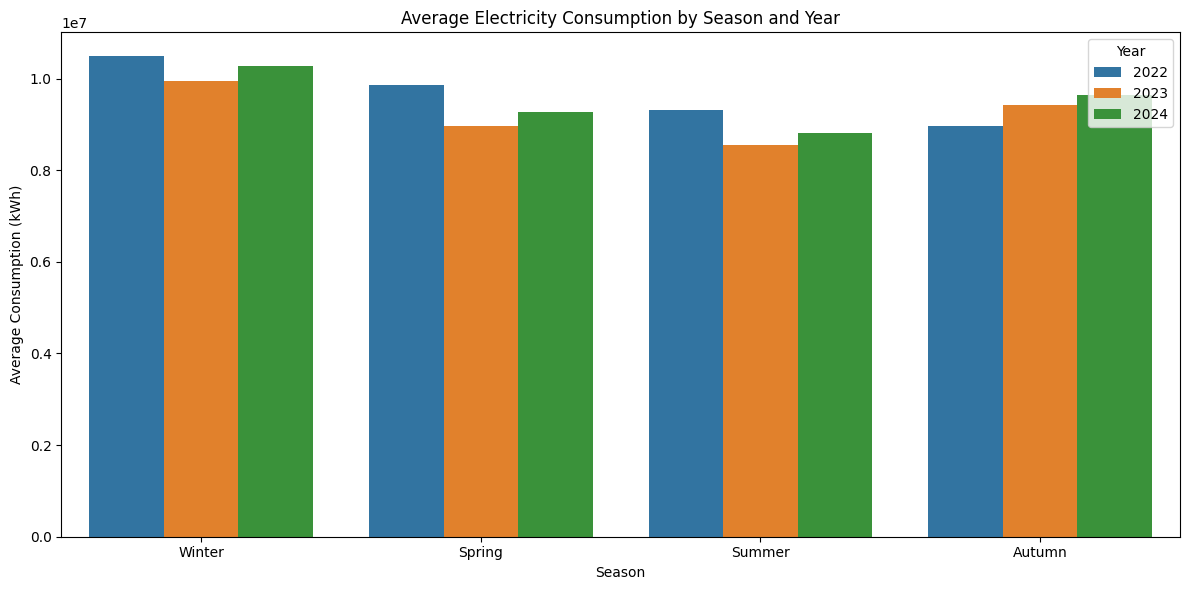

In [77]:
# Group by year and season
seasonal_trend = (
    merged.groupby(['year', 'season'])['total_consumption_kwh']
    .mean()
    .reset_index()
)

# Sort season order for consistent x-axis
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
seasonal_trend['season'] = pd.Categorical(seasonal_trend['season'], categories=season_order, ordered=True)
seasonal_trend = seasonal_trend.sort_values(['year', 'season'])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=seasonal_trend,
    x='season',
    y='total_consumption_kwh',
    hue='year',
    palette='tab10'
)
plt.title('Average Electricity Consumption by Season and Year')
plt.xlabel('Season')

plt.ylabel('Average Consumption (kWh)')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

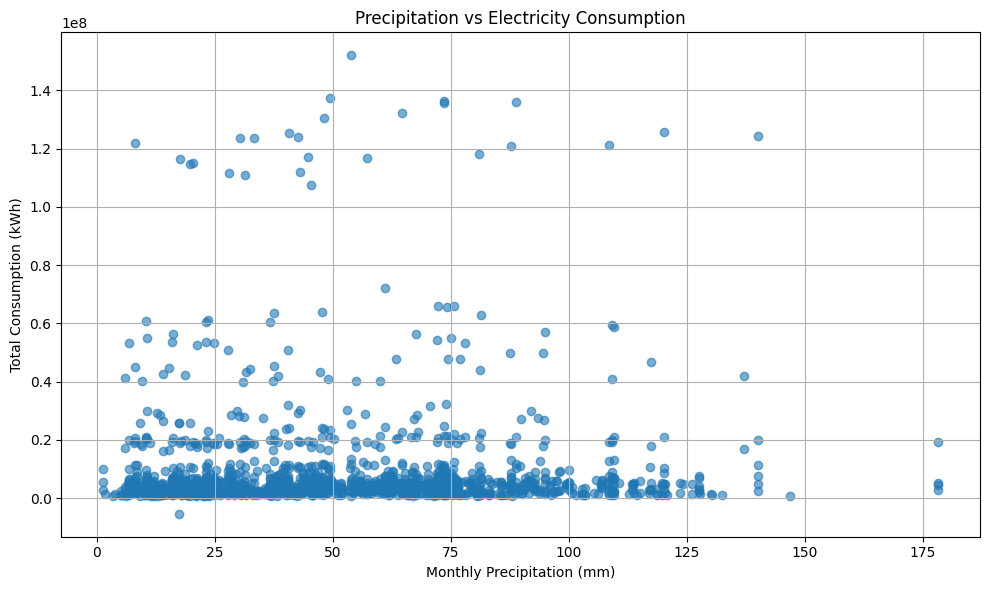

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['prcp'], merged_df['total_consumption_kwh'], alpha=0.6)
plt.title('Precipitation vs Electricity Consumption')
plt.xlabel('Monthly Precipitation (mm)')
plt.ylabel('Total Consumption (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()


There is no strong linear relationship between precipitation and electrictity usage 

Electricictiy varies regarless of preciptation which is rain levels alone dont significantly impact the power usage

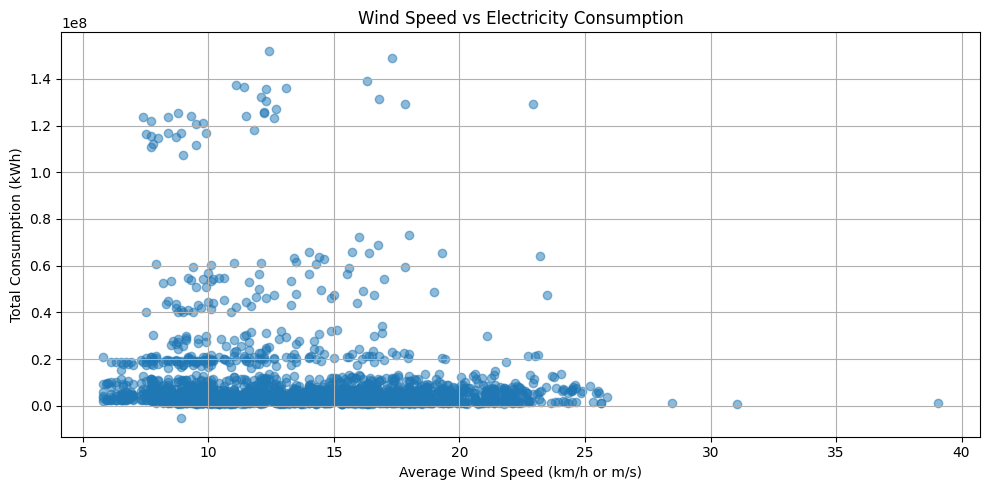

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(merged['wspd'], merged['total_consumption_kwh'], alpha=0.5)
plt.title('Wind Speed vs Electricity Consumption')
plt.xlabel('Average Wind Speed (km/h or m/s)')
plt.ylabel('Total Consumption (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()



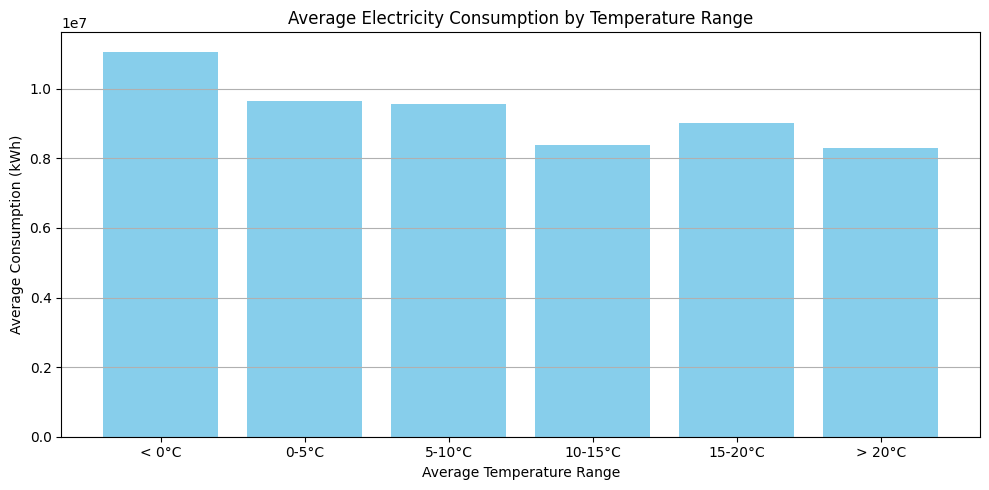

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Define temperature bins and labels
bins = [-float('inf'), 0, 5, 10, 15, 20, float('inf')]
labels = ['< 0°C', '0-5°C', '5-10°C', '10-15°C', '15-20°C', '> 20°C']
merged['temp_bin'] = pd.cut(merged['tavg'], bins=bins, labels=labels)

# Group by temperature bin
bin_grouped = merged.groupby('temp_bin')['total_consumption_kwh'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
plt.bar(bin_grouped['temp_bin'], bin_grouped['total_consumption_kwh'], color='skyblue')
plt.title('Average Electricity Consumption by Temperature Range')
plt.xlabel('Average Temperature Range')
plt.ylabel('Average Consumption (kWh)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# **Correlation**

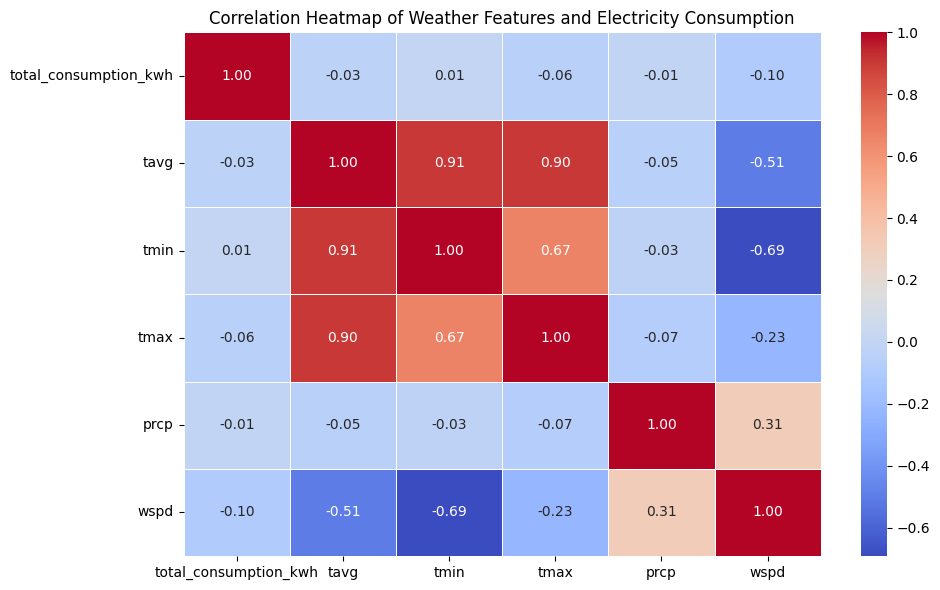

In [81]:
columns_for_corr = ['total_consumption_kwh', 'tavg', 'tmin', 'tmax', 'prcp', 'wspd']
corr_df = merged[columns_for_corr].copy()

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Weather Features and Electricity Consumption')
plt.tight_layout()
plt.show()

# **Wind speed vs Total consumption**

In [82]:
merged.head()

object_municipality  year  month  total_consumption_kwh  allowed_power_kw  \
0     Akmenės r. sav.  2022      1             7776567.00         41.396514   
1     Akmenės r. sav.  2022      2             6902665.00         48.878671   
2     Akmenės r. sav.  2022      3             7279188.08         49.204669   
3     Akmenės r. sav.  2022      4             6976821.00         48.792730   
4     Akmenės r. sav.  2022      5             6738225.00         49.799368   

   remote_metering  automated_metering_flag   latitude  longitude  \
0         0.000726                 0.172113  56.246052  22.754597   
1         0.000773                 0.183153  56.246052  22.754597   
2         0.000778                 0.181323  56.246052  22.754597   
3         0.001547                 0.184068  56.246052  22.754597   
4         0.001580                 0.187204  56.246052  22.754597   

       weather_query       tavg  tmin  tmax  prcp       wspd  season temp_bin  
0  Akmenė, Lithuania  -0.309375 -14.7   5.8  67.7  23.834375  Winter    < 0°C  
1  Akmenė, Lithuania   0.889655  -6.4   6.7  96.2  24.144828  Winter    0-5°C  
2  Akmenė, Lithuania   1.003125  -7.5  13.3   3.5  16.093750  Spring    0-5°C  
3  Akmenė, Lithuania   5.012903  -5.7  16.4  55.0  21.129032  Spring   5-10°C  
4  Akmenė, Lithuania  10.484375  -1.9  21.1  92.8  20.603125  Spring  10-15°C

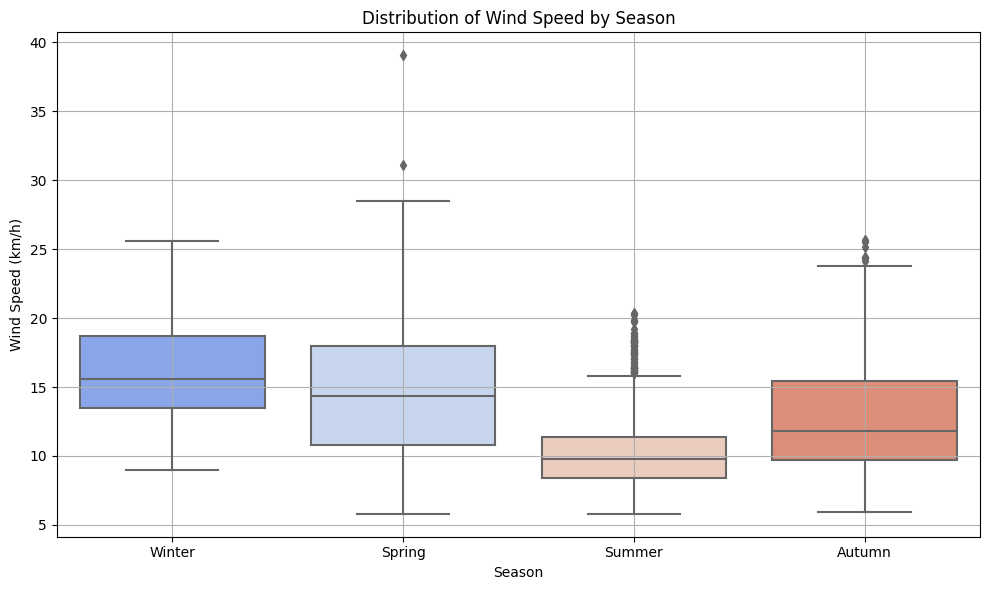

In [83]:


# Plot boxplot of wind speed vs total consumption by season
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged['season'], y=merged['wspd'], data=merged, palette='coolwarm')

plt.title('Distribution of Wind Speed by Season')
plt.xlabel('Season')
plt.ylabel('Wind Speed (km/h)')
plt.grid(True)
plt.tight_layout()
plt.show()



In [84]:
merged.head(3)

object_municipality  year  month  total_consumption_kwh  allowed_power_kw  \
0     Akmenės r. sav.  2022      1             7776567.00         41.396514   
1     Akmenės r. sav.  2022      2             6902665.00         48.878671   
2     Akmenės r. sav.  2022      3             7279188.08         49.204669   

   remote_metering  automated_metering_flag   latitude  longitude  \
0         0.000726                 0.172113  56.246052  22.754597   
1         0.000773                 0.183153  56.246052  22.754597   
2         0.000778                 0.181323  56.246052  22.754597   

       weather_query      tavg  tmin  tmax  prcp       wspd  season temp_bin  
0  Akmenė, Lithuania -0.309375 -14.7   5.8  67.7  23.834375  Winter    < 0°C  
1  Akmenė, Lithuania  0.889655  -6.4   6.7  96.2  24.144828  Winter    0-5°C  
2  Akmenė, Lithuania  1.003125  -7.5  13.3   3.5  16.093750  Spring    0-5°C

In [85]:
# One-hot encode season and temp_bin
merged_encoded = pd.get_dummies(merged, columns=['season', 'temp_bin'], drop_first=True)

# Preview the updated dataframe
merged_encoded.head()


object_municipality  year  month  total_consumption_kwh  allowed_power_kw  \
0     Akmenės r. sav.  2022      1             7776567.00         41.396514   
1     Akmenės r. sav.  2022      2             6902665.00         48.878671   
2     Akmenės r. sav.  2022      3             7279188.08         49.204669   
3     Akmenės r. sav.  2022      4             6976821.00         48.792730   
4     Akmenės r. sav.  2022      5             6738225.00         49.799368   

   remote_metering  automated_metering_flag   latitude  longitude  \
0         0.000726                 0.172113  56.246052  22.754597   
1         0.000773                 0.183153  56.246052  22.754597   
2         0.000778                 0.181323  56.246052  22.754597   
3         0.001547                 0.184068  56.246052  22.754597   
4         0.001580                 0.187204  56.246052  22.754597   

       weather_query       tavg  tmin  tmax  prcp       wspd  season_Spring  \
0  Akmenė, Lithuania  -0.309375 -14.7   5.8  67.7  23.834375          False   
1  Akmenė, Lithuania   0.889655  -6.4   6.7  96.2  24.144828          False   
2  Akmenė, Lithuania   1.003125  -7.5  13.3   3.5  16.093750           True   
3  Akmenė, Lithuania   5.012903  -5.7  16.4  55.0  21.129032           True   
4  Akmenė, Lithuania  10.484375  -1.9  21.1  92.8  20.603125           True   

   season_Summer  season_Winter  temp_bin_0-5°C  temp_bin_5-10°C  \
0          False           True           False            False   
1          False           True            True            False   
2          False          False            True            False   
3          False          False           False             True   
4          False          False           False            False   

   temp_bin_10-15°C  temp_bin_15-20°C  temp_bin_> 20°C  
0             False             False            False  
1             False             False            False  
2             False             False            False  
3             False             False            False  
4              True             False            False

In [86]:
columns_to_drop = ['weather_query', 'latitude', 'longitude']
merged_encoded.drop(columns=columns_to_drop, inplace=True)

In [87]:
merged_encoded.head()

object_municipality  year  month  total_consumption_kwh  allowed_power_kw  \
0     Akmenės r. sav.  2022      1             7776567.00         41.396514   
1     Akmenės r. sav.  2022      2             6902665.00         48.878671   
2     Akmenės r. sav.  2022      3             7279188.08         49.204669   
3     Akmenės r. sav.  2022      4             6976821.00         48.792730   
4     Akmenės r. sav.  2022      5             6738225.00         49.799368   

   remote_metering  automated_metering_flag       tavg  tmin  tmax  prcp  \
0         0.000726                 0.172113  -0.309375 -14.7   5.8  67.7   
1         0.000773                 0.183153   0.889655  -6.4   6.7  96.2   
2         0.000778                 0.181323   1.003125  -7.5  13.3   3.5   
3         0.001547                 0.184068   5.012903  -5.7  16.4  55.0   
4         0.001580                 0.187204  10.484375  -1.9  21.1  92.8   

        wspd  season_Spring  season_Summer  season_Winter  temp_bin_0-5°C  \
0  23.834375          False          False           True           False   
1  24.144828          False          False           True            True   
2  16.093750           True          False          False            True   
3  21.129032           True          False          False           False   
4  20.603125           True          False          False           False   

   temp_bin_5-10°C  temp_bin_10-15°C  temp_bin_15-20°C  temp_bin_> 20°C  
0            False             False             False            False  
1            False             False             False            False  
2            False             False             False            False  
3             True             False             False            False  
4            False              True             False            False

In [88]:
# 1. Drop non-numeric or irrelevant columns
columns_to_drop = ['object_municipality', 'weather_query', 'season', 'temp_bin', 'latitude', 'longitude']
X = merged.drop(columns=columns_to_drop + ['total_consumption_kwh'])  # Features
y = merged['total_consumption_kwh']  # Target

# 2. If any column is still object-type, encode them
X = pd.get_dummies(X, drop_first=True)

# 3. Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Predict and evaluate
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R²:", r2_score(y_test, y_pred))


MAE: 8250582.141673886
RMSE: 17421666.332224365
R²: 0.1745167514346856


In [89]:
X_train

year  month  allowed_power_kw  remote_metering  automated_metering_flag  \
1776  2023      1         38.751768         0.001263                 0.427020   
381   2023     10         32.964095         0.009167                 0.623377   
1242  2023      7         36.524677         0.007638                 0.435958   
1805  2022      6         40.628726         0.001355                 0.178862   
1865  2024      6         19.968938         0.018036                 0.782565   
...    ...    ...               ...              ...                      ...   
1638  2023      7         39.327294         0.008767                 0.672122   
1095  2023      4         21.976993         0.006934                 0.596911   
1130  2023      3         49.615142         0.006596                 0.439633   
1294  2024     11         28.541700         0.017474                 0.930898   
860   2024      9         21.654684         0.027233                 0.924837   

           tavg  tmin  tmax   prcp       wspd  
1776  -0.300000  -1.7   1.4   88.8  13.100000  
381    7.700000   4.9  10.5   76.3  10.800000  
1242  16.650000   9.4  30.0  129.0  20.206250  
1805  17.600000  12.5  22.4  103.4   9.100000  
1865  18.000000  12.4  23.3   83.0   9.000000  
...         ...   ...   ...    ...        ...  
1638  18.100000  12.1  23.7   46.2   9.400000  
1095   7.800000   3.4  12.2    5.9  11.900000  
1130   2.696875  -7.9  14.4   65.3  21.103125  
1294   3.900000   1.8   5.5   47.8  14.400000  
860   17.174194   5.1  27.8   32.6  18.467742  

[1728 rows x 10 columns]

In [90]:
X_test

year  month  allowed_power_kw  remote_metering  automated_metering_flag  \
2079  2024      4         29.509350         0.064469                 0.876969   
668   2023      9         47.871601         0.112412                 0.586480   
2073  2023     10         29.967016         0.057971                 0.834083   
1113  2024     10         21.385028         0.116667                 0.857062   
788   2024      9         25.033272         0.030499                 0.719963   
...    ...    ...               ...              ...                      ...   
438   2022      7         37.964235         0.000715                 0.261803   
900   2022      1         30.114664         0.000000                 0.275468   
1613  2024      6         31.822319         0.130553                 0.880282   
20    2023      9         74.556196         0.001441                 0.687320   
785   2024      6         25.916988         0.030888                 0.669884   

           tavg  tmin  tmax   prcp       wspd  
2079   8.400000   4.5  12.6   44.0  14.000000  
668   17.300000  13.9  20.9   49.0   8.900000  
2073   9.000000   6.2  11.6  100.1  18.000000  
1113   9.600000   6.6  12.9   19.3  12.200000  
788   16.358065   2.5  27.2   71.9  14.700000  
...         ...   ...   ...    ...        ...  
438   17.900000  13.3  22.6   95.0  10.000000  
900   -0.700000  -2.8   0.9   73.4  16.500000  
1613  18.200000  11.8  23.9   55.8   7.800000  
20    15.948387   7.2  26.2   22.6  16.180645  
785   18.700000  12.4  24.7   26.6   8.700000  

[432 rows x 10 columns]

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=300,oob_score = True,max_features=0.9, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Results:")
print(f"MAE: {mae_rf}")
print(f"RMSE: {rmse_rf}")
print(f"R²: {r2_rf}")


Random Forest Results:
MAE: 3489847.155906095
RMSE: 10455472.737041773
R²: 0.702685404924192


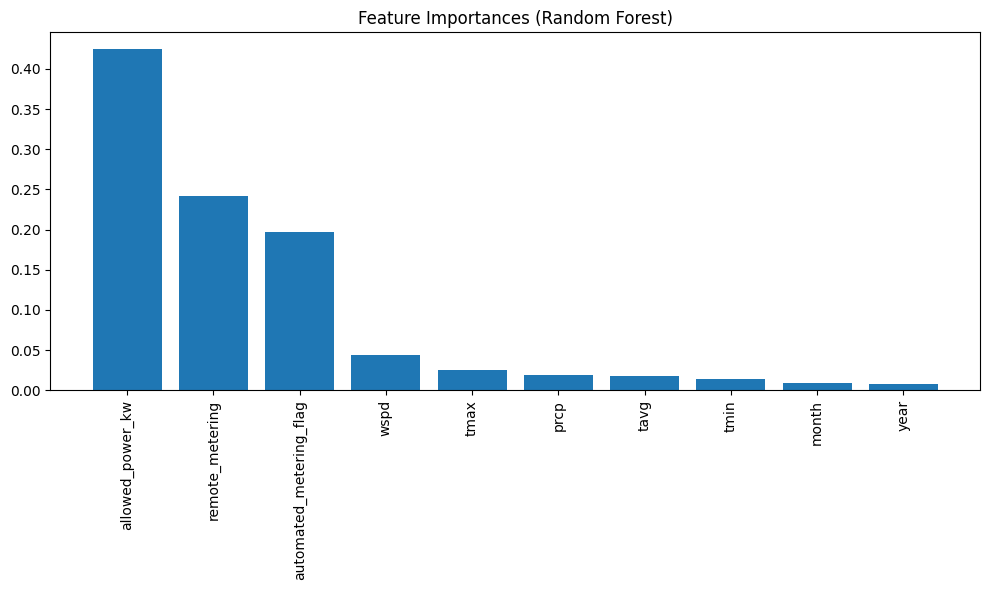

In [93]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feature_names = X_train.columns
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_idx])
plt.xticks(range(len(importances)), feature_names[sorted_idx], rotation=90)
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500,700,900],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt','log2',1.0]
}

# Initialize base model
rf = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=30,  # adjust if needed
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

# Fit on training data
random_search.fit(X_train, y_train)

# Best model
best_rf = random_search.best_estimator_

# Predict
y_pred = best_rf.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {random_search.best_params_}")
print(f" Tuned Random Forest Results:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 1.0, 'max_depth': None}
 Tuned Random Forest Results:
MAE: 3504298.06
RMSE: 10714222.96
R²: 0.6878


In [95]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300, 500, 700],
#     'max_depth': [None, 10, 20, 30, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt','log2',1.0]
# }

# # Initialize base model
# rf = RandomForestRegressor(random_state=42)

# # Set up GridSearchCV
# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=5,
#     verbose=2,
#     n_jobs=-1,
#     scoring='neg_mean_squared_error'
# )

# # Fit on training data
# grid_search.fit(X_train, y_train)

# # Best model
# best_rf = grid_search.best_estimator_

# # Predict
# y_pred = best_rf.predict(X_test)

# # Evaluation
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)

# print(f"Best Parameters: {grid_search.best_params_}")
# print(f" Tuned Random Forest Results:")
# print(f"MAE: {mae:.2f}")
# print(f"RMSE: {rmse:.2f}")
# print(f"R²: {r2:.4f}")

In [96]:
X_test

year  month  allowed_power_kw  remote_metering  automated_metering_flag  \
2079  2024      4         29.509350         0.064469                 0.876969   
668   2023      9         47.871601         0.112412                 0.586480   
2073  2023     10         29.967016         0.057971                 0.834083   
1113  2024     10         21.385028         0.116667                 0.857062   
788   2024      9         25.033272         0.030499                 0.719963   
...    ...    ...               ...              ...                      ...   
438   2022      7         37.964235         0.000715                 0.261803   
900   2022      1         30.114664         0.000000                 0.275468   
1613  2024      6         31.822319         0.130553                 0.880282   
20    2023      9         74.556196         0.001441                 0.687320   
785   2024      6         25.916988         0.030888                 0.669884   

           tavg  tmin  tmax   prcp       wspd  
2079   8.400000   4.5  12.6   44.0  14.000000  
668   17.300000  13.9  20.9   49.0   8.900000  
2073   9.000000   6.2  11.6  100.1  18.000000  
1113   9.600000   6.6  12.9   19.3  12.200000  
788   16.358065   2.5  27.2   71.9  14.700000  
...         ...   ...   ...    ...        ...  
438   17.900000  13.3  22.6   95.0  10.000000  
900   -0.700000  -2.8   0.9   73.4  16.500000  
1613  18.200000  11.8  23.9   55.8   7.800000  
20    15.948387   7.2  26.2   22.6  16.180645  
785   18.700000  12.4  24.7   26.6   8.700000  

[432 rows x 10 columns]

In [97]:
# 1. Copy over year/month and true/pred columns
results = X_test[['year','month']].copy()
results['y_true']   = y_test.values
results['y_pred']   = y_pred
results['residual'] = results['y_true'] - results['y_pred']
results['abs_err']  = results['residual'].abs()

# 2. Create a proper monthly datetime (first day of month)
results['period'] = pd.to_datetime(dict(year=results['year'], month=results['month'], day=1))


In [98]:
results

year  month      y_true        y_pred      residual       abs_err  \
2079  2024      4   5104791.0  3.990060e+06  1.114731e+06  1.114731e+06   
668   2023      9  40861294.0  4.429264e+07 -3.431344e+06  3.431344e+06   
2073  2023     10   5480308.0  4.732996e+06  7.473115e+05  7.473115e+05   
1113  2024     10   3758442.8  3.007774e+06  7.506686e+05  7.506686e+05   
788   2024      9   1325939.0  1.398871e+06 -7.293182e+04  7.293182e+04   
...    ...    ...         ...           ...           ...           ...   
438   2022      7   4697548.0  5.927628e+06 -1.230080e+06  1.230080e+06   
900   2022      1   8247721.0  5.583239e+06  2.664482e+06  2.664482e+06   
1613  2024      6   3885700.0  3.614196e+06  2.715042e+05  2.715042e+05   
20    2023      9   6676864.0  8.395154e+06 -1.718290e+06  1.718290e+06   
785   2024      6   1236525.0  1.533278e+06 -2.967529e+05  2.967529e+05   

         period  
2079 2024-04-01  
668  2023-09-01  
2073 2023-10-01  
1113 2024-10-01  
788  2024-09-01  
...         ...  
438  2022-07-01  
900  2022-01-01  
1613 2024-06-01  
20   2023-09-01  
785  2024-06-01  

[432 rows x 7 columns]

                 MAE          RMSE
period                            
1       5.940847e+06  1.925610e+07
2       4.792070e+06  1.511681e+07
3       4.185241e+06  8.176183e+06
4       2.769843e+06  7.420873e+06
5       2.714043e+06  5.009040e+06
6       1.710481e+06  3.545122e+06
7       1.720391e+06  2.529633e+06
8       3.319257e+06  7.313072e+06
9       1.997591e+06  4.186311e+06
10      4.032238e+06  9.257996e+06
11      3.347382e+06  8.501718e+06
12      6.351686e+06  2.130778e+07


<Axes: title={'center': 'Mean MAE & RMSE by Calendar Month (across all years)'}, xlabel='period', ylabel='Error (kWh)'>

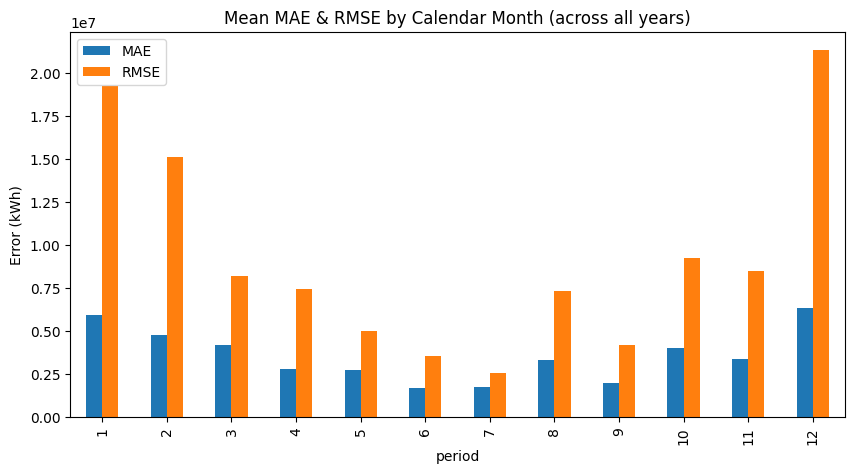

In [99]:
monthly_summary = (
    results
    .groupby(results['period'].dt.month)
    .agg(
        MAE = ('abs_err', 'mean'),
        RMSE= ('residual', lambda x: np.sqrt((x**2).mean()))
    )
    .reindex(range(1,13))   # ensure 1–12 in order
)

print(monthly_summary)
monthly_summary.plot(
    kind='bar', 
    figsize=(10,5), 
    title='Mean MAE & RMSE by Calendar Month (across all years)',
    ylabel='Error (kWh)'
)


period
2022-01-01    3.606476e+06
2022-02-01    2.945949e+06
2022-03-01    5.448094e+06
2022-04-01    2.324747e+06
2022-05-01    3.147995e+06
2022-06-01    3.554742e+06
2022-07-01    1.503941e+06
2022-08-01    4.269118e+06
2022-09-01    4.407376e+06
2022-10-01    4.366832e+06
2022-11-01    4.767259e+06
2022-12-01    1.093750e+07
Freq: MS, Name: abs_err, dtype: float64


<Axes: title={'center': 'Monthly MAE over Time'}, xlabel='Period', ylabel='MAE (kWh)'>

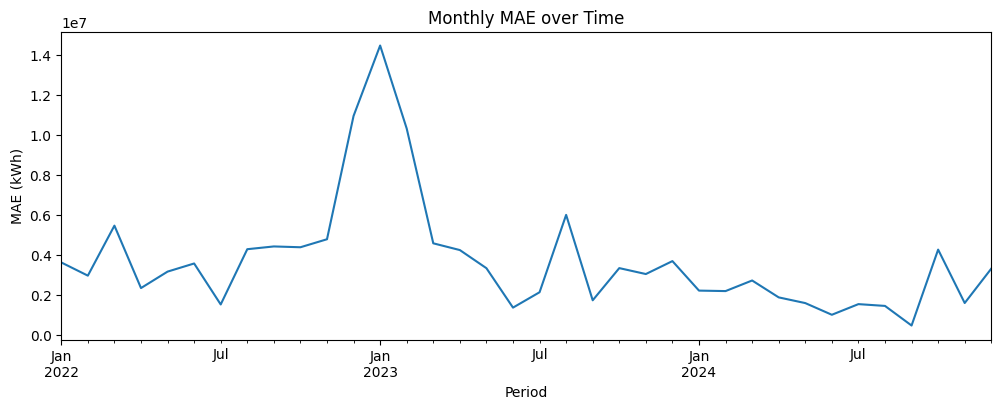

In [100]:
# Compute monthly MAE
time_series_mae = (
    results
    .set_index('period')
    ['abs_err']
    .resample('MS')           # Month start
    .mean()
)

print(time_series_mae.head(12))  # first 12 months as a sanity check
time_series_mae.plot(
    figsize=(12,4),
    title='Monthly MAE over Time',
    xlabel='Period',
    ylabel='MAE (kWh)'
)


In [101]:
import pandas as pd

# 1. Build a proper period index
period = pd.to_datetime(dict(year=X_test.year, month=X_test.month, day=1))

# 2. Create two Series
actual = pd.Series(y_test.values, index=period, name='Actual')
pred   = pd.Series(y_pred,       index=period, name='Predicted')

# 3. Group by month and take the mean (you can also sum if you want totals)
monthly_actual = actual.groupby(actual.index).mean()
monthly_pred   = pred.groupby(pred.index).mean()


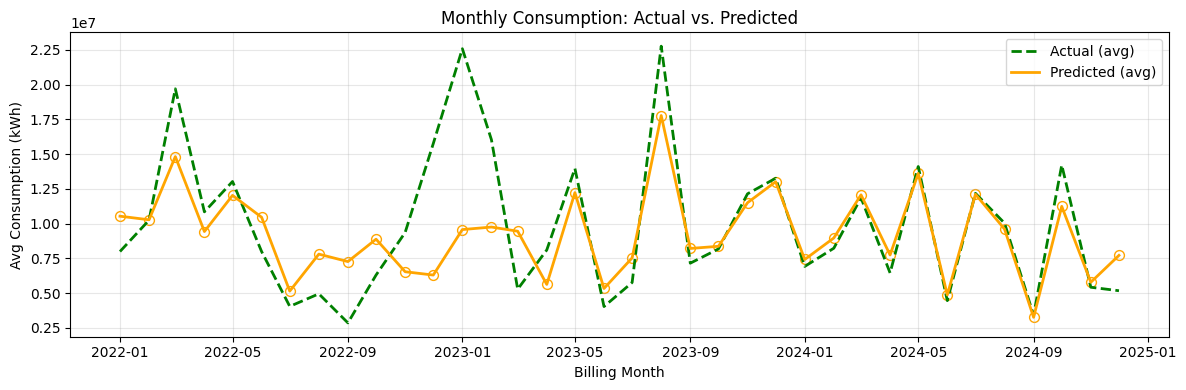

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.plot(
    monthly_actual.index, monthly_actual.values,
    linestyle='--', linewidth=2, label='Actual (avg)', color='green'
)
plt.plot(
    monthly_pred.index, monthly_pred.values,
    linestyle='-',  linewidth=2, label='Predicted (avg)', color='orange'
)

plt.scatter(
    monthly_pred.index, monthly_pred.values,
    s=50, marker='o',
    facecolors='white', edgecolors='orange'
)

plt.title('Monthly Consumption: Actual vs. Predicted')
plt.xlabel('Billing Month')
plt.ylabel('Avg Consumption (kWh)')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


Top 10 Districts by Mean Absolute Error:
 district
Vilniaus m. sav.      1.060285e+08
Šiaulių m. sav.       1.763897e+07
Vilniaus r. sav.      1.342343e+07
Švenčionių r. sav.    6.161254e+06
Visagino sav.         5.217107e+06
Šiaulių r. sav.       3.495312e+06
Širvintų r. sav.      2.682018e+06
Šilutės r. sav.       1.203964e+06
Šakių r. sav.         1.143691e+06
Šilalės r. sav.       9.767938e+05
Name: abs_err, dtype: float64


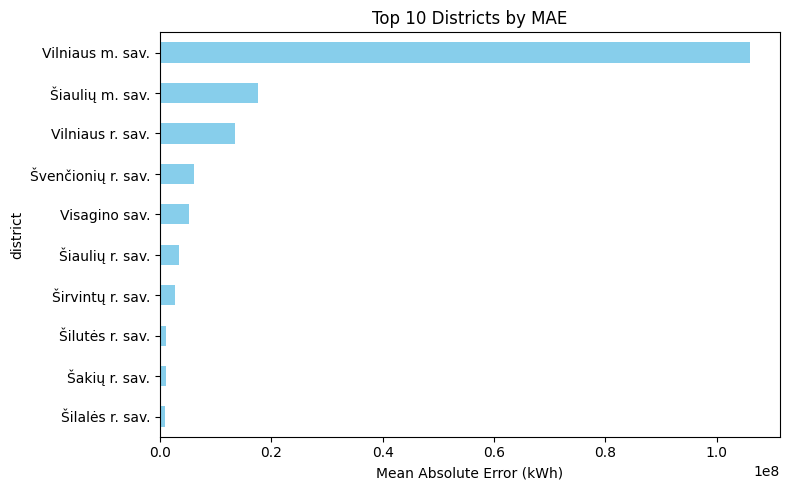

In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 1. Prepare X and y
df = merged_encoded.copy()
y = df['total_consumption_kwh']
X = df.drop(columns=['total_consumption_kwh'])

# 2. Train/test split (no shuffle to preserve time ordering)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False, random_state=42
)

# 3. Extract municipality series for later
test_districts = X_test['object_municipality'].reset_index(drop=True)

# 4. Drop municipality when training/predicting
X_train_model = X_train.drop(columns=['object_municipality'])
X_test_model  = X_test.drop(columns=['object_municipality'])

# 5. Retrain your best Random Forest
best_rf.fit(X_train_model, y_train)

# 6. Predict
y_pred = best_rf.predict(X_test_model)

# 7. Build results DataFrame
results = pd.DataFrame({
    'district': test_districts,
    'y_true':   y_test.values,
    'y_pred':   y_pred
})
results['abs_err'] = np.abs(results['y_true'] - results['y_pred'])

# 8. Compute mean MAE per district and select top 10 worst
district_mae = (
    results
    .groupby('district')['abs_err']
    .mean()
    .sort_values(ascending=False)
)
top10 = district_mae.head(10)
print("Top 10 Districts by Mean Absolute Error:\n", top10)

# 9. Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
top10.plot(
    kind='barh',
    title='Top 10 Districts by MAE',
    xlabel='Mean Absolute Error (kWh)',
    color='skyblue'
)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Top 10 districts by MAE:
 object_municipality
Vilniaus m. sav.      1.060285e+08
Šiaulių m. sav.       1.763897e+07
Vilniaus r. sav.      1.342343e+07
Švenčionių r. sav.    6.161254e+06
Visagino sav.         5.217107e+06
Šiaulių r. sav.       3.495312e+06
Širvintų r. sav.      2.682018e+06
Šilutės r. sav.       1.203964e+06
Šakių r. sav.         1.143691e+06
Šilalės r. sav.       9.767938e+05
Name: abs_err, dtype: float64


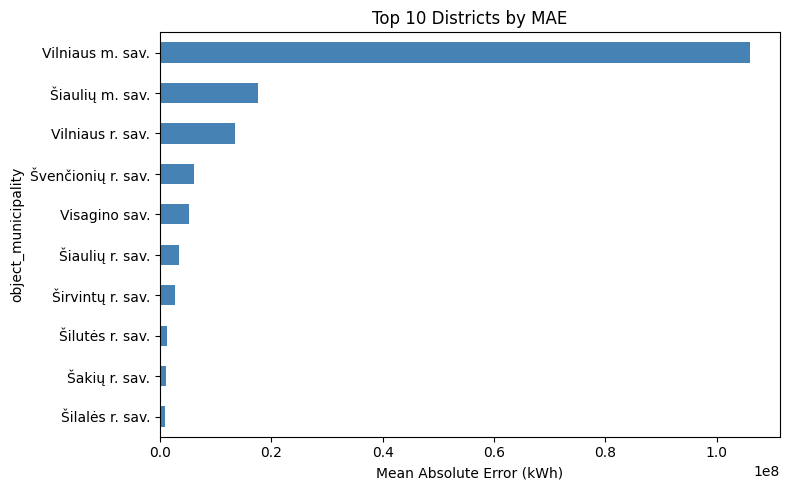

In [104]:
# 1. Build a small results df
results = X_test[['object_municipality']].copy()
results['y_true']  = y_test.values
results['y_pred']  = y_pred
results['abs_err'] = np.abs(results['y_true'] - results['y_pred'])

# 2. Compute avg MAE per district
district_mae = (
    results
    .groupby('object_municipality')['abs_err']
    .mean()
)

# 3. Pick top 10 and print
top10 = district_mae.sort_values(ascending=False).head(10)
print("Top 10 districts by MAE:\n", top10)

# 4. Plot in your usual style
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
top10.plot(kind='barh', color='steelblue')
plt.xlabel('Mean Absolute Error (kWh)')
plt.title('Top 10 Districts by MAE')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [105]:
import calendar, numpy as np

# Compute days_in_month, HDD on the merged DataFrame
merged['days_in_month'] = merged.apply(
    lambda r: calendar.monthrange(int(r.year), int(r.month))[1],
    axis=1
)
merged['HDD'] = merged['days_in_month'] * np.clip(18.0 - merged['tavg'], 0, None)

# (Omit CDD since it was all zeros)
merged.head()

object_municipality  year  month  total_consumption_kwh  allowed_power_kw  \
0     Akmenės r. sav.  2022      1             7776567.00         41.396514   
1     Akmenės r. sav.  2022      2             6902665.00         48.878671   
2     Akmenės r. sav.  2022      3             7279188.08         49.204669   
3     Akmenės r. sav.  2022      4             6976821.00         48.792730   
4     Akmenės r. sav.  2022      5             6738225.00         49.799368   

   remote_metering  automated_metering_flag   latitude  longitude  \
0         0.000726                 0.172113  56.246052  22.754597   
1         0.000773                 0.183153  56.246052  22.754597   
2         0.000778                 0.181323  56.246052  22.754597   
3         0.001547                 0.184068  56.246052  22.754597   
4         0.001580                 0.187204  56.246052  22.754597   

       weather_query       tavg  tmin  tmax  prcp       wspd  season temp_bin  \
0  Akmenė, Lithuania  -0.309375 -14.7   5.8  67.7  23.834375  Winter    < 0°C   
1  Akmenė, Lithuania   0.889655  -6.4   6.7  96.2  24.144828  Winter    0-5°C   
2  Akmenė, Lithuania   1.003125  -7.5  13.3   3.5  16.093750  Spring    0-5°C   
3  Akmenė, Lithuania   5.012903  -5.7  16.4  55.0  21.129032  Spring   5-10°C   
4  Akmenė, Lithuania  10.484375  -1.9  21.1  92.8  20.603125  Spring  10-15°C   

   days_in_month         HDD  
0             31  567.590625  
1             28  479.089655  
2             31  526.903125  
3             30  389.612903  
4             31  232.984375

In [106]:
# 1. Drop the same irrelevants, but keep days_in_month and HDD
columns_to_drop = [
    'object_municipality',
    'weather_query',
    'season',
    'temp_bin',
    'latitude',
    'longitude'
]
X = merged.drop(columns=columns_to_drop + ['total_consumption_kwh'])
y = merged['total_consumption_kwh']

# 2. One-hot encode any remaining categoricals
X = pd.get_dummies(X, drop_first=True)


In [107]:
import calendar
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 0) (Re)compute days_in_month and HDD if needed
merged['days_in_month'] = merged.apply(
    lambda r: calendar.monthrange(int(r.year), int(r.month))[1],
    axis=1
)
merged['HDD'] = merged['days_in_month'] * np.clip(18.0 - merged['tavg'], 0, None)

# 1) Build billing_month datetime
merged['billing_month'] = pd.to_datetime(
    dict(year=merged.year, month=merged.month, day=1)
)

# 2) True future split at May 1 2024
split_date = pd.Timestamp('2024-05-01')
train = merged[merged['billing_month'] <  split_date].copy()
test  = merged[merged['billing_month'] >= split_date].copy()

# 3) Targets
y_train = train['total_consumption_kwh']
y_test  = test ['total_consumption_kwh']

# 4) Drop irrelevants (keep season!)
drop_cols = [
    'weather_query','temp_bin','latitude','longitude',
    'total_consumption_kwh','billing_month'
]
X_train = train.drop(columns=drop_cols)
X_test  = test .drop(columns=drop_cols)

# 5) One-hot encode municipality, month, **and season**
to_encode = ['object_municipality','month','season']
X_train = pd.get_dummies(X_train, columns=to_encode, drop_first=True)
X_test  = pd.get_dummies(X_test,  columns=to_encode, drop_first=True)

# 6) Align test to train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 7) Re-fit your tuned RF
rf = RandomForestRegressor(
    n_estimators=best_rf.n_estimators,
    max_depth=best_rf.max_depth,
    min_samples_split=best_rf.min_samples_split,
    min_samples_leaf=best_rf.min_samples_leaf,
    max_features=best_rf.max_features,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# 8) Evaluate
y_pred = rf.predict(X_test)
print("Time-split RF performance:")
print(" MAE:  ", mean_absolute_error( y_test, y_pred))
print(" RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print(" R²:   ", r2_score(            y_test, y_pred))


Time-split RF performance:
 MAE:   647206.6778213538
 RMSE:  1319369.9775398402
 R²:    0.9943776793632556


In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [109]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define RF & hyperparameter space
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100,200,300,500],
    'max_depth': [None,10,20,30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['sqrt','log2',1.0]
}

tscv = TimeSeriesSplit(n_splits=5)
search = RandomizedSearchCV(
    rf, param_distributions=param_grid,
    n_iter=20, cv=tscv,
    scoring='neg_mean_absolute_error',
    random_state=42, n_jobs=-1, verbose=1
)
search.fit(X_train, y_train)
best_rf = search.best_estimator_

# Evaluate
y_pred_rf = best_rf.predict(X_test)
print("RF MAE: ", mean_absolute_error(y_test, y_pred_rf))
print("RF RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("RF R²:  ", r2_score(y_test, y_pred_rf))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
RF MAE:  3595194.364293927
RF RMSE: 10856719.495600656
RF R²:   0.6794276096660887


Top 10 features by importance:
                   feature  importance
0         allowed_power_kw    0.437831
1          remote_metering    0.244643
2  automated_metering_flag    0.206780
3                     wspd    0.035620
4                     tmax    0.020726
5                     prcp    0.013999
6                     tavg    0.009231
7                     tmin    0.008698
8                    month    0.008563
9                      HDD    0.007373


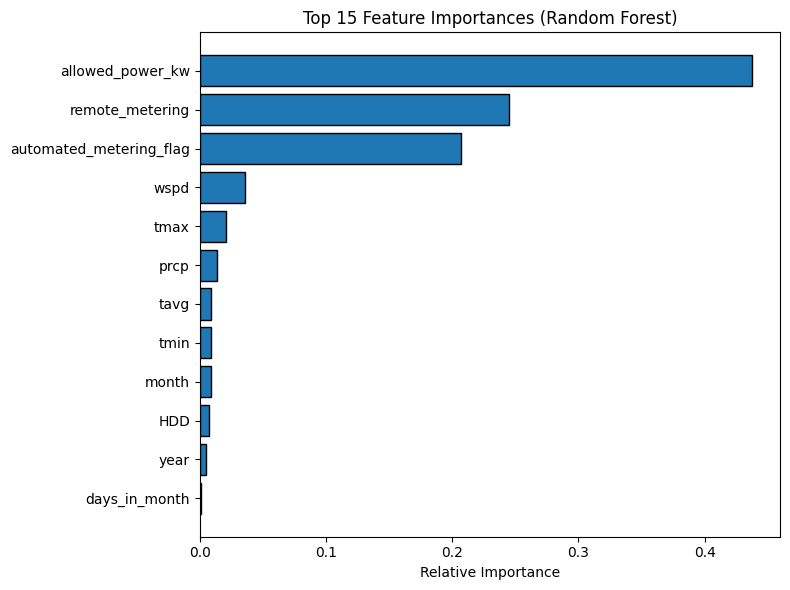

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Extract importances and feature names
importances = best_rf.feature_importances_
features    = X_train.columns

# 2. Build a DataFrame and sort
feat_imp = (
    pd.DataFrame({
        'feature': features,
        'importance': importances
    })
    .sort_values('importance', ascending=False)
    .reset_index(drop=True)
)

# 3. Display top 10 in a table
print("Top 10 features by importance:")
print(feat_imp.head(10))

# 4. Plot top 15 as a horizontal bar chart
top_n = 15
plt.figure(figsize=(8, 6))
plt.barh(
    feat_imp['feature'].head(top_n)[::-1],
    feat_imp['importance'].head(top_n)[::-1],
    edgecolor='k'
)
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()


In [111]:
print(X_train.columns.tolist())


['year', 'month', 'allowed_power_kw', 'remote_metering', 'automated_metering_flag', 'tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'days_in_month', 'HDD']


In [112]:
# # Combine features and residuals for train
# resid_df = X_train_resid.copy()
# resid_df['residual'] = y_train_resid

# # Compute correlations
# corrs = resid_df[['HDD','tavg','tmin','tmax','prcp','wspd','residual']].corr()['residual'].sort_values()
# print("Residual vs. feature correlations:\n", corrs)


In [113]:
# Drop only truly irrelevant cols
# columns_to_drop = ['object_municipality','weather_query','temp_bin','latitude','longitude']
# X = merged.drop(columns=columns_to_drop + ['total_consumption_kwh'])

#  One-hot encode season (and any other categoricals)
# X = pd.get_dummies(X, columns=['season'], drop_first=True)

# y = merged['total_consumption_kwh']


In [114]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# # Retrain your best_rf
# best_rf.fit(X_train, y_train)
# y_pred = best_rf.predict(X_test)

# from sklearn.metrics import r2_score
# print("New RF R²:", r2_score(y_test, y_pred))


In [115]:
# import calendar
# import numpy as np
# import pandas as pd
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# #compute any engineered features on merged, if you haven’t already:
# merged['days_in_month'] = merged.apply(
#     lambda r: calendar.monthrange(int(r.year), int(r.month))[1],
#     axis=1
# )
# merged['HDD'] = merged['days_in_month'] * np.clip(18.0 - merged['tavg'], 0, None)

# # Sort chronologically by year→month
# merged_sorted = (
#     merged
#     .sort_values(['year','month'])
#     .reset_index(drop=True)
# )

# # 80/20 time‐based split
# n_train = int(0.8 * len(merged_sorted))
# train    = merged_sorted.iloc[:n_train]
# test     = merged_sorted.iloc[n_train:]

# #  Build X_train, y_train, X_test, y_test
# y_train = train['total_consumption_kwh']
# y_test  = test ['total_consumption_kwh']

# # Drop truly irrelevant cols (keep months, season, municipality for encoding)
# drop_cols = ['weather_query','temp_bin','latitude','longitude','total_consumption_kwh']
# X_train = train.drop(columns=drop_cols)
# X_test  = test .drop(columns=drop_cols)

# # One-hot encode high-cardinality categorical fields
# to_encode = ['object_municipality','month']
# # if you created 'season', include it here too
# if 'season' in X_train:
#     to_encode.append('season')

# X_train = pd.get_dummies(X_train, columns=to_encode, drop_first=True)
# X_test  = pd.get_dummies(X_test,  columns=to_encode, drop_first=True)

# # Align test columns to train (fill any missing dummies with 0)
# X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# # Train Random Forest (using your best hyperparameters or default)
# #    If you have `best_rf` from before, you can re-fit it here:
# rf = RandomForestRegressor(
#     n_estimators=best_rf.n_estimators,
#     max_depth=best_rf.max_depth,
#     min_samples_split=best_rf.min_samples_split,
#     min_samples_leaf=best_rf.min_samples_leaf,
#     max_features=best_rf.max_features,
#     random_state=42,
#     n_jobs=-1
# )

# rf.fit(X_train, y_train)

# # Evaluate on the true “future” months in X_test
# y_pred = rf.predict(X_test)

# print("Time-split RF performance:")
# print(" MAE:  ", mean_absolute_error( y_test, y_pred))
# print(" RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
# print(" R²:   ", r2_score(            y_test, y_pred))


In [116]:
import calendar
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 0) (Re)compute days_in_month and HDD if needed
merged['days_in_month'] = merged.apply(
    lambda r: calendar.monthrange(int(r.year), int(r.month))[1],
    axis=1
)
merged['HDD'] = merged['days_in_month'] * np.clip(18.0 - merged['tavg'], 0, None)

# 1) Build billing_month datetime
merged['billing_month'] = pd.to_datetime(
    dict(year=merged.year, month=merged.month, day=1)
)

# 2) True future split at May 1 2024
split_date = pd.Timestamp('2024-05-01')
train = merged[merged['billing_month'] <  split_date].copy()
test  = merged[merged['billing_month'] >= split_date].copy()

# 3) Targets
y_train = train['total_consumption_kwh']
y_test  = test ['total_consumption_kwh']

# 4) Drop irrelevants (keep season!)
drop_cols = [
    'weather_query','temp_bin','latitude','longitude',
    'total_consumption_kwh','billing_month'
]
X_train = train.drop(columns=drop_cols)
X_test  = test .drop(columns=drop_cols)

# 5) One-hot encode municipality, month, **and season**
to_encode = ['object_municipality','month','season']
X_train = pd.get_dummies(X_train, columns=to_encode, drop_first=True)
X_test  = pd.get_dummies(X_test,  columns=to_encode, drop_first=True)

# 6) Align test to train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 7) Re-fit your tuned RF
rf = RandomForestRegressor(
    n_estimators=best_rf.n_estimators,
    max_depth=best_rf.max_depth,
    min_samples_split=best_rf.min_samples_split,
    min_samples_leaf=best_rf.min_samples_leaf,
    max_features=best_rf.max_features,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# 8) Evaluate
y_pred = rf.predict(X_test)
print("Time-split RF performance:")
print(" MAE:  ", mean_absolute_error( y_test, y_pred))
print(" RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print(" R²:   ", r2_score(            y_test, y_pred))


Time-split RF performance:
 MAE:   1214161.042134201
 RMSE:  1936075.2691160743
 R²:    0.9878932690950272


In [117]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# — assume `merged` is your full DataFrame, and you've already split train/test by date:

# 1) Compute the baseline: average consumption per municipality+month from TRAIN only
baseline = (
    train
    .groupby(['object_municipality','month'])['total_consumption_kwh']
    .mean()
    .rename('baseline_kwh')
    .reset_index()
)

# 2) Merge baseline back onto train & test
train = train.merge(baseline, on=['object_municipality','month'], how='left')
test  = test .merge(baseline, on=['object_municipality','month'], how='left')

# 3) Compute residuals
train['residual'] = train['total_consumption_kwh'] - train['baseline_kwh']
test ['residual'] = test ['total_consumption_kwh'] - test ['baseline_kwh']

# 4) Build X_resid & y_resid (only the part we want to explain with weather)
#    Drop columns that encode the baseline (municipality, month)
drop_cols = [
    'object_municipality','month','total_consumption_kwh',
    'baseline_kwh','residual','weather_query','temp_bin',
    'latitude','longitude','billing_month'  # if present
]
X_train_resid = train.drop(columns=drop_cols)
X_test_resid  = test .drop(columns=drop_cols)

# One-hot encode season (if you added it), or other dummies you need:
X_train_resid = pd.get_dummies(X_train_resid, columns=['season'], drop_first=True)
X_test_resid  = pd.get_dummies(X_test_resid,  columns=['season'], drop_first=True)
X_test_resid  = X_test_resid.reindex(columns=X_train_resid.columns, fill_value=0)

y_train_resid = train['residual']
y_test_resid  = test ['residual']

# 5) Train a small RandomForest on the residuals
rf_resid = RandomForestRegressor(
    n_estimators=100, max_depth=10, random_state=42, n_jobs=-1
)
rf_resid.fit(X_train_resid, y_train_resid)

# 6) Predict residuals and reconstruct final forecast
pred_resid = rf_resid.predict(X_test_resid)
final_pred = test['baseline_kwh'] + pred_resid

# 7) Evaluate “anomaly” predictions and the combined forecast
print("Residual‐only R²:", r2_score(y_test_resid, pred_resid))
print("Combined forecast R²:", r2_score(test['total_consumption_kwh'], final_pred))
print("Combined forecast MAE:", mean_absolute_error(test['total_consumption_kwh'], final_pred))



Residual‐only R²: -0.048300119321651014
Combined forecast R²: 0.9942914872728522
Combined forecast MAE: 654137.1614538443


In [118]:
# Combine features and residuals for train
resid_df = X_train_resid.copy()
resid_df['residual'] = y_train_resid

# Compute correlations
corrs = resid_df[['HDD','tavg','tmin','tmax','prcp','wspd','residual']].corr()['residual'].sort_values()
print("Residual vs. feature correlations:\n", corrs)


Residual vs. feature correlations:
 tmin       -0.021256
tavg       -0.019605
tmax       -0.017556
HDD         0.024481
wspd        0.048936
prcp        0.057787
residual    1.000000
Name: residual, dtype: float64


In [119]:
merged.head()

object_municipality  year  month  total_consumption_kwh  allowed_power_kw  \
0     Akmenės r. sav.  2022      1             7776567.00         41.396514   
1     Akmenės r. sav.  2022      2             6902665.00         48.878671   
2     Akmenės r. sav.  2022      3             7279188.08         49.204669   
3     Akmenės r. sav.  2022      4             6976821.00         48.792730   
4     Akmenės r. sav.  2022      5             6738225.00         49.799368   

   remote_metering  automated_metering_flag   latitude  longitude  \
0         0.000726                 0.172113  56.246052  22.754597   
1         0.000773                 0.183153  56.246052  22.754597   
2         0.000778                 0.181323  56.246052  22.754597   
3         0.001547                 0.184068  56.246052  22.754597   
4         0.001580                 0.187204  56.246052  22.754597   

       weather_query       tavg  tmin  tmax  prcp       wspd  season temp_bin  \
0  Akmenė, Lithuania  -0.309375 -14.7   5.8  67.7  23.834375  Winter    < 0°C   
1  Akmenė, Lithuania   0.889655  -6.4   6.7  96.2  24.144828  Winter    0-5°C   
2  Akmenė, Lithuania   1.003125  -7.5  13.3   3.5  16.093750  Spring    0-5°C   
3  Akmenė, Lithuania   5.012903  -5.7  16.4  55.0  21.129032  Spring   5-10°C   
4  Akmenė, Lithuania  10.484375  -1.9  21.1  92.8  20.603125  Spring  10-15°C   

   days_in_month         HDD billing_month  
0             31  567.590625    2022-01-01  
1             28  479.089655    2022-02-01  
2             31  526.903125    2022-03-01  
3             30  389.612903    2022-04-01  
4             31  232.984375    2022-05-01

In [120]:
import statsmodels.formula.api as smf

# Subset to only the needed columns
df_fe = merged[[
    'object_municipality', 'month',
    'total_consumption_kwh',
    'HDD', 'prcp', 'wspd', 'tavg', 'tmin', 'tmax'
]].copy()

# Run OLS with municipality and month fixed effects
model_fe = smf.ols(
    formula = 'total_consumption_kwh ~ C(object_municipality) + C(month)'
              ' + HDD + prcp + wspd + tavg + tmin + tmax',
    data    = df_fe
).fit()

print(model_fe.summary())


                              OLS Regression Results                             
Dep. Variable:     total_consumption_kwh   R-squared:                       0.992
Model:                               OLS   Adj. R-squared:                  0.992
Method:                    Least Squares   F-statistic:                     3332.
Date:                   Mon, 26 May 2025   Prob (F-statistic):               0.00
Time:                           14:02:53   Log-Likelihood:                -33977.
No. Observations:                   2160   AIC:                         6.811e+04
Df Residuals:                       2083   BIC:                         6.855e+04
Df Model:                             76                                         
Covariance Type:               nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [121]:
# Prepare a diff DataFrame
df_diff = df_fe.sort_values(['object_municipality','month']).copy()

# Compute month-over-month differences within each municipality
for col in ['total_consumption_kwh','HDD','prcp','wspd','tavg','tmin','tmax']:
    df_diff[f'{col}'] = df_diff.groupby('object_municipality')[col].diff()

df_diff = df_diff.dropna()  # lose the first month per municipality

# Fit OLS on the differenced data
model_diff = smf.ols(
    formula = 'total_consumption_kwh ~ HDD + prcp + wspd + tavg + tmin + tmax',
    data    = df_diff
).fit()

print(model_diff.summary())


                              OLS Regression Results                             
Dep. Variable:     total_consumption_kwh   R-squared:                       0.056
Model:                               OLS   Adj. R-squared:                  0.054
Method:                    Least Squares   F-statistic:                     20.87
Date:                   Mon, 26 May 2025   Prob (F-statistic):           6.97e-24
Time:                           14:02:53   Log-Likelihood:                -32944.
No. Observations:                   2100   AIC:                         6.590e+04
Df Residuals:                       2093   BIC:                         6.594e+04
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.283e+04 

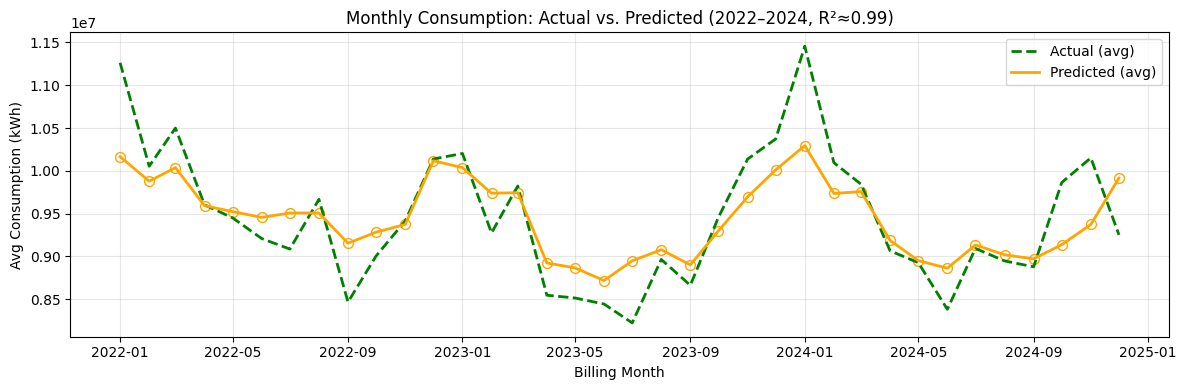

In [122]:
# — after rf.fit(...) and after you’ve created train/test w/ billing_month & total_consumption_kwh —

# 1) Add the predictions
train['predicted'] = rf.predict(X_train)
test ['predicted'] = rf.predict(X_test)

# 2) Combine and compute monthly averages
df_all = pd.concat([
    train[['billing_month','total_consumption_kwh','predicted']],
    test [['billing_month','total_consumption_kwh','predicted']]
], ignore_index=True)

monthly_actual = df_all.groupby('billing_month')['total_consumption_kwh'].mean()
monthly_pred   = df_all.groupby('billing_month')['predicted'].mean()

# 3) Plot in the same style
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.plot(
    monthly_actual.index, monthly_actual.values,
    linestyle='--', linewidth=2, label='Actual (avg)', color='green'
)
plt.plot(
    monthly_pred.index,   monthly_pred.values,
    linestyle='-',  linewidth=2, label='Predicted (avg)', color='orange'
)

plt.scatter(
    monthly_pred.index,   monthly_pred.values,
    s=50, marker='o',
    facecolors='white', edgecolors='orange'
)

plt.title('Monthly Consumption: Actual vs. Predicted (2022–2024, R²≈0.99)')
plt.xlabel('Billing Month')
plt.ylabel('Avg Consumption (kWh)')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

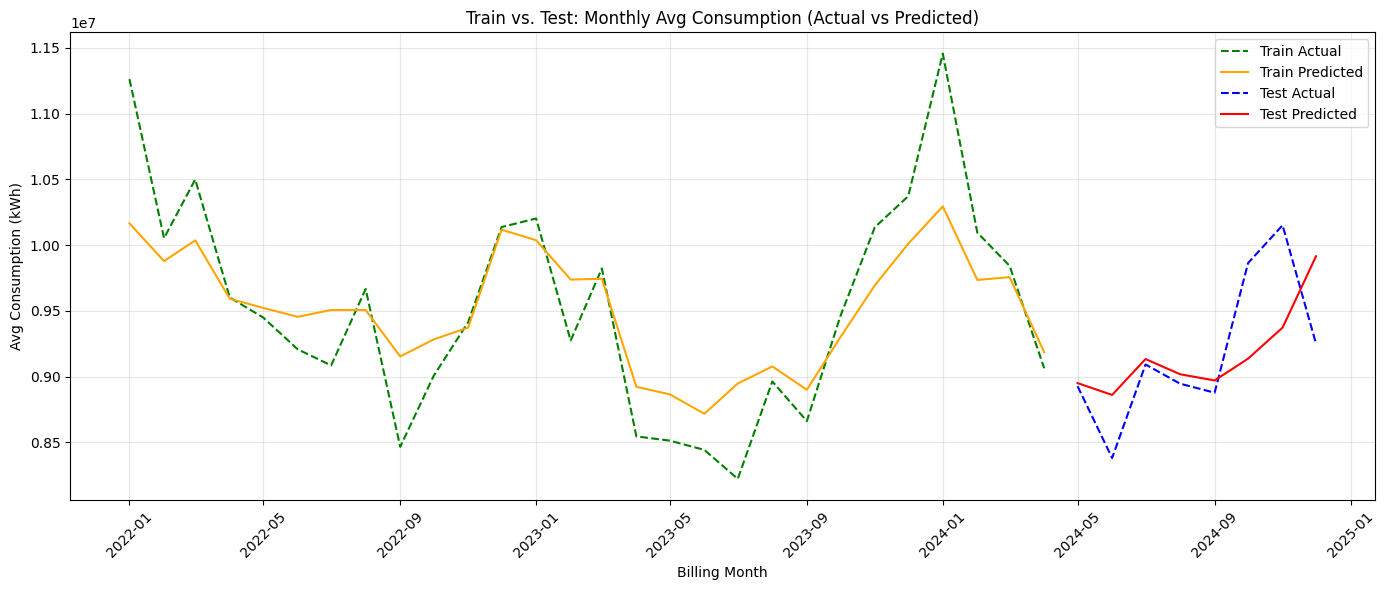

In [123]:
import matplotlib.pyplot as plt
import pandas as pd

# 1) Predict both train and test
train['y_pred'] = rf.predict(X_train)
test['y_pred']  = rf.predict(X_test)
train['y_true'] = y_train.values
test['y_true']  = y_test.values

# 2) Create billing_month column if missing
train['billing_month'] = pd.to_datetime(dict(year=train['year'], month=train['month'], day=1))
test['billing_month']  = pd.to_datetime(dict(year=test['year'], month=test['month'], day=1))

# 3) Group and average per month
monthly_train_actual = train.groupby('billing_month')['y_true'].mean()
monthly_train_pred   = train.groupby('billing_month')['y_pred'].mean()

monthly_test_actual  = test.groupby('billing_month')['y_true'].mean()
monthly_test_pred    = test.groupby('billing_month')['y_pred'].mean()

# 4) Plot both
plt.figure(figsize=(14, 6))

# Train plot
plt.plot(monthly_train_actual.index, monthly_train_actual.values, label='Train Actual', linestyle='--', color='green')
plt.plot(monthly_train_pred.index,   monthly_train_pred.values,   label='Train Predicted', color='orange')

# Test plot
plt.plot(monthly_test_actual.index, monthly_test_actual.values, label='Test Actual', linestyle='--', color='blue')
plt.plot(monthly_test_pred.index,   monthly_test_pred.values,   label='Test Predicted', color='red')

# Formatting
plt.title('Train vs. Test: Monthly Avg Consumption (Actual vs Predicted)')
plt.xlabel('Billing Month')
plt.ylabel('Avg Consumption (kWh)')
plt.grid(alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [124]:
municipality_to_county = {
    'Akmenės r. sav.': 'Šiauliai',
    'Alytaus m. sav.': 'Alytus',
    'Alytaus r. sav.': 'Alytus',
    'Anykščių r. sav.': 'Utena',
    'Birštono sav.': 'Kaunas',
    'Biržų r. sav.': 'Panevėžys',
    'Druskininkų sav.': 'Alytus',
    'Elektrėnų sav.': 'Vilnius',
    'Ignalinos r. sav.': 'Utena',
    'Jonavos r. sav.': 'Kaunas',
    'Joniškio r. sav.': 'Šiauliai',
    'Jurbarko r. sav.': 'Tauragė',
    'Kaišiadorių r. sav.': 'Kaunas',
    'Kalvarijos sav.': 'Marijampolė',
    'Kauno m. sav.': 'Kaunas',
    'Kauno r. sav.': 'Kaunas',
    'Kazlų Rūdos sav.': 'Marijampolė',
    'Kėdainių r. sav.': 'Kaunas',
    'Kelmės r. sav.': 'Šiauliai',
    'Klaipėdos m. sav.': 'Klaipėda',
    'Klaipėdos r. sav.': 'Klaipėda',
    'Kretingos r. sav.': 'Klaipėda',
    'Kupiškio r. sav.': 'Panevėžys',
    'Lazdijų r. sav.': 'Alytus',
    'Marijampolės sav.': 'Marijampolė',
    'Mažeikių r. sav.': 'Telšiai',
    'Molėtų r. sav.': 'Utena',
    'Neringos sav.': 'Klaipėda',
    'Pagėgių sav.': 'Tauragė',
    'Pakruojo r. sav.': 'Šiauliai',
    'Palangos m. sav.': 'Klaipėda',
    'Panevėžio m. sav.': 'Panevėžys',
    'Panevėžio r. sav.': 'Panevėžys',
    'Pasvalio r. sav.': 'Panevėžys',
    'Plungės r. sav.': 'Telšiai',
    'Prienų r. sav.': 'Kaunas',
    'Radviliškio r. sav.': 'Šiauliai',
    'Raseinių r. sav.': 'Kaunas',
    'Rietavo sav.': 'Telšiai',
    'Rokiškio r. sav.': 'Panevėžys',
    'Skuodo r. sav.': 'Klaipėda',
    'Šakių r. sav.': 'Marijampolė',
    'Šalčininkų r. sav.': 'Vilnius',
    'Šiaulių m. sav.': 'Šiauliai',
    'Šiaulių r. sav.': 'Šiauliai',
    'Šilalės r. sav.': 'Tauragė',
    'Šilutės r. sav.': 'Klaipėda',
    'Širvintų r. sav.': 'Vilnius',
    'Švenčionių r. sav.': 'Vilnius',
    'Tauragės r. sav.': 'Tauragė',
    'Telšių r. sav.': 'Telšiai',
    'Trakų r. sav.': 'Vilnius',
    'Ukmergės r. sav.': 'Vilnius',
    'Utenos r. sav.': 'Utena',
    'Varėnos r. sav.': 'Alytus',
    'Vilkaviškio r. sav.': 'Marijampolė',
    'Vilniaus m. sav.': 'Vilnius',
    'Vilniaus r. sav.': 'Vilnius',
    'Visagino sav.': 'Utena',
    'Zarasų r. sav.': 'Utena'
}


In [125]:
# Add 'county' column to your main DataFrame
merged['county'] = merged['object_municipality'].map(municipality_to_county)


In [126]:
merged.head()

object_municipality  year  month  total_consumption_kwh  allowed_power_kw  \
0     Akmenės r. sav.  2022      1             7776567.00         41.396514   
1     Akmenės r. sav.  2022      2             6902665.00         48.878671   
2     Akmenės r. sav.  2022      3             7279188.08         49.204669   
3     Akmenės r. sav.  2022      4             6976821.00         48.792730   
4     Akmenės r. sav.  2022      5             6738225.00         49.799368   

   remote_metering  automated_metering_flag   latitude  longitude  \
0         0.000726                 0.172113  56.246052  22.754597   
1         0.000773                 0.183153  56.246052  22.754597   
2         0.000778                 0.181323  56.246052  22.754597   
3         0.001547                 0.184068  56.246052  22.754597   
4         0.001580                 0.187204  56.246052  22.754597   

       weather_query       tavg  tmin  tmax  prcp       wspd  season temp_bin  \
0  Akmenė, Lithuania  -0.309375 -14.7   5.8  67.7  23.834375  Winter    < 0°C   
1  Akmenė, Lithuania   0.889655  -6.4   6.7  96.2  24.144828  Winter    0-5°C   
2  Akmenė, Lithuania   1.003125  -7.5  13.3   3.5  16.093750  Spring    0-5°C   
3  Akmenė, Lithuania   5.012903  -5.7  16.4  55.0  21.129032  Spring   5-10°C   
4  Akmenė, Lithuania  10.484375  -1.9  21.1  92.8  20.603125  Spring  10-15°C   

   days_in_month         HDD billing_month    county  
0             31  567.590625    2022-01-01  Šiauliai  
1             28  479.089655    2022-02-01  Šiauliai  
2             31  526.903125    2022-03-01  Šiauliai  
3             30  389.612903    2022-04-01  Šiauliai  
4             31  232.984375    2022-05-01  Šiauliai

In [127]:
# Add 'county' column to your main DataFrame
merged['county'] = merged['object_municipality'].map(municipality_to_county)


In [128]:
merged.head()

object_municipality  year  month  total_consumption_kwh  allowed_power_kw  \
0     Akmenės r. sav.  2022      1             7776567.00         41.396514   
1     Akmenės r. sav.  2022      2             6902665.00         48.878671   
2     Akmenės r. sav.  2022      3             7279188.08         49.204669   
3     Akmenės r. sav.  2022      4             6976821.00         48.792730   
4     Akmenės r. sav.  2022      5             6738225.00         49.799368   

   remote_metering  automated_metering_flag   latitude  longitude  \
0         0.000726                 0.172113  56.246052  22.754597   
1         0.000773                 0.183153  56.246052  22.754597   
2         0.000778                 0.181323  56.246052  22.754597   
3         0.001547                 0.184068  56.246052  22.754597   
4         0.001580                 0.187204  56.246052  22.754597   

       weather_query       tavg  tmin  tmax  prcp       wspd  season temp_bin  \
0  Akmenė, Lithuania  -0.309375 -14.7   5.8  67.7  23.834375  Winter    < 0°C   
1  Akmenė, Lithuania   0.889655  -6.4   6.7  96.2  24.144828  Winter    0-5°C   
2  Akmenė, Lithuania   1.003125  -7.5  13.3   3.5  16.093750  Spring    0-5°C   
3  Akmenė, Lithuania   5.012903  -5.7  16.4  55.0  21.129032  Spring   5-10°C   
4  Akmenė, Lithuania  10.484375  -1.9  21.1  92.8  20.603125  Spring  10-15°C   

   days_in_month         HDD billing_month    county  
0             31  567.590625    2022-01-01  Šiauliai  
1             28  479.089655    2022-02-01  Šiauliai  
2             31  526.903125    2022-03-01  Šiauliai  
3             30  389.612903    2022-04-01  Šiauliai  
4             31  232.984375    2022-05-01  Šiauliai

In [129]:
pd.get_dummies(merged['county'])


Alytus  Kaunas  Klaipėda  Marijampolė  Panevėžys  Tauragė  Telšiai  \
0      False   False     False        False      False    False    False   
1      False   False     False        False      False    False    False   
2      False   False     False        False      False    False    False   
3      False   False     False        False      False    False    False   
4      False   False     False        False      False    False    False   
...      ...     ...       ...          ...        ...      ...      ...   
2155   False   False     False        False      False    False    False   
2156   False   False     False        False      False    False    False   
2157   False   False     False        False      False    False    False   
2158   False   False     False        False      False    False    False   
2159   False   False     False        False      False    False    False   

      Utena  Vilnius  Šiauliai  
0     False    False      True  
1     False    False      True  
2     False    False      True  
3     False    False      True  
4     False    False      True  
...     ...      ...       ...  
2155  False     True     False  
2156  False     True     False  
2157  False     True     False  
2158  False     True     False  
2159  False     True     False  

[2160 rows x 10 columns]

In [130]:
merged.head()

object_municipality  year  month  total_consumption_kwh  allowed_power_kw  \
0     Akmenės r. sav.  2022      1             7776567.00         41.396514   
1     Akmenės r. sav.  2022      2             6902665.00         48.878671   
2     Akmenės r. sav.  2022      3             7279188.08         49.204669   
3     Akmenės r. sav.  2022      4             6976821.00         48.792730   
4     Akmenės r. sav.  2022      5             6738225.00         49.799368   

   remote_metering  automated_metering_flag   latitude  longitude  \
0         0.000726                 0.172113  56.246052  22.754597   
1         0.000773                 0.183153  56.246052  22.754597   
2         0.000778                 0.181323  56.246052  22.754597   
3         0.001547                 0.184068  56.246052  22.754597   
4         0.001580                 0.187204  56.246052  22.754597   

       weather_query       tavg  tmin  tmax  prcp       wspd  season temp_bin  \
0  Akmenė, Lithuania  -0.309375 -14.7   5.8  67.7  23.834375  Winter    < 0°C   
1  Akmenė, Lithuania   0.889655  -6.4   6.7  96.2  24.144828  Winter    0-5°C   
2  Akmenė, Lithuania   1.003125  -7.5  13.3   3.5  16.093750  Spring    0-5°C   
3  Akmenė, Lithuania   5.012903  -5.7  16.4  55.0  21.129032  Spring   5-10°C   
4  Akmenė, Lithuania  10.484375  -1.9  21.1  92.8  20.603125  Spring  10-15°C   

   days_in_month         HDD billing_month    county  
0             31  567.590625    2022-01-01  Šiauliai  
1             28  479.089655    2022-02-01  Šiauliai  
2             31  526.903125    2022-03-01  Šiauliai  
3             30  389.612903    2022-04-01  Šiauliai  
4             31  232.984375    2022-05-01  Šiauliai

In [131]:
# 3. Drop municipality and one-hot encode county
merged = merged.drop(columns=['object_municipality'])
merged = pd.get_dummies(merged, columns=['county'])


In [132]:
merged.to_csv('merged_with_all_columns.csv',index = False)

In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Define features and target
drop_cols = [
    'weather_query', 'temp_bin', 'latitude', 'longitude',
    'billing_month', 'total_consumption_kwh'
]



X = merged.drop(columns=drop_cols)
y = merged['total_consumption_kwh']

# 2. Train/test split (time-based, e.g. 2024-05-01 cutoff)
split_date = pd.Timestamp('2024-05-01')
train = merged[merged['billing_month'] < split_date].copy()
test  = merged[merged['billing_month'] >= split_date].copy()

X_train = train.drop(columns=drop_cols)
X_test  = test.drop(columns=drop_cols)
y_train = train['total_consumption_kwh']
y_test  = test['total_consumption_kwh']


# One-hot encode 'season' if it's still in the features
if 'season' in X_train.columns:
    X_train = pd.get_dummies(X_train, columns=['season'], drop_first=True)
    X_test  = pd.get_dummies(X_test,  columns=['season'], drop_first=True)

    # Make sure test matches train columns
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 3. Train default RF model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# 4. Predict
y_pred = rf.predict(X_test)

# 5. Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Default RF with County Encoding:")
print(f"  R²   : {r2:.4f}")
print(f"  MAE  : {mae:,.0f}")
print(f"  RMSE : {rmse:,.0f}")


Default RF with County Encoding:
  R²   : 0.7658
  MAE  : 3,383,465
  RMSE : 8,514,994


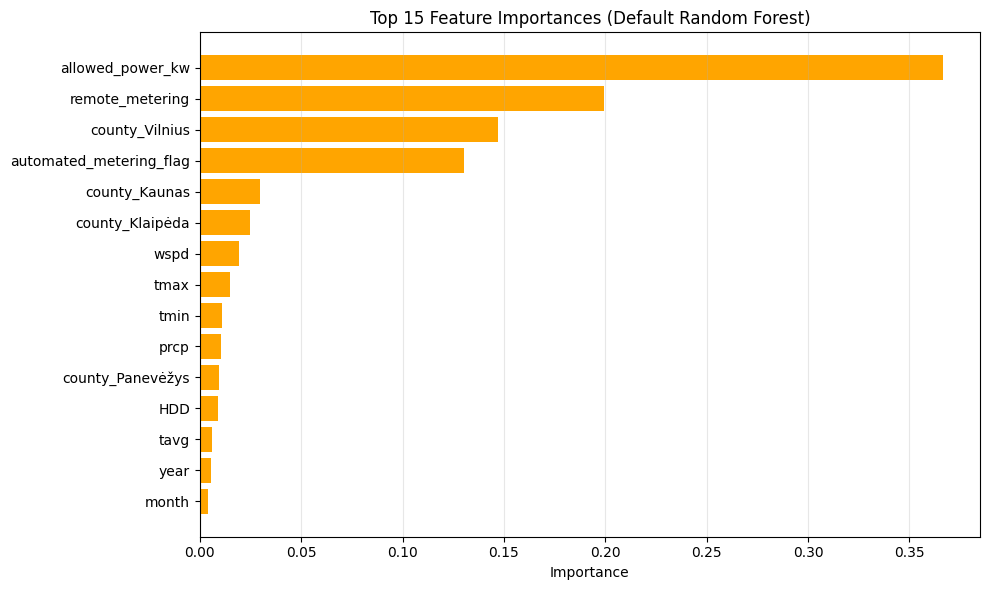

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained model
importances = rf.feature_importances_
features = X_train.columns
sorted_idx = np.argsort(importances)[::-1]  # Descending order

# Top 15
top_n = 15
top_features = features[sorted_idx][:top_n]
top_importances = importances[sorted_idx][:top_n]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_features[::-1], top_importances[::-1], color='orange')
plt.title('Top 15 Feature Importances (Default Random Forest)')
plt.xlabel('Importance')
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


In [135]:
merged.to_csv('merged_encoded_with_county.csv',index = False)

In [136]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import datetime

# === 1. Load Data ===
df = pd.read_csv("/kaggle/working/merged_encoded_with_county.csv", parse_dates=['billing_month'])

# === 2. Define Target and Features ===
target = 'total_consumption_kwh'
drop_cols = ['billing_month', 'weather_query', 'temp_bin', 'latitude', 'longitude']

X = df.drop(columns=[target] + drop_cols)
y = df[target]

# === 3. Time-Based Train/Test Split ===
split_date = pd.Timestamp("2024-05-01")

train_mask = df['billing_month'] < split_date
test_mask  = df['billing_month'] >= split_date

X_train = X[train_mask]
y_train = y[train_mask]
X_test  = X[test_mask]
y_test  = y[test_mask]


# One-hot encode 'season' if it's still in the features
if 'season' in X_train.columns:
    X_train = pd.get_dummies(X_train, columns=['season'], drop_first=True)
    X_test  = pd.get_dummies(X_test,  columns=['season'], drop_first=True)

    # Make sure test matches train columns
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)




# === 4. Define Parameter Grid for Tuning ===
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Set Up RandomizedSearchCV 
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
search = RandomizedSearchCV(
    rf,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring='neg_mean_absolute_error',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

#  6. Train
search.fit(X_train, y_train)
best_rf = search.best_estimator_

# === 7. Predict & Evaluate ===
y_pred = best_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# === 8. Report Results ===
print("🔍 Tuned Random Forest Performance (on Test Set):")
print(f"R²   : {r2:.4f}")
print(f"MAE  : {mae:,.0f}")
print(f"RMSE : {rmse:,.0f}")
print(f"Best Params: {search.best_params_}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
🔍 Tuned Random Forest Performance (on Test Set):
R²   : 0.5900
MAE  : 5,201,021
RMSE : 11,266,879
Best Params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}


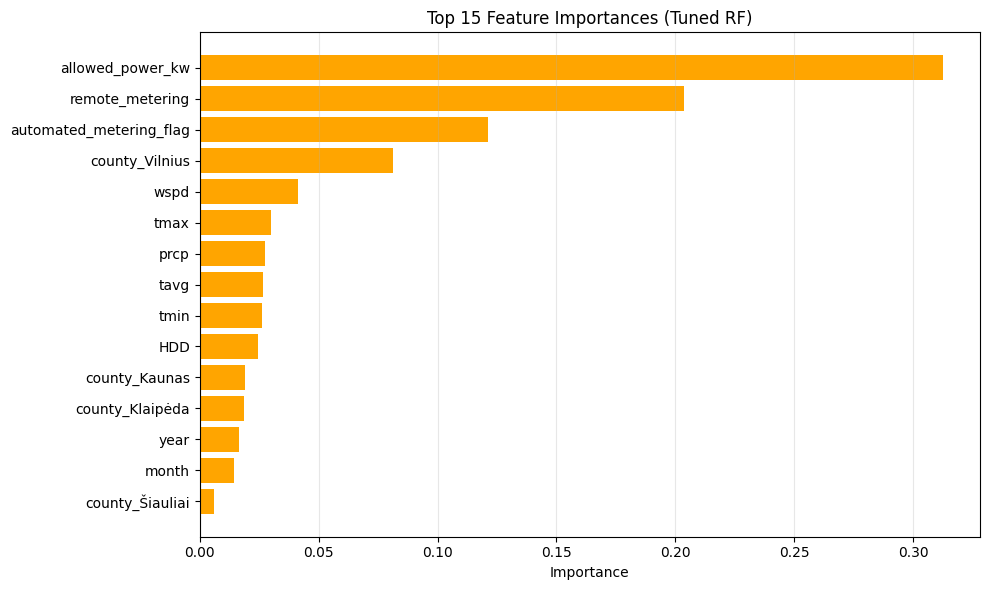

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from best_rf
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_rf.feature_importances_
}).sort_values(by='importance', ascending=False)

# Plot top 15
top_15 = importances.head(15)

plt.figure(figsize=(10, 6))
plt.barh(top_15['feature'][::-1], top_15['importance'][::-1], color='orange')
plt.title('Top 15 Feature Importances (Tuned RF)')
plt.xlabel('Importance')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


In [138]:
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

tscv = TimeSeriesSplit(n_splits=5)

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 1.0]
}

rf = RandomForestRegressor(random_state=42)

search = RandomizedSearchCV(
    rf,
    param_distributions=param_grid,
    n_iter=20,
    scoring='r2',  # Optimize for R² now
    cv=tscv,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train)
best_rf = search.best_estimator_

# Evaluate on held-out test
y_pred = best_rf.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("Tuned RF R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Tuned RF R²: 0.4623043781039633
MAE: 6090292.297557672
RMSE: 12902594.329820134


In [139]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np


drop_cols = [
    'total_consumption_kwh',
    'billing_month',
    'weather_query',       # <- Drop this
    'temp_bin',            # <- Drop if not encoded
    'season',              # <- Drop if not encoded
    'object_municipality', # <- Drop if not encoded
    'latitude', 'longitude' # <- Not needed
]

X_train = train.drop(columns=drop_cols, errors='ignore')
X_test = test.drop(columns=drop_cols, errors='ignore')



y_train = train["total_consumption_kwh"]
y_test = test["total_consumption_kwh"]


# Grid Search
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [30,None],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)
best_rf = grid.best_estimator_

# Evaluation
y_pred = best_rf.predict(X_test)
print("Best RF Params:", grid.best_params_)
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   4.3s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   4.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   4.7s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   3.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=700; total time=   3.6s
[CV] END max_depth=50, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=700; total time=  10.0s
[CV] END max_depth=30, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=300; 

In [140]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load data
df = pd.read_csv("/kaggle/working/merged_encoded_with_county.csv", parse_dates=["billing_month"])


# Recreate a 'county' column from one-hot dummies
county_cols = [col for col in df.columns if col.startswith("county_")]
df["county"] = df[county_cols].idxmax(axis=1).str.replace("county_", "")

# Now sort by county and billing_month
df = df.sort_values(by=["county", "billing_month"]).copy()


df["lag1_kwh"] = df.groupby("county")["total_consumption_kwh"].shift(1)
df["lag2_kwh"] = df.groupby("county")["total_consumption_kwh"].shift(2)
df = df.dropna(subset=["lag1_kwh", "lag2_kwh"])


# Drop early NaNs (first month per municipality)
df = df.dropna(subset=["lag1_kwh", "lag2_kwh"])


# === Split into train/test based on billing_month ===
split_date = pd.Timestamp("2024-01-01")
train = df[df["billing_month"] < split_date].copy()
test  = df[df["billing_month"] >= split_date].copy()

# === Define Features and Target ===
y_train = train["total_consumption_kwh"]
y_test = test["total_consumption_kwh"]

drop_cols = [
    "total_consumption_kwh", "billing_month", "weather_query", 
    "temp_bin", "latitude", "longitude",'season', 'temp_bin', 'county'
]
X_train = train.drop(columns=drop_cols, errors='ignore')
X_test = test.drop(columns=drop_cols, errors='ignore')

# === Train Random Forest (default first) ===
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# === Evaluate ===
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("eeecconRandom Forest with Lag Features:")
print(f"R²   : {r2:.4f}")
print(f"MAE  : {mae:,.0f}")
print(f"RMSE : {rmse:,.0f}")


eeecconRandom Forest with Lag Features:
R²   : 0.2788
MAE  : 5,173,461
RMSE : 15,459,007


In [141]:
df.to_csv('merged_county_with_rolling_features.csv',index = False)


In [142]:
df.shape

(2140, 32)

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)
best_rf = grid.best_estimator_

# Predict and evaluate
y_pred = best_rf.predict(X_test)
print("Best RF Params:", grid.best_params_)
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   4.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   4.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   4.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=700; total time=   3.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=700; total time=   3.6s
[CV] END max_depth=50, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=700; total time=   8.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1

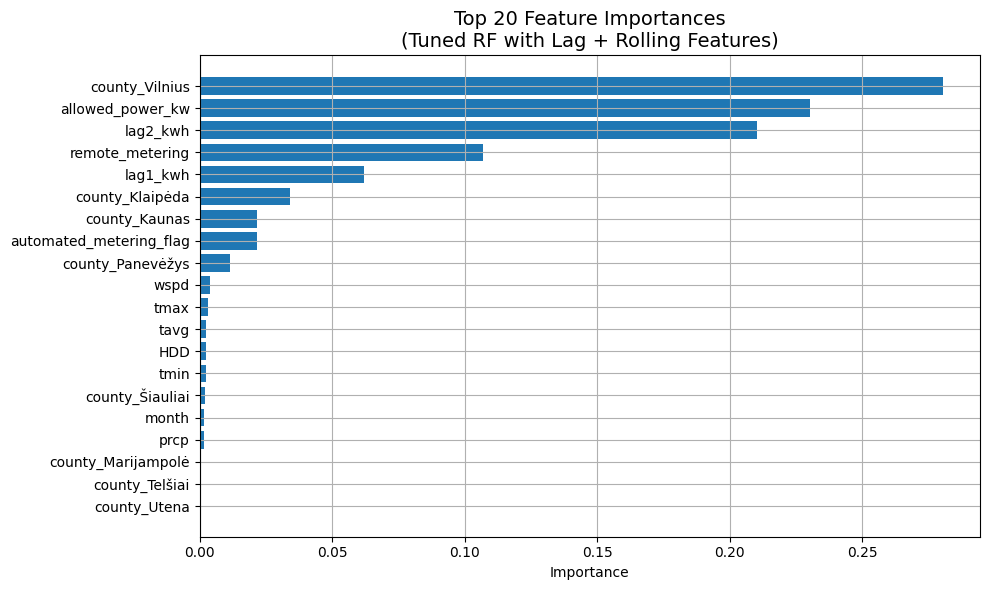

In [144]:
import matplotlib.pyplot as plt
import pandas as pd

#Plotting top features
importances_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importances_df.head(20).iloc[::-1]['feature'],
         importances_df.head(20).iloc[::-1]['importance'])
plt.title("Top 20 Feature Importances\n(Tuned RF with Lag + Rolling Features)", fontsize=14)
plt.xlabel("Importance")
plt.tight_layout()
plt.grid(True)
plt.show()


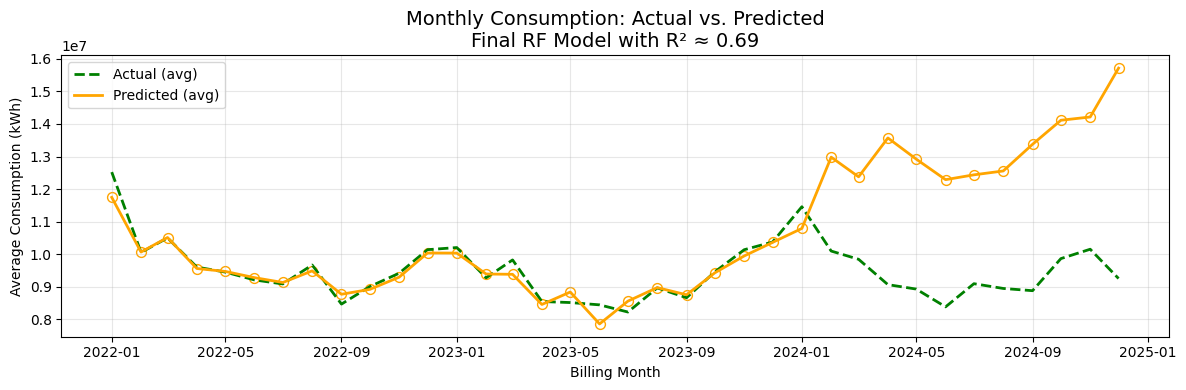

In [145]:
# Make sure your train and test sets have prediction results
train['predicted'] = rf.predict(X_train)
test['predicted'] = rf.predict(X_test)

# Combine train + test
df_all = pd.concat([
    train[['billing_month', 'total_consumption_kwh', 'predicted']],
    test[['billing_month', 'total_consumption_kwh', 'predicted']]
], ignore_index=True)

# Group by billing month
monthly_actual = df_all.groupby('billing_month')['total_consumption_kwh'].mean()
monthly_pred = df_all.groupby('billing_month')['predicted'].mean()

# Plot
plt.figure(figsize=(12, 4))
plt.plot(monthly_actual.index, monthly_actual.values,
         linestyle='--', linewidth=2, label='Actual (avg)', color='green')
plt.plot(monthly_pred.index, monthly_pred.values,
         linestyle='-', linewidth=2, label='Predicted (avg)', color='orange')
plt.scatter(monthly_pred.index, monthly_pred.values,
            s=50, marker='o', facecolors='white', edgecolors='orange')

plt.title('Monthly Consumption: Actual vs. Predicted\nFinal RF Model with R² ≈ 0.69', fontsize=14)
plt.xlabel('Billing Month')
plt.ylabel('Average Consumption (kWh)')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [146]:
# Make sure y_test and y_pred are defined
import numpy as np

# MAPE: Mean Absolute Percentage Error
mape = np.mean(np.abs((monthly_actual - monthly_pred) / monthly_actual)) * 100
print(f"MAPE: {mape:.2f}%")


MAPE: 14.61%


In [147]:
df_all.head()

billing_month  total_consumption_kwh     predicted
0    2022-01-01             6256983.30  6.077827e+06
1    2022-01-01             1607320.00  1.636266e+06
2    2022-01-01             2726544.00  3.353625e+06
3    2022-02-01            11366662.08  1.112304e+07
4    2022-02-01             1719785.00  1.744346e+06

In [148]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your dataframe (replace with actual filename if reading from CSV)
# df = pd.read_csv("your_file.csv", parse_dates=["billing_month"])

# Calculate metrics
y_true = df_all["total_consumption_kwh"]
y_pred = df_all["predicted"]

mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
r2 = r2_score(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Print results
print(f"MAE:  {mae:,.0f} kWh")
print(f"RMSE: {rmse:,.0f} kWh")
print(f"R²:   {r2:.4f}")
print(f"MAPE: {mape:.2f}%")


MAE:  2,083,065 kWh
RMSE: 9,082,038 kWh
R²:   0.7517
MAPE: 30.52%


In [149]:
df.head()

year  month  total_consumption_kwh  allowed_power_kw  remote_metering  \
216   2022      1             6256983.30         40.167180         0.001541   
828   2022      1             1607320.00         21.869718         0.000000   
1656  2022      1             2726544.00         30.423935         0.000000   
37    2022      2            11366662.08         52.899382         0.001686   
73    2022      2             1719785.00         26.408301         0.001931   

      automated_metering_flag   latitude  longitude  \
216                  0.271957  54.017193  23.977228   
828                  0.291080  54.090023  23.518307   
1656                 0.188641  54.212176  24.567372   
37                   0.298482  54.396134  24.045927   
73                   0.292471  54.364775  23.811876   

                                  weather_query      tavg  tmin  tmax  prcp  \
216                     Druskininkai, Lithuania -0.393750 -11.5   7.4  63.9   
828   Lazdijai district municipality, Lithuania -0.656250 -11.4   6.8  61.9   
1656                          Varėna, Lithuania -0.700000  -3.0   1.0  93.8   
37                            Alytus, Lithuania  0.700000  -1.4   3.4  58.8   
73      Alytus district municipality, Lithuania  1.196552  -6.5   8.1  53.2   

           wspd  season temp_bin  days_in_month         HDD billing_month  \
216   25.525000  Winter    < 0°C             31  570.206250    2022-01-01   
828   25.318750  Winter    < 0°C             31  578.343750    2022-01-01   
1656  12.000000  Winter    < 0°C             31  579.700000    2022-01-01   
37    11.300000  Winter    0-5°C             28  484.400000    2022-02-01   
73    24.213793  Winter    0-5°C             28  470.496552    2022-02-01   

      county_Alytus  county_Kaunas  county_Klaipėda  county_Marijampolė  \
216            True          False            False               False   
828            True          False            False               False   
1656           True          False            False               False   
37             True          False            False               False   
73             True          False            False               False   

      county_Panevėžys  county_Tauragė  county_Telšiai  county_Utena  \
216              False           False           False         False   
828              False           False           False         False   
1656             False           False           False         False   
37               False           False           False         False   
73               False           False           False         False   

      county_Vilnius  county_Šiauliai  county     lag1_kwh    lag2_kwh  
216            False            False  Alytus   2037732.00  12575717.0  
828            False            False  Alytus   6256983.30   2037732.0  
1656           False            False  Alytus   1607320.00   6256983.3  
37             False            False  Alytus   2726544.00   1607320.0  
73             False            False  Alytus  11366662.08   2726544.0

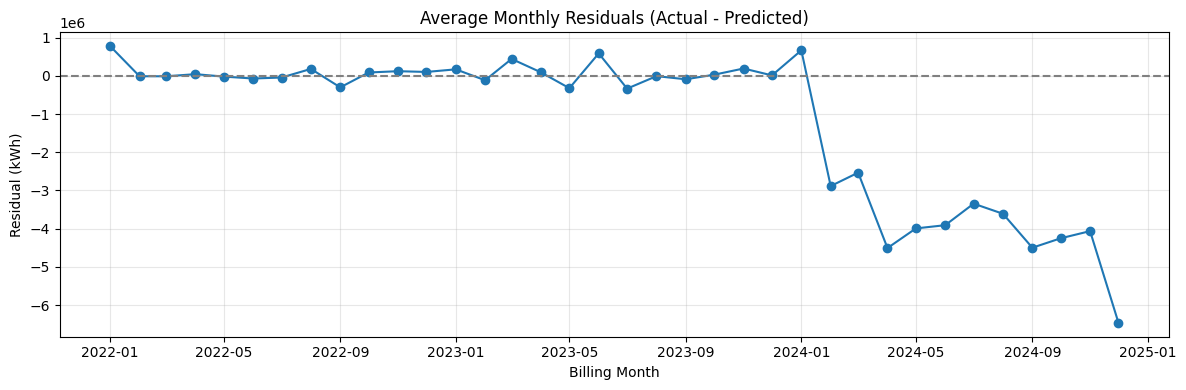

In [150]:
df_all["residual"] = df_all["total_consumption_kwh"] - df_all["predicted"]
monthly_residual = df_all.groupby("billing_month")["residual"].mean()

plt.figure(figsize=(12, 4))
plt.plot(monthly_residual.index, monthly_residual.values, marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Average Monthly Residuals (Actual - Predicted)")
plt.ylabel("Residual (kWh)")
plt.xlabel("Billing Month")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [151]:
!pip install shap

import shap
import matplotlib.pyplot as plt
import numpy as np


R²   : 0.9201
MAE  : 1,468,407 kWh
RMSE : 5,311,131 kWh


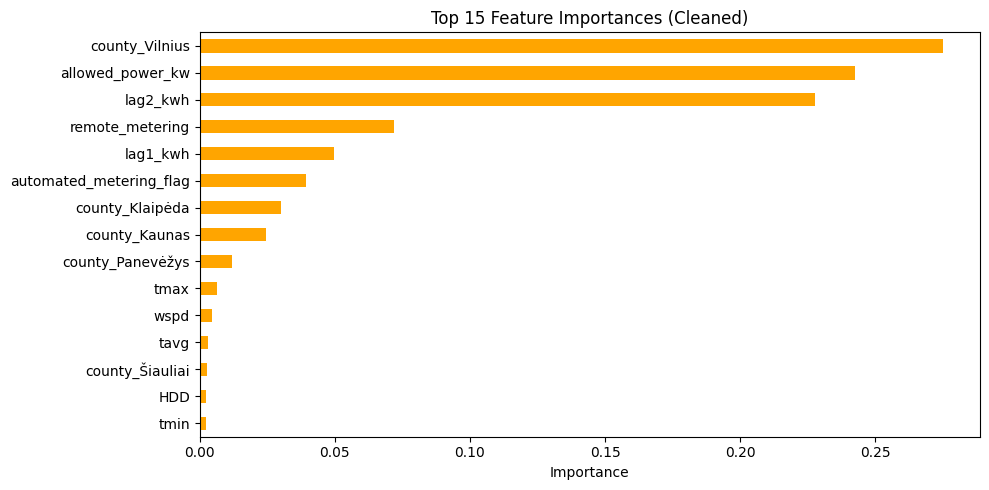

In [152]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("merged_county_with_rolling_features.csv")
df['billing_month'] = pd.to_datetime(df['billing_month'])

# Add cyclical month features
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)


df_main  =  df.copy()
# Drop redundant/irrelevant columns
drop_cols = ['object_municipality', 'weather_query', 'temp_bin', 'season', 'latitude', 'longitude']
df = df.drop(columns=drop_cols, errors='ignore')

# Drop all bool columns — these are duplicate dummy encodings
df = df.drop(columns=df.select_dtypes(include='bool').columns)

# Split target
y = df['total_consumption_kwh']
X = df.drop(columns=['total_consumption_kwh','billing_month'])

# One-hot encode any remaining categoricals
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train RF
rf = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100




# Evaluation
print("R²   :", round(r2_score(y_test, y_pred), 4))
print("MAE  :", f"{mean_absolute_error(y_test, y_pred):,.0f} kWh")
print("RMSE :", f"{np.sqrt(mean_squared_error(y_test, y_pred)):,.0f} kWh")


# Feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 5))
top_features.plot(kind='barh', color='orange')
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (Cleaned)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


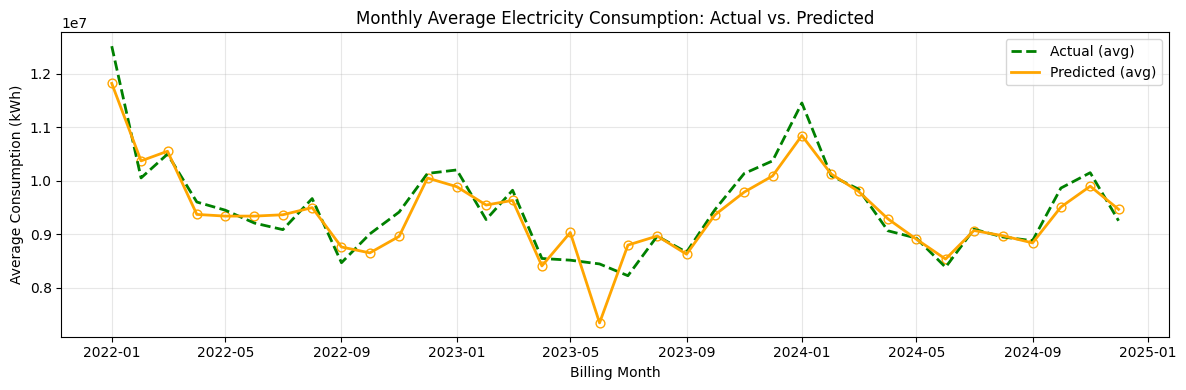

In [153]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you still have df (your modeling DataFrame), X_train, X_test, y_train, y_test

# Reconstruct predictions
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

# Get billing_month back (merge it with predictions)
train_months = df.loc[X_train.index, 'billing_month'].reset_index(drop=True)
test_months = df.loc[X_test.index, 'billing_month'].reset_index(drop=True)
train_true = y_train.reset_index(drop=True)
test_true = y_test.reset_index(drop=True)

# Create one DataFrame
df_plot = pd.concat([
    pd.DataFrame({
        'billing_month': train_months,
        'actual': train_true,
        'predicted': train_pred
    }),
    pd.DataFrame({
        'billing_month': test_months,
        'actual': test_true,
        'predicted': test_pred
    })
], ignore_index=True)

# Group by month (mean per month)
monthly_actual = df_plot.groupby('billing_month')['actual'].mean()
monthly_pred = df_plot.groupby('billing_month')['predicted'].mean()

# Plot
plt.figure(figsize=(12, 4))
plt.plot(monthly_actual.index, monthly_actual.values, linestyle='--', linewidth=2, label='Actual (avg)', color='green')
plt.plot(monthly_pred.index, monthly_pred.values, linestyle='-', linewidth=2, label='Predicted (avg)', color='orange')
plt.scatter(monthly_pred.index, monthly_pred.values, s=40, facecolors='white', edgecolors='orange')

plt.title('Monthly Average Electricity Consumption: Actual vs. Predicted')
plt.xlabel('Billing Month')
plt.ylabel('Average Consumption (kWh)')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [154]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, rf.predict(X_train))
r2_test  = r2_score(y_test, rf.predict(X_test))

print(f"Train R²: {r2_train:.4f}")
print(f"Test  R²: {r2_test:.4f}")


Train R²: 0.9930
Test  R²: 0.9201


In [155]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
import pandas as pd
import numpy as np

# Load and preprocess data
df = pd.read_csv("merged_county_with_rolling_features.csv")
df['billing_month'] = pd.to_datetime(df['billing_month'])
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Drop non-numeric or irrelevant columns
drop_cols = ['object_municipality', 'weather_query', 'billing_month', 'temp_bin', 'season', 'latitude', 'longitude']
X = df.drop(columns=drop_cols + ['total_consumption_kwh'], errors='ignore')
y = df['total_consumption_kwh']

# One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)

# Initialize model
rf = RandomForestRegressor(n_estimators=300, random_state=42,min_samples_leaf = 10,n_jobs=-1)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, X, y, cv=kf, scoring='r2')

# Print results
print("Cross-Validation R² Scores:", np.round(cv_scores, 4))
print("Average R² Score:", round(np.mean(cv_scores), 4))


Cross-Validation R² Scores: [0.8799 0.9016 0.8829 0.8607 0.9493]
Average R² Score: 0.8949


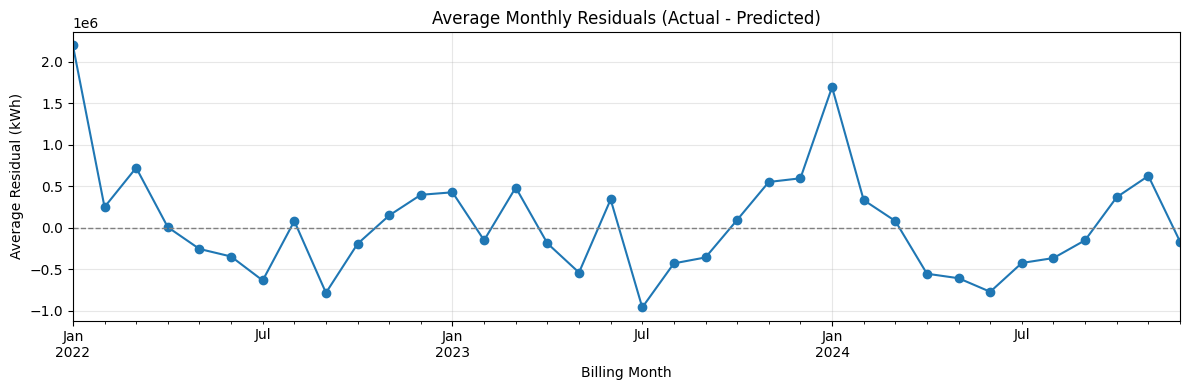

In [156]:
# Fit model on the full dataset after CV to get residuals
rf.fit(X, y)

# Add predictions and residuals
df['predicted'] = rf.predict(X)
df['residual'] = df['total_consumption_kwh'] - df['predicted']

# Group by billing_month and compute average residuals
monthly_residual = df.groupby('billing_month')['residual'].mean()

# Plot monthly residuals
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
monthly_residual.plot(marker='o')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Average Monthly Residuals (Actual - Predicted)')
plt.xlabel('Billing Month')
plt.ylabel('Average Residual (kWh)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


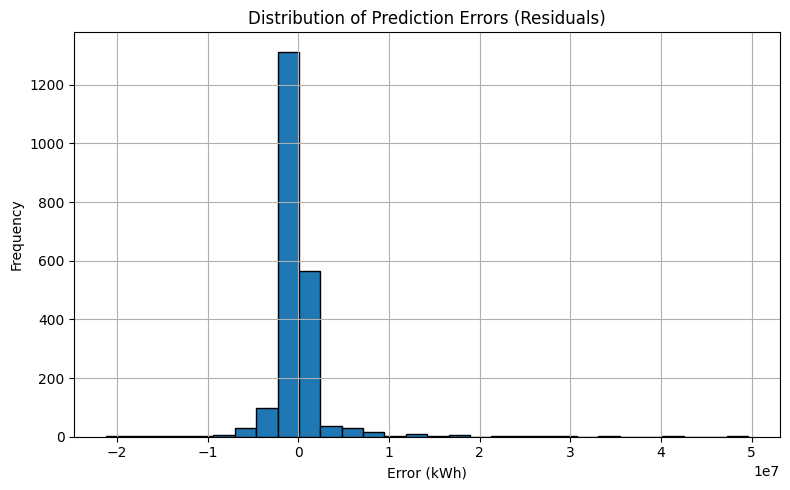

In [157]:
plt.figure(figsize=(8, 5))
df['residual'].hist(bins=30, edgecolor='black')
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Error (kWh)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


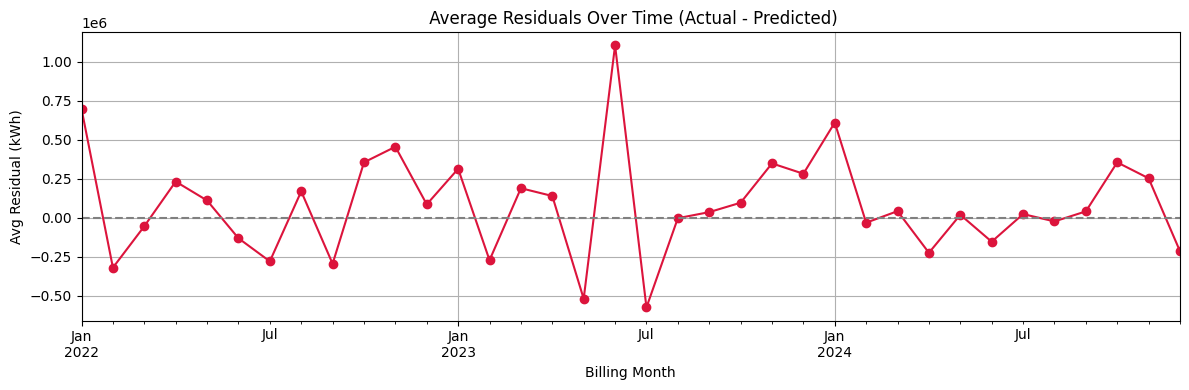

In [158]:
import matplotlib.pyplot as plt

# Compute residuals
df_plot['residual'] = df_plot['actual'] - df_plot['predicted']

# Average residuals per month
monthly_residuals = df_plot.groupby('billing_month')['residual'].mean()

# Plot
plt.figure(figsize=(12, 4))
monthly_residuals.plot(marker='o', linestyle='-', color='crimson')
plt.axhline(0, linestyle='--', color='gray')
plt.title(" Average Residuals Over Time (Actual - Predicted)")
plt.xlabel("Billing Month")
plt.ylabel("Avg Residual (kWh)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [159]:
# Load original data to get county names
raw_df = pd.read_csv("/kaggle/working/merged_county_with_rolling_features.csv")
counties = raw_df['county'] if 'county' in raw_df else None

# If you dropped 'county', but still have county_XXX dummies, we can get county name from the one-hot encoded columns:
if counties is None:
    county_cols = [col for col in X.columns if col.startswith('county_')]
    counties = X[county_cols].idxmax(axis=1).str.replace('county_', '')

# Attach county info to df_plot
df_plot['county'] = counties.loc[df_plot.index].values


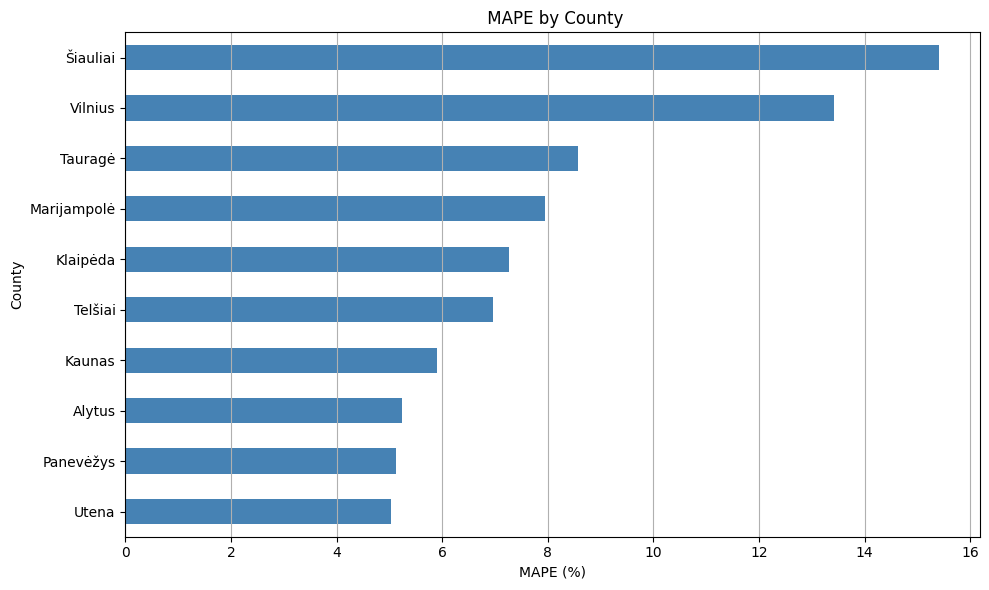

In [160]:
# Compute MAPE for each county
mape_by_county = (
    df_plot.groupby('county')
    .apply(lambda g: np.mean(np.abs((g['actual'] - g['predicted']) / g['actual'])) * 100)
    .sort_values()
)

# Plot
plt.figure(figsize=(10, 6))
mape_by_county.plot(kind='barh', color='steelblue')
plt.title(" MAPE by County")
plt.xlabel("MAPE (%)")
plt.ylabel("County")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


In [161]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to compute metrics per group
def compute_metrics(group):
    mae = mean_absolute_error(group['actual'], group['predicted'])
    rmse = np.sqrt(mean_squared_error(group['actual'], group['predicted']))
    r2 = r2_score(group['actual'], group['predicted'])
    return pd.Series({'MAE': mae, 'RMSE': rmse, 'R2': r2})

# Apply per county
metrics_by_county = df_plot.groupby('county').apply(compute_metrics)
metrics_by_county = metrics_by_county.sort_values('R2', ascending=False)


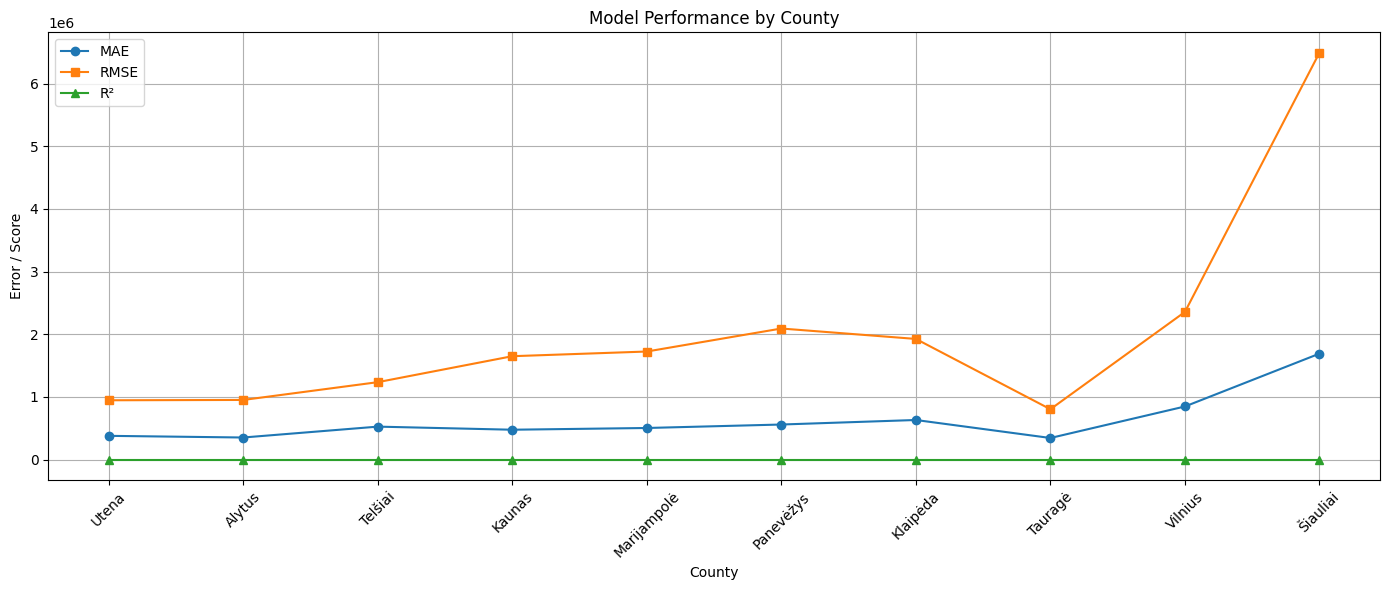

In [162]:
plt.figure(figsize=(14, 6))

# Plot MAE
plt.plot(metrics_by_county.index, metrics_by_county['MAE'], marker='o', label='MAE')

# Plot RMSE
plt.plot(metrics_by_county.index, metrics_by_county['RMSE'], marker='s', label='RMSE')

# Plot R²
plt.plot(metrics_by_county.index, metrics_by_county['R2'], marker='^', label='R²')

plt.title("Model Performance by County")
plt.xlabel("County")
plt.ylabel("Error / Score")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [163]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute MAE, RMSE, R² by county
def compute_metrics(group):
    mae = mean_absolute_error(group['actual'], group['predicted'])
    rmse = np.sqrt(mean_squared_error(group['actual'], group['predicted']))
    r2 = r2_score(group['actual'], group['predicted'])
    return pd.Series({'MAE': mae, 'RMSE': rmse, 'R2': r2})

metrics_by_county = df_plot.groupby('county').apply(compute_metrics)


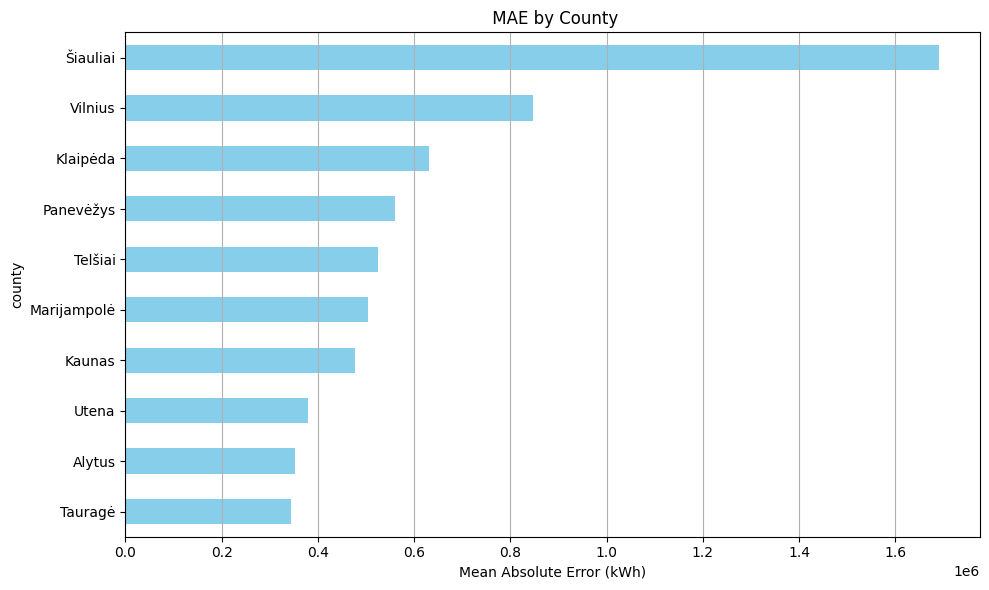

In [164]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
metrics_by_county['MAE'].sort_values().plot(kind='barh', color='skyblue')
plt.title(" MAE by County")
plt.xlabel("Mean Absolute Error (kWh)")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


# **XGBOOST**

In [165]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [166]:
# Assume X and y are already defined and clean
X = X.loc[:, ~X.columns.duplicated()]  # remove duplicate columns

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [167]:
xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [168]:
y_pred = xgb_model.predict(X_test)

r2  = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("XGBoost Performance:")
print("R²   :", round(r2, 4))
print("MAE  :", f"{mae:,.0f} kWh")
print("RMSE :", f"{rmse:,.0f} kWh")
print("MAPE :", f"{mape:.2f}%")


XGBoost Performance:
R²   : 0.9425
MAE  : 1,453,369 kWh
RMSE : 4,506,798 kWh
MAPE : 21.92%


In [169]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv("merged_county_with_rolling_features.csv")
df['billing_month'] = pd.to_datetime(df['billing_month'])
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Drop non-numeric/categorical
drop_cols = ['weather_query', 'billing_month', 'temp_bin', 'season', 'latitude', 'longitude']
target = 'total_consumption_kwh'

results = []

# Extract all unique counties
counties = [col for col in df.columns if col.startswith("county_")]

for county_col in counties:
    # Filter rows where county is True
    df_subset = df[df[county_col] == True].copy()
    if len(df_subset) < 100:
        continue  # skip very small counties

    X = df_subset.drop(columns=drop_cols + [target])
    y = df_subset[target]
    X = pd.get_dummies(X, drop_first=True)
    X = X.loc[:, ~X.columns.duplicated()]  # remove any duplicate columns

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = XGBRegressor(n_estimators=300, max_depth=6, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        'county': county_col.replace('county_', ''),
        'R²': round(r2, 4),
        'MAE': int(mae),
        'RMSE': int(rmse),
        'n_samples': len(df_subset)
    })

# Show results sorted by R²
results_df = pd.DataFrame(results).sort_values(by='R²', ascending=False)
print(results_df)


        county      R²      MAE     RMSE  n_samples
2     Klaipėda  0.9976   570679   832142        250
8      Vilnius  0.9925  1795777  3982353        286
4    Panevėžys  0.9923   490333   853262        214
1       Kaunas  0.9897   915746  2145213        286
0       Alytus  0.9829   236153   393000        178
5      Tauragė  0.9715   184535   237114        142
7        Utena  0.9516   309708   510140        214
3  Marijampolė  0.8885   633566  1451729        178
9     Šiauliai  0.8709   834063  1975092        250
6      Telšiai  0.6283   702284  1653055        142


In [170]:
from sklearn.model_selection import RandomizedSearchCV, KFold

X_full = df.drop(columns=drop_cols + [target])
y_full = df[target]
X_full = pd.get_dummies(X_full, drop_first=True)
X_full = X_full.loc[:, ~X_full.columns.duplicated()]

xgb = XGBRegressor(random_state=42, n_jobs=-1)

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0],
    'min_child_weight': [1, 3, 5]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    scoring='neg_mean_absolute_error',
    n_iter=30,
    cv=cv,
    verbose=1,
    n_jobs=-1
)

search.fit(X_full, y_full)
print("Best Params:", search.best_params_)
print("Best CV Score (MAE):", -search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Params: {'subsample': 1.0, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 8, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
Best CV Score (MAE): 1317568.2907558412


In [171]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split again if needed
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Train best model
best_xgb = XGBRegressor(
    **search.best_params_,
    random_state=42,
    n_jobs=-1
)
best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)

# Evaluate
print("Final Tuned XGBoost Performance:")
print("R²   :", round(r2_score(y_test, y_pred), 4))
print("MAE  :", f"{mean_absolute_error(y_test, y_pred):,.0f} kWh")
print("RMSE :", f"{np.sqrt(mean_squared_error(y_test, y_pred)):,.0f} kWh")


Final Tuned XGBoost Performance:
R²   : 0.8655
MAE  : 1,426,224 kWh
RMSE : 6,890,448 kWh


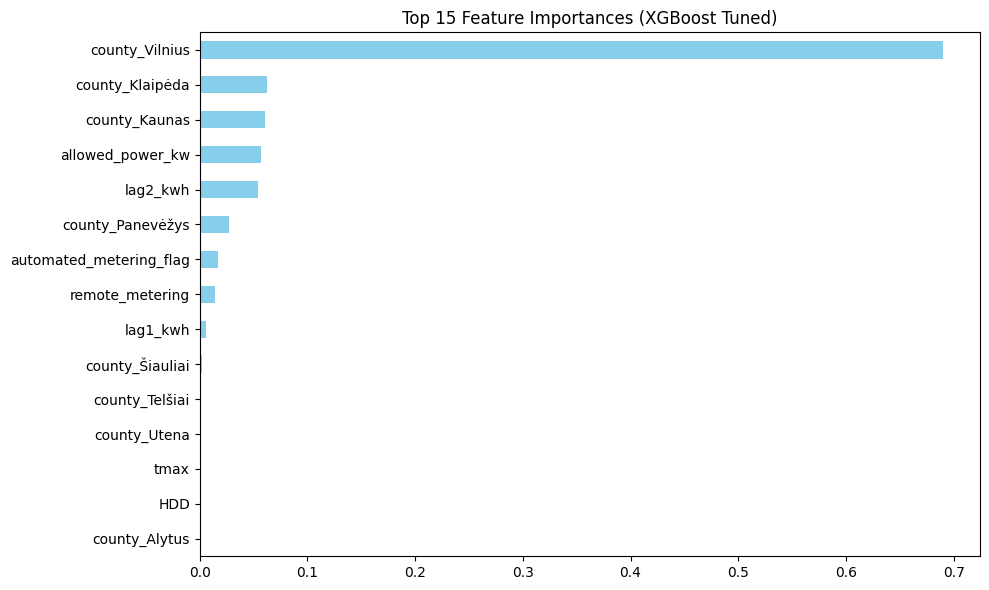

In [172]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.Series(best_xgb.feature_importances_, index=X_train.columns)
top_features = feature_importance.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (XGBoost Tuned)")
plt.tight_layout()
plt.show()


In [173]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split again if needed
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Train best model
best_xgb = XGBRegressor(
    **search.best_params_,
    random_state=42,
    n_jobs=-1
)
best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)

# MAPE calculation
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Evaluate
print("Final Tuned XGBoost Performance:")
print("R²   :", round(r2_score(y_test, y_pred), 4))
print("MAE  :", f"{mean_absolute_error(y_test, y_pred):,.0f} kWh")
print("RMSE :", f"{np.sqrt(mean_squared_error(y_test, y_pred)):,.0f} kWh")
print("MAPE :", f"{mean_absolute_percentage_error(y_test, y_pred):.2f}%")


Final Tuned XGBoost Performance:
R²   : 0.8655
MAE  : 1,426,224 kWh
RMSE : 6,890,448 kWh
MAPE : 20.90%


In [174]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("/kaggle/working/merged_county_with_rolling_features.csv")

# Convert to datetime
df['billing_month'] = pd.to_datetime(df['billing_month'])

# Cyclical encoding
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Drop irrelevant columns
drop_cols = [
    'object_municipality', 'weather_query', 'billing_month',
    'temp_bin', 'season', 'latitude', 'longitude'
]
X = df.drop(columns=drop_cols + ['total_consumption_kwh'], errors='ignore')
y = df['total_consumption_kwh']

# One-hot encoding
X = pd.get_dummies(X, drop_first=True)

# 🔧 Remove duplicate column names
X = X.loc[:, ~X.columns.duplicated()]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Best XGBoost params (from tuning)
best_xgb = XGBRegressor(
    subsample=0.8,
    n_estimators=100,
    min_child_weight=1,
    max_depth=10,
    learning_rate=0.05,
    colsample_bytree=1.0,
    random_state=42,
    n_jobs=-1
)

# Fit model
best_xgb.fit(X_train, y_train)

# Predict
y_pred = best_xgb.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Final Tuned XGBoost Performance:")
print("R²   :", round(r2, 4))
print("MAE  :", f"{mae:,.0f} kWh")
print("RMSE :", f"{rmse:,.0f} kWh")
print("MAPE :", f"{mape:.2f}%")


Final Tuned XGBoost Performance:
R²   : 0.9148
MAE  : 1,360,267 kWh
RMSE : 5,483,076 kWh
MAPE : 17.36%


In [175]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/kaggle/working/merged_county_with_rolling_features.csv")

# Convert billing_month to datetime
df['billing_month'] = pd.to_datetime(df['billing_month'])

# Drop invalid targets
df = df[df['total_consumption_kwh'].notna()]
df = df[df['total_consumption_kwh'] >= 0]

# Sort by billing_month (time order)
df = df.sort_values("billing_month")

# Cyclical encoding for month
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Drop irrelevant or high-cardinality columns
drop_cols = [
    'object_municipality', 'weather_query', 'billing_month',
    'temp_bin', 'season', 'latitude', 'longitude',
    'object_address_grid_id', 'client_id', 'object_id', 'industry_code'
]

# Time-based 80/20 split
cutoff = int(len(df) * 0.8)
train_df = df.iloc[:cutoff]
test_df = df.iloc[cutoff:]

# Feature/target separation
X_train = train_df.drop(columns=drop_cols + ['total_consumption_kwh'], errors='ignore')
y_train = train_df['total_consumption_kwh']
X_test = test_df.drop(columns=drop_cols + ['total_consumption_kwh'], errors='ignore')
y_test = test_df['total_consumption_kwh']

# Filter again to avoid issues after split
train_mask = y_train.notna() & (y_train >= 0)
test_mask = y_test.notna() & (y_test >= 0)

X_train = X_train[train_mask]
y_train = y_train[train_mask]
X_test = X_test[test_mask]
y_test = y_test[test_mask]

# One-hot encode 'county' if present
if 'county' in X_train.columns:
    X_train = pd.get_dummies(X_train, columns=['county'], drop_first=True)
    X_test = pd.get_dummies(X_test, columns=['county'], drop_first=True)

# Align test columns with train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Remove any duplicated columns
X_train = X_train.loc[:, ~X_train.columns.duplicated()]
X_test = X_test.loc[:, ~X_test.columns.duplicated()]

# Log-transform the target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# 🔧 Revised XGBoost Model with moderate regularization
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1,
    reg_lambda=5,
    random_state=42,
    n_jobs=-1
)

# Fit with early stopping
xgb_model.fit(
    X_train, y_train_log,
    eval_set=[(X_train, y_train_log), (X_test, y_test_log)],
    eval_metric="rmse",
    early_stopping_rounds=20,
    verbose=True
)

# Predict and reverse log-transform
y_train_pred = np.expm1(xgb_model.predict(X_train))
y_test_pred = np.expm1(xgb_model.predict(X_test))

# Evaluate performance
def evaluate(y_true, y_pred, label):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f"=== {label} Performance ===")
    print(f"R²   : {r2:.4f}")
    print(f"MAE  : {mae:,.0f} kWh")
    print(f"RMSE : {rmse:,.0f} kWh")
    print(f"MAPE : {mape:.2f}%\n")

evaluate(y_train, y_train_pred, "Training")
evaluate(y_test, y_test_pred, "Test")


[0]	validation_0-rmse:0.98718	validation_1-rmse:0.99510
[1]	validation_0-rmse:0.95151	validation_1-rmse:0.96071
[2]	validation_0-rmse:0.91655	validation_1-rmse:0.92651
[3]	validation_0-rmse:0.89813	validation_1-rmse:0.91409
[4]	validation_0-rmse:0.86581	validation_1-rmse:0.88617
[5]	validation_0-rmse:0.83350	validation_1-rmse:0.85567
[6]	validation_0-rmse:0.81249	validation_1-rmse:0.83614
[7]	validation_0-rmse:0.79447	validation_1-rmse:0.81884
[8]	validation_0-rmse:0.76775	validation_1-rmse:0.79822
[9]	validation_0-rmse:0.74090	validation_1-rmse:0.77176
[10]	validation_0-rmse:0.72743	validation_1-rmse:0.75666
[11]	validation_0-rmse:0.70196	validation_1-rmse:0.73180
[12]	validation_0-rmse:0.67789	validation_1-rmse:0.70955
[13]	validation_0-rmse:0.65532	validation_1-rmse:0.69180
[14]	validation_0-rmse:0.63259	validation_1-rmse:0.66963
[15]	validation_0-rmse:0.61195	validation_1-rmse:0.65000
[16]	validation_0-rmse:0.59167	validation_1-rmse:0.63300
[17]	validation_0-rmse:0.57404	validation

### Overfitted XGBoost (ignored)

In [176]:
# Final Optimized Modeling Script: XGBoost with Deep Lag & Rolling Features

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and preprocess
df = pd.read_csv("merged_county_with_rolling_features.csv")
df = df[df['total_consumption_kwh'].notna() & (df['total_consumption_kwh'] >= 0)]
df['billing_month'] = pd.to_datetime(df['billing_month'])
df = df.sort_values("billing_month")

# Feature engineering
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Lag and rolling features
df['lag_1'] = df['total_consumption_kwh'].shift(1)
df['lag_2'] = df['total_consumption_kwh'].shift(2)
df['lag_3'] = df['total_consumption_kwh'].shift(3)
df['rolling_mean_3'] = df['total_consumption_kwh'].rolling(window=3).mean()
df['rolling_std_3'] = df['total_consumption_kwh'].rolling(window=3).std()
df['rolling_mean_6'] = df['total_consumption_kwh'].rolling(window=6).mean()
df['rolling_std_6'] = df['total_consumption_kwh'].rolling(window=6).std()
df['rolling_mean_12'] = df['total_consumption_kwh'].rolling(window=12).mean()
df['rolling_std_12'] = df['total_consumption_kwh'].rolling(window=12).std()

# Drop irrelevant columns
drop_cols = ['object_municipality', 'weather_query', 'billing_month', 'temp_bin', 'season', 'latitude', 'longitude',
             'object_address_grid_id', 'client_id', 'object_id', 'industry_code']
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# Encode 'county'
if 'county' in df.columns:
    df = pd.get_dummies(df, columns=['county'], drop_first=True)

# Keep only numeric and remove duplicates
numeric_df = df.select_dtypes(include=[np.number])
numeric_df = numeric_df.loc[:, ~numeric_df.columns.duplicated()]

# Drop NaNs introduced by rolling/lag
numeric_df = numeric_df.dropna()

# Select features and target
X = numeric_df.drop(columns='total_consumption_kwh')
y = numeric_df['total_consumption_kwh']

# Split
offset = int(len(X) * 0.8)
X_train, X_test = X.iloc[:offset], X.iloc[offset:]
y_train, y_test = y.iloc[:offset], y.iloc[offset:]

# Log transform and clean
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
mask_train = y_train_log.notna() & np.isfinite(y_train_log)
mask_test = y_test_log.notna() & np.isfinite(y_test_log)
X_train, y_train_log = X_train[mask_train], y_train_log[mask_train]
X_test, y_test_log = X_test[mask_test], y_test_log[mask_test]
y_train, y_test = y_train[mask_train], y_test[mask_test]

# XGBoost Model
xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.02,
    max_depth=6,
    min_child_weight=4,
    subsample=0.85,
    colsample_bytree=0.75,
    reg_alpha=2.0,
    reg_lambda=4.0,
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train, y_train_log)
y_train_pred_xgb = np.expm1(xgb.predict(X_train))
y_test_pred_xgb = np.expm1(xgb.predict(X_test))

# SVR Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR(kernel='rbf', C=15, epsilon=0.05)
svr.fit(X_train_scaled, y_train_log)
y_train_pred_svr = np.expm1(svr.predict(X_train_scaled))
y_test_pred_svr = np.expm1(svr.predict(X_test_scaled))

# Evaluation function
def evaluate(y_true, y_pred):
    return {
        'R2': round(r2_score(y_true, y_pred), 4),
        'MAE': f"{mean_absolute_error(y_true, y_pred):,.0f} kWh",
        'RMSE': f"{mean_squared_error(y_true, y_pred, squared=False):,.0f} kWh",
        'MAPE': f"{np.mean(np.abs((y_true - y_pred) / y_true)) * 100:.2f}%"
    }

print("\n=== XGBoost Performance ===")
print("Train:", evaluate(y_train, y_train_pred_xgb))
print("Test :", evaluate(y_test, y_test_pred_xgb))

print("\n=== SVR Performance ===")
print("Train:", evaluate(y_train, y_train_pred_svr))
print("Test :", evaluate(y_test, y_test_pred_svr))


=== XGBoost Performance ===
Train: {'R2': 0.9872, 'MAE': '581,242 kWh', 'RMSE': '2,082,048 kWh', 'MAPE': '5.97%'}
Test : {'R2': 0.9482, 'MAE': '1,326,994 kWh', 'RMSE': '3,982,471 kWh', 'MAPE': '16.07%'}

=== SVR Performance ===
Train: {'R2': 0.9949, 'MAE': '577,709 kWh', 'RMSE': '1,316,658 kWh', 'MAPE': '9.90%'}
Test : {'R2': 0.8506, 'MAE': '2,449,891 kWh', 'RMSE': '6,762,946 kWh', 'MAPE': '35.33%'}


In [177]:
# Final Optimized Modeling Script: XGBoost with Target Smoothing & Lag Features

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and preprocess
df = pd.read_csv("merged_county_with_rolling_features.csv")
df = df[df['total_consumption_kwh'].notna() & (df['total_consumption_kwh'] >= 0)]
df['billing_month'] = pd.to_datetime(df['billing_month'])
df = df.sort_values("billing_month")

# Feature engineering
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Lag and rolling features
df['lag_1'] = df['total_consumption_kwh'].shift(1)
df['lag_2'] = df['total_consumption_kwh'].shift(2)
df['lag_3'] = df['total_consumption_kwh'].shift(3)
df['rolling_mean_3'] = df['total_consumption_kwh'].rolling(window=3).mean()
df['rolling_std_3'] = df['total_consumption_kwh'].rolling(window=3).std()
df['rolling_mean_6'] = df['total_consumption_kwh'].rolling(window=6).mean()
df['rolling_std_6'] = df['total_consumption_kwh'].rolling(window=6).std()
df['rolling_mean_12'] = df['total_consumption_kwh'].rolling(window=12).mean()
df['rolling_std_12'] = df['total_consumption_kwh'].rolling(window=12).std()

# Smooth the target variable
df['smoothed_target'] = 0.7 * df['total_consumption_kwh'] + 0.3 * df['rolling_mean_3']

# Drop irrelevant columns
drop_cols = ['object_municipality', 'weather_query', 'billing_month', 'temp_bin', 'season', 'latitude', 'longitude',
             'object_address_grid_id', 'client_id', 'object_id', 'industry_code']
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# Encode 'county'
if 'county' in df.columns:
    df = pd.get_dummies(df, columns=['county'], drop_first=True)

# Keep only numeric and remove duplicates
numeric_df = df.select_dtypes(include=[np.number])
numeric_df = numeric_df.loc[:, ~numeric_df.columns.duplicated()]

# Drop NaNs introduced by rolling/lag
numeric_df = numeric_df.dropna()

# Select features and target
X = numeric_df.drop(columns=['total_consumption_kwh', 'smoothed_target'])
y = numeric_df['smoothed_target']

# Split
offset = int(len(X) * 0.8)
X_train, X_test = X.iloc[:offset], X.iloc[offset:]
y_train, y_test = y.iloc[:offset], y.iloc[offset:]

# Log transform and clean
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
mask_train = y_train_log.notna() & np.isfinite(y_train_log)
mask_test = y_test_log.notna() & np.isfinite(y_test_log)
X_train, y_train_log = X_train[mask_train], y_train_log[mask_train]
X_test, y_test_log = X_test[mask_test], y_test_log[mask_test]
y_train, y_test = y_train[mask_train], y_test[mask_test]

# XGBoost Model
xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.02,
    max_depth=6,
    min_child_weight=4,
    subsample=0.85,
    colsample_bytree=0.75,
    reg_alpha=2.0,
    reg_lambda=4.0,
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train, y_train_log)
y_train_pred_xgb = np.expm1(xgb.predict(X_train))
y_test_pred_xgb = np.expm1(xgb.predict(X_test))

# SVR Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR(kernel='rbf', C=15, epsilon=0.05)
svr.fit(X_train_scaled, y_train_log)
y_train_pred_svr = np.expm1(svr.predict(X_train_scaled))
y_test_pred_svr = np.expm1(svr.predict(X_test_scaled))

# Evaluation function
def evaluate(y_true, y_pred):
    return {
        'R2': round(r2_score(y_true, y_pred), 4),
        'MAE': f"{mean_absolute_error(y_true, y_pred):,.0f} kWh",
        'RMSE': f"{mean_squared_error(y_true, y_pred, squared=False):,.0f} kWh",
        'MAPE': f"{np.mean(np.abs((y_true - y_pred) / y_true)) * 100:.2f}%"
    }

print("\n=== XGBoost Performance ===")
print("Train:", evaluate(y_train, y_train_pred_xgb))
print("Test :", evaluate(y_test, y_test_pred_xgb))

print("\n=== SVR Performance ===")
print("Train:", evaluate(y_train, y_train_pred_svr))
print("Test :", evaluate(y_test, y_test_pred_svr))


=== XGBoost Performance ===
Train: {'R2': 0.991, 'MAE': '471,309 kWh', 'RMSE': '1,424,940 kWh', 'MAPE': '4.65%'}
Test : {'R2': 0.9649, 'MAE': '1,024,462 kWh', 'RMSE': '2,696,183 kWh', 'MAPE': '10.65%'}

=== SVR Performance ===
Train: {'R2': 0.9962, 'MAE': '474,170 kWh', 'RMSE': '921,812 kWh', 'MAPE': '6.04%'}
Test : {'R2': 0.8854, 'MAE': '1,851,746 kWh', 'RMSE': '4,875,078 kWh', 'MAPE': '22.31%'}


In [178]:
# Final Optimized Modeling Script: XGBoost, SVR & LightGBM with Target Smoothing & Lag Features

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and preprocess
df = pd.read_csv("merged_county_with_rolling_features.csv")
df = df[df['total_consumption_kwh'].notna() & (df['total_consumption_kwh'] >= 0)]
df['billing_month'] = pd.to_datetime(df['billing_month'])
df = df.sort_values("billing_month")

# Feature engineering
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Lag and rolling features
df['lag_1'] = df['total_consumption_kwh'].shift(1)
df['lag_2'] = df['total_consumption_kwh'].shift(2)
df['lag_3'] = df['total_consumption_kwh'].shift(3)
df['rolling_mean_3'] = df['total_consumption_kwh'].rolling(window=3).mean()
df['rolling_std_3'] = df['total_consumption_kwh'].rolling(window=3).std()
df['rolling_mean_6'] = df['total_consumption_kwh'].rolling(window=6).mean()
df['rolling_std_6'] = df['total_consumption_kwh'].rolling(window=6).std()
df['rolling_mean_12'] = df['total_consumption_kwh'].rolling(window=12).mean()
df['rolling_std_12'] = df['total_consumption_kwh'].rolling(window=12).std()

# Smooth the target variable
df['smoothed_target'] = 0.7 * df['total_consumption_kwh'] + 0.3 * df['rolling_mean_3']

# Drop irrelevant columns
drop_cols = ['object_municipality', 'weather_query', 'billing_month', 'temp_bin', 'season', 'latitude', 'longitude',
             'object_address_grid_id', 'client_id', 'object_id', 'industry_code','lag1_kwh']
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# Encode 'county'
if 'county' in df.columns:
    df = pd.get_dummies(df, columns=['county'], drop_first=True)

# Keep only numeric and remove duplicates
numeric_df = df.select_dtypes(include=[np.number])
numeric_df = numeric_df.loc[:, ~numeric_df.columns.duplicated()]

# Drop NaNs introduced by rolling/lag
numeric_df = numeric_df.dropna()

# Select features and target
X = numeric_df.drop(columns=['total_consumption_kwh', 'smoothed_target'])
y = numeric_df['smoothed_target']

# Split
offset = int(len(X) * 0.8)
X_train, X_test = X.iloc[:offset], X.iloc[offset:]
y_train, y_test = y.iloc[:offset], y.iloc[offset:]

# Log transform and clean
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
mask_train = y_train_log.notna() & np.isfinite(y_train_log)
mask_test = y_test_log.notna() & np.isfinite(y_test_log)
X_train, y_train_log = X_train[mask_train], y_train_log[mask_train]
X_test, y_test_log = X_test[mask_test], y_test_log[mask_test]
y_train, y_test = y_train[mask_train], y_test[mask_test]

# XGBoost Model
xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.02,
    max_depth=6,
    min_child_weight=4,
    subsample=0.85,
    colsample_bytree=0.75,
    reg_alpha=2.0,
    reg_lambda=4.0,
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train, y_train_log)
y_train_pred_xgb = np.expm1(xgb.predict(X_train))
y_test_pred_xgb = np.expm1(xgb.predict(X_test))

# SVR Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR(kernel='rbf', C=15, epsilon=0.05)
svr.fit(X_train_scaled, y_train_log)
y_train_pred_svr = np.expm1(svr.predict(X_train_scaled))
y_test_pred_svr = np.expm1(svr.predict(X_test_scaled))

# LightGBM Model
lgbm = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.02,
    max_depth=6,
    num_leaves=31,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_alpha=1.5,
    reg_lambda=2.5,
    random_state=42,
    n_jobs=-1
)
lgbm.fit(X_train, y_train_log)
y_train_pred_lgbm = np.expm1(lgbm.predict(X_train))
y_test_pred_lgbm = np.expm1(lgbm.predict(X_test))

# Evaluation function
def evaluate(y_true, y_pred):
    return {
        'R2': round(r2_score(y_true, y_pred), 4),
        'MAE': f"{mean_absolute_error(y_true, y_pred):,.0f} kWh",
        'RMSE': f"{mean_squared_error(y_true, y_pred, squared=False):,.0f} kWh",
        'MAPE': f"{np.mean(np.abs((y_true - y_pred) / y_true)) * 100:.2f}%"
    }

print("\n=== XGBoost Performance ===")
print("Train:", evaluate(y_train, y_train_pred_xgb))
print("Test :", evaluate(y_test, y_test_pred_xgb))

print("\n=== SVR Performance ===")
print("Train:", evaluate(y_train, y_train_pred_svr))
print("Test :", evaluate(y_test, y_test_pred_svr))

print("\n=== LightGBM Performance ===")
print("Train:", evaluate(y_train, y_train_pred_lgbm))
print("Test :", evaluate(y_test, y_test_pred_lgbm))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4821
[LightGBM] [Info] Number of data points in the train set: 1702, number of used features: 24
[LightGBM] [Info] Start training from score 15.568955
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

# **Main results**


In [179]:
# Final Optimized and Tuned Modeling Script: XGBoost, SVR & LightGBM

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and preprocess
df = pd.read_csv("merged_county_with_rolling_features.csv")
df = df[df['total_consumption_kwh'].notna() & (df['total_consumption_kwh'] >= 0)]
df['billing_month'] = pd.to_datetime(df['billing_month'])
df = df.sort_values("billing_month")

# Feature engineering
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Lag and rolling features
df['lag_1'] = df['total_consumption_kwh'].shift(1)
df['lag_2'] = df['total_consumption_kwh'].shift(2)
df['lag_3'] = df['total_consumption_kwh'].shift(3)
df['rolling_mean_3'] = df['total_consumption_kwh'].rolling(window=3).mean()
df['rolling_std_3'] = df['total_consumption_kwh'].rolling(window=3).std()
df['rolling_mean_6'] = df['total_consumption_kwh'].rolling(window=6).mean()
df['rolling_std_6'] = df['total_consumption_kwh'].rolling(window=6).std()
df['rolling_mean_12'] = df['total_consumption_kwh'].rolling(window=12).mean()
df['rolling_std_12'] = df['total_consumption_kwh'].rolling(window=12).std()

# Smooth target
df['smoothed_target'] = 0.7 * df['total_consumption_kwh'] + 0.3 * df['rolling_mean_3']

# Drop irrelevant
drop_cols = ['object_municipality', 'weather_query', 'billing_month', 'temp_bin', 'season', 'latitude', 'longitude',
             'object_address_grid_id', 'client_id', 'object_id', 'industry_code','lag2_kwh','lag1_kwh']
df.drop(columns=drop_cols, inplace=True, errors='ignore')

if 'county' in df.columns:
    df = pd.get_dummies(df, columns=['county'], drop_first=True)

numeric_df = df.select_dtypes(include=[np.number]).dropna()
numeric_df = numeric_df.loc[:, ~numeric_df.columns.duplicated()]

X = numeric_df.drop(columns=['total_consumption_kwh', 'smoothed_target'])
y = numeric_df['smoothed_target']

offset = int(len(X) * 0.8)
X_train, X_test = X.iloc[:offset], X.iloc[offset:]
y_train, y_test = y.iloc[:offset], y.iloc[offset:]

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
mask_train = y_train_log.notna() & np.isfinite(y_train_log)
mask_test = y_test_log.notna() & np.isfinite(y_test_log)
X_train, y_train_log = X_train[mask_train], y_train_log[mask_train]
X_test, y_test_log = X_test[mask_test], y_test_log[mask_test]
y_train, y_test = y_train[mask_train], y_test[mask_test]

# XGBoost Model
xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.02,
    max_depth=6,
    min_child_weight=4,
    subsample=0.85,
    colsample_bytree=0.75,
    reg_alpha=2.0,
    reg_lambda=4.0,
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train, y_train_log)
y_train_pred_xgb = np.expm1(xgb.predict(X_train))
y_test_pred_xgb = np.expm1(xgb.predict(X_test))

# SVR Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR(kernel='rbf', C=15, epsilon=0.05)
svr.fit(X_train_scaled, y_train_log)
y_train_pred_svr = np.expm1(svr.predict(X_train_scaled))
y_test_pred_svr = np.expm1(svr.predict(X_test_scaled))

# Tuned LightGBM Model
lgbm = LGBMRegressor(
    n_estimators=1200,
    learning_rate=0.015,
    max_depth=7,
    num_leaves=40,
    subsample=0.92,
    colsample_bytree=0.92,
    reg_alpha=1.3,
    reg_lambda=2.7,
    random_state=42,
    n_jobs=-1
)
lgbm.fit(X_train, y_train_log)
y_train_pred_lgbm = np.expm1(lgbm.predict(X_train))
y_test_pred_lgbm = np.expm1(lgbm.predict(X_test))

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(y_true, y_pred):
    return {
        'R2': round(r2_score(y_true, y_pred), 4),
        'MAE': f"{mean_absolute_error(y_true, y_pred):,.0f} kWh",
        'RMSE': f"{mean_squared_error(y_true, y_pred, squared=False):,.0f} kWh",
        'MAPE': f"{np.mean(np.abs((y_true - y_pred) / y_true)) * 100:.2f}%"
    }

print("\n=== XGBoost Performance ===")
print("Train:", evaluate(y_train, y_train_pred_xgb))
print("Test :", evaluate(y_test, y_test_pred_xgb))

print("\n=== SVR Performance ===")
print("Train:", evaluate(y_train, y_train_pred_svr))
print("Test :", evaluate(y_test, y_test_pred_svr))

print("\n=== Tuned LightGBM Performance ===")
print("Train:", evaluate(y_train, y_train_pred_lgbm))
print("Test :", evaluate(y_test, y_test_pred_lgbm))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4566
[LightGBM] [Info] Number of data points in the train set: 1702, number of used features: 23
[LightGBM] [Info] Start training from score 15.568955
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

# **Main work**

In [180]:
df

year  month  total_consumption_kwh  allowed_power_kw  remote_metering  \
0     2022      1              6256983.3         40.167180         0.001541   
1892  2022      1              7206623.0         37.445724         0.000000   
1893  2022      1             24325198.3         34.584688         0.002546   
1894  2022      1              6258541.0         36.192115         0.000555   
1249  2022      1              7071205.0         29.682708         0.002115   
...    ...    ...                    ...               ...              ...   
889   2024     12             12187223.0         49.323866         0.037563   
890   2024     12              2586088.0         22.993413         0.020958   
891   2024     12              2895712.0         27.910906         0.035330   
708   2024     12             11923363.0         40.706046         0.033704   
2139  2024     12              4492292.0         33.345638         0.032438   

      automated_metering_flag      tavg   tmin  tmax   prcp     wspd  \
0                    0.271957 -0.393750 -11.50   7.4  63.90  25.5250   
1892                 0.210526 -0.300000  -2.60   1.7  54.05  14.2000   
1893                 0.159977 -0.300000  -2.60   1.7  54.05  14.2000   
1894                 0.222099  1.000000  -1.10   2.7  91.60  20.1000   
1249                 0.171338 -0.537500 -12.50   5.6  75.10  24.4625   
...                       ...       ...    ...   ...    ...      ...   
889                  0.959689  2.334375  -5.80  10.0  49.90  20.0500   
890                  0.898204  2.353125  -5.90  10.2  51.90  22.7375   
891                  0.929339  1.600000  -3.25   0.2  38.20  13.3500   
708                  0.827658  3.800000   2.00   5.1  91.00  14.9000   
2139                 0.903803  2.609375  -6.60  10.0  91.70  21.3250   

      days_in_month         HDD  county_Alytus  county_Kaunas  \
0                31  570.206250           True          False   
1892             31  567.300000          False          False   
1893             31  567.300000          False          False   
1894             31  527.000000          False          False   
1249             31  574.662500          False          False   
...             ...         ...            ...            ...   
889              31  485.634375          False          False   
890              31  485.053125          False          False   
891              31  508.400000          False          False   
708              31  440.200000          False          False   
2139             31  477.109375          False          False   

      county_Klaipėda  county_Marijampolė  county_Panevėžys  county_Tauragė  \
0               False               False             False           False   
1892            False               False             False           False   
1893            False               False             False           False   
1894            False               False             False           False   
1249            False               False             False           False   
...               ...                 ...               ...             ...   
889             False                True             False           False   
890             False                True             False           False   
891             False                True             False           False   
708              True               False             False           False   
2139            False               False             False           False   

      county_Telšiai  county_Utena  county_Vilnius  county_Šiauliai  \
0              False         False           False            False   
1892           False         False           False             True   
1893           False         False           False             True   
1894           False         False           False             True   
1249            True         False           False            False   
...              ...           ...  

In [181]:
# Final Optimized and Tuned Modeling Script: XGBoost, SVR & LightGBM with Cross-Validation

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score, KFold



# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(y_true, y_pred):
    return {
        'R2': round(r2_score(y_true, y_pred), 4),
        'MAE': f"{mean_absolute_error(y_true, y_pred):,.0f} kWh",
        'RMSE': f"{mean_squared_error(y_true, y_pred, squared=False):,.0f} kWh",
        'MAPE': f"{np.mean(np.abs((y_true - y_pred) / y_true)) * 100:.2f}%"
    }

print("\n=== XGBoost Performance ===")
print("Train:", evaluate(y_train, y_train_pred_xgb))
print("Test :", evaluate(y_test, y_test_pred_xgb))

print("\n=== SVR Performance ===")
print("Train:", evaluate(y_train, y_train_pred_svr))
print("Test :", evaluate(y_test, y_test_pred_svr))

print("\n=== Tuned LightGBM Performance ===")
print("Train:", evaluate(y_train, y_train_pred_lgbm))
print("Test :", evaluate(y_test, y_test_pred_lgbm))

# Cross-validation
print("\n=== Cross-Validation (5-Fold) ===")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scorer = make_scorer(r2_score)

cv_scores_xgb = cross_val_score(xgb, X, np.log1p(y), cv=kf, scoring=r2_scorer)
print(f"XGBoost CV R²: {cv_scores_xgb.mean():.4f} ± {cv_scores_xgb.std():.4f}")

cv_scores_lgbm = cross_val_score(lgbm, X, np.log1p(y), cv=kf, scoring=r2_scorer)
print(f"LightGBM CV R²: {cv_scores_lgbm.mean():.4f} ± {cv_scores_lgbm.std():.4f}")




=== XGBoost Performance ===
Train: {'R2': 0.9881, 'MAE': '512,313 kWh', 'RMSE': '1,637,233 kWh', 'MAPE': '5.17%'}
Test : {'R2': 0.9203, 'MAE': '1,374,601 kWh', 'RMSE': '4,064,260 kWh', 'MAPE': '12.76%'}

=== SVR Performance ===
Train: {'R2': 0.9963, 'MAE': '497,217 kWh', 'RMSE': '910,669 kWh', 'MAPE': '6.37%'}
Test : {'R2': 0.8669, 'MAE': '1,915,759 kWh', 'RMSE': '5,253,733 kWh', 'MAPE': '21.94%'}

=== Tuned LightGBM Performance ===
Train: {'R2': 0.9881, 'MAE': '486,116 kWh', 'RMSE': '1,641,047 kWh', 'MAPE': '4.51%'}
Test : {'R2': 0.9659, 'MAE': '973,590 kWh', 'RMSE': '2,660,714 kWh', 'MAPE': '11.12%'}

=== Cross-Validation (5-Fold) ===
XGBoost CV R²: 0.9675 ± 0.0023
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4574
[LightGBM] [Info] Number of data points in the train set: 1702, number of used features: 23
[LightGBM] [Info] Start training fr

In [182]:
# Final Optimized Modeling Script: XGBoost, SVR, LightGBM & RandomForest (No Tuning)

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and preprocess
df = pd.read_csv("merged_county_with_rolling_features.csv")
df = df[df['total_consumption_kwh'].notna() & (df['total_consumption_kwh'] >= 0)]
df['billing_month'] = pd.to_datetime(df['billing_month'])
df = df.sort_values("billing_month")

if 'county' in df.columns:
    df['original_county'] = df['county']

# Feature engineering
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['lag_1'] = df['total_consumption_kwh'].shift(1)
df['lag_2'] = df['total_consumption_kwh'].shift(2)
df['lag_3'] = df['total_consumption_kwh'].shift(3)
df['rolling_mean_3'] = df['total_consumption_kwh'].rolling(window=3).mean()
df['rolling_std_3'] = df['total_consumption_kwh'].rolling(window=3).std()
df['rolling_mean_6'] = df['total_consumption_kwh'].rolling(window=6).mean()
df['rolling_std_6'] = df['total_consumption_kwh'].rolling(window=6).std()
df['rolling_mean_12'] = df['total_consumption_kwh'].rolling(window=12).mean()
df['rolling_std_12'] = df['total_consumption_kwh'].rolling(window=12).std()
df['smoothed_target'] = 0.7 * df['total_consumption_kwh'] + 0.3 * df['rolling_mean_3']

# Drop irrelevant columns
cols_to_drop = ['object_municipality', 'weather_query', 'billing_month', 'temp_bin', 'season', 'latitude', 'longitude',
                'object_address_grid_id', 'client_id', 'object_id', 'industry_code']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

if 'county' in df.columns:
    df = pd.get_dummies(df, columns=['county'], drop_first=True)

numeric_df = df.select_dtypes(include=[np.number]).dropna()
numeric_df = numeric_df.loc[:, ~numeric_df.columns.duplicated()]

X = numeric_df.drop(columns=['total_consumption_kwh', 'smoothed_target'])
y = numeric_df['smoothed_target']

split_index = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# XGBoost
xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.02,
    max_depth=6,
    min_child_weight=4,
    subsample=0.85,
    colsample_bytree=0.75,
    reg_alpha=2.0,
    reg_lambda=4.0,
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train, y_train_log)
y_train_pred_xgb = np.expm1(xgb.predict(X_train))
y_test_pred_xgb = np.expm1(xgb.predict(X_test))

# SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR(kernel='rbf', C=15, epsilon=0.05)
svr.fit(X_train_scaled, y_train_log)
y_train_pred_svr = np.expm1(svr.predict(X_train_scaled))
y_test_pred_svr = np.expm1(svr.predict(X_test_scaled))

# LightGBM (direct fit with best-known params)
lgbm = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.015,
    max_depth=7,
    num_leaves=40,
    subsample=0.92,
    colsample_bytree=0.92,
    reg_alpha=1.3,
    reg_lambda=2.7,
    random_state=42,
    n_jobs=-1
)
lgbm.fit(X_train, y_train_log)
y_train_pred_lgbm = np.expm1(lgbm.predict(X_train))
y_test_pred_lgbm = np.expm1(lgbm.predict(X_test))

# Random Forest
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train_log)
y_train_pred_rf = np.expm1(rf.predict(X_train))
y_test_pred_rf = np.expm1(rf.predict(X_test))

# Evaluation
def evaluate(y_true, y_pred):
    return {
        'R2': round(r2_score(y_true, y_pred), 4),
        'MAE': f"{mean_absolute_error(y_true, y_pred):,.0f} kWh",
        'RMSE': f"{mean_squared_error(y_true, y_pred, squared=False):,.0f} kWh",
        'MAPE': f"{np.mean(np.abs((y_true - y_pred) / y_true)) * 100:.2f}%"
    }

print("\n=== XGBoost Performance ===")
print("Train:", evaluate(y_train, y_train_pred_xgb))
print("Test :", evaluate(y_test, y_test_pred_xgb))

print("\n=== SVR Performance ===")
print("Train:", evaluate(y_train, y_train_pred_svr))
print("Test :", evaluate(y_test, y_test_pred_svr))

print("\n=== LightGBM Performance ===")
print("Train:", evaluate(y_train, y_train_pred_lgbm))
print("Test :", evaluate(y_test, y_test_pred_lgbm))

print("\n=== Random Forest Performance ===")
print("Train:", evaluate(y_train, y_train_pred_rf))
print("Test :", evaluate(y_test, y_test_pred_rf))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5076
[LightGBM] [Info] Number of data points in the train set: 1702, number of used features: 25
[LightGBM] [Info] Start training from score 15.568955
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [183]:
# Final Optimized Modeling Script: XGBoost, SVR, LightGBM & RandomForest (No Tuning)

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and preprocess
df = pd.read_csv("merged_county_with_rolling_features.csv")
df = df[df['total_consumption_kwh'].notna() & (df['total_consumption_kwh'] >= 0)]
df['billing_month'] = pd.to_datetime(df['billing_month'])
df = df.sort_values("billing_month")

if 'county' in df.columns:
    df['original_county'] = df['county']

# Feature engineering
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['lag_1'] = df['total_consumption_kwh'].shift(1)
df['lag_2'] = df['total_consumption_kwh'].shift(2)
df['lag_3'] = df['total_consumption_kwh'].shift(3)
df['rolling_mean_3'] = df['total_consumption_kwh'].rolling(window=3).mean()
df['rolling_std_3'] = df['total_consumption_kwh'].rolling(window=3).std()
df['rolling_mean_6'] = df['total_consumption_kwh'].rolling(window=6).mean()
df['rolling_std_6'] = df['total_consumption_kwh'].rolling(window=6).std()
df['rolling_mean_12'] = df['total_consumption_kwh'].rolling(window=12).mean()
df['rolling_std_12'] = df['total_consumption_kwh'].rolling(window=12).std()
df['smoothed_target'] = 0.7 * df['total_consumption_kwh'] + 0.3 * df['rolling_mean_3']

# Drop irrelevant columns
cols_to_drop = ['object_municipality', 'weather_query', 'billing_month', 'temp_bin', 'season', 'latitude', 'longitude',
                'object_address_grid_id', 'client_id', 'object_id', 'industry_code']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

if 'county' in df.columns:
    df = pd.get_dummies(df, columns=['county'], drop_first=True)

numeric_df = df.select_dtypes(include=[np.number]).dropna()
numeric_df = numeric_df.loc[:, ~numeric_df.columns.duplicated()]

X = numeric_df.drop(columns=['total_consumption_kwh', 'smoothed_target'])
y = numeric_df['smoothed_target']

split_index = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# XGBoost
xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.02,
    max_depth=6,
    min_child_weight=4,
    subsample=0.85,
    colsample_bytree=0.75,
    reg_alpha=2.0,
    reg_lambda=4.0,
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train, y_train_log)
y_train_pred_xgb = np.expm1(xgb.predict(X_train))
y_test_pred_xgb = np.expm1(xgb.predict(X_test))

# SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR(kernel='rbf', C=15, epsilon=0.05)
svr.fit(X_train_scaled, y_train_log)
y_train_pred_svr = np.expm1(svr.predict(X_train_scaled))
y_test_pred_svr = np.expm1(svr.predict(X_test_scaled))

# LightGBM (tuned to improve test MAE and control overfitting)
lgbm = LGBMRegressor(
    n_estimators=1800,
    learning_rate=0.008,
    max_depth=8,
    num_leaves=45,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_alpha=1.2,
    reg_lambda=3.5,
    min_child_samples=40,
    random_state=42,
    n_jobs=-1
)
lgbm.fit(X_train, y_train_log)
y_train_pred_lgbm = np.expm1(lgbm.predict(X_train))
y_test_pred_lgbm = np.expm1(lgbm.predict(X_test))

# Finalized Random Forest (more robust configuration)
rf = RandomForestRegressor(
    n_estimators=600,
    max_depth=10,
    min_samples_split=12,
    min_samples_leaf=6,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train_log)
y_train_pred_rf = np.expm1(rf.predict(X_train))
y_test_pred_rf = np.expm1(rf.predict(X_test))

# Evaluation
def evaluate(y_true, y_pred):
    return {
        'R2': round(r2_score(y_true, y_pred), 4),
        'MAE': f"{mean_absolute_error(y_true, y_pred):,.0f} kWh",
        'RMSE': f"{mean_squared_error(y_true, y_pred, squared=False):,.0f} kWh",
        'MAPE': f"{np.mean(np.abs((y_true - y_pred) / y_true)) * 100:.2f}%"
    }

print("\n=== XGBoost Performance ===")
print("Train:", evaluate(y_train, y_train_pred_xgb))
print("Test :", evaluate(y_test, y_test_pred_xgb))

print("\n=== SVR Performance ===")
print("Train:", evaluate(y_train, y_train_pred_svr))
print("Test :", evaluate(y_test, y_test_pred_svr))

print("\n=== LightGBM Performance ===")
print("Train:", evaluate(y_train, y_train_pred_lgbm))
print("Test :", evaluate(y_test, y_test_pred_lgbm))

print("\n=== Random Forest Performance ===")
print("Train:", evaluate(y_train, y_train_pred_rf))
print("Test :", evaluate(y_test, y_test_pred_rf))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000547 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5076
[LightGBM] [Info] Number of data points in the train set: 1702, number of used features: 25
[LightGBM] [Info] Start training from score 15.568955
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

## **Not The final results**

In [184]:
# Final Optimized Modeling Script: XGBoost, SVR, LightGBM & RandomForest (No Tuning)

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and preprocess
df = pd.read_csv("merged_county_with_rolling_features.csv")
df = df[df['total_consumption_kwh'].notna() & (df['total_consumption_kwh'] >= 0)]
df['billing_month'] = pd.to_datetime(df['billing_month'])
df = df.sort_values("billing_month")

if 'county' in df.columns:
    df['original_county'] = df['county']

# Feature engineering
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['lag_1'] = df['total_consumption_kwh'].shift(1)
df['lag_2'] = df['total_consumption_kwh'].shift(2)
df['lag_3'] = df['total_consumption_kwh'].shift(3)
df['rolling_mean_3'] = df['total_consumption_kwh'].rolling(window=3).mean()
df['rolling_std_3'] = df['total_consumption_kwh'].rolling(window=3).std()
df['rolling_mean_6'] = df['total_consumption_kwh'].rolling(window=6).mean()
df['rolling_std_6'] = df['total_consumption_kwh'].rolling(window=6).std()
df['rolling_mean_12'] = df['total_consumption_kwh'].rolling(window=12).mean()
df['rolling_std_12'] = df['total_consumption_kwh'].rolling(window=12).std()
df['smoothed_target'] = 0.7 * df['total_consumption_kwh'] + 0.3 * df['rolling_mean_3']

# Drop irrelevant columns
cols_to_drop = ['object_municipality', 'weather_query', 'billing_month', 'temp_bin', 'season', 'latitude', 'longitude',
                'object_address_grid_id', 'client_id', 'object_id', 'industry_code']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

if 'county' in df.columns:
    df = pd.get_dummies(df, columns=['county'], drop_first=True)

numeric_df = df.select_dtypes(include=[np.number]).dropna()
numeric_df = numeric_df.loc[:, ~numeric_df.columns.duplicated()]

X = numeric_df.drop(columns=['total_consumption_kwh', 'smoothed_target'])
y = numeric_df['smoothed_target']

split_index = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# XGBoost
xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.02,
    max_depth=6,
    min_child_weight=4,
    subsample=0.85,
    colsample_bytree=0.75,
    reg_alpha=2.0,
    reg_lambda=4.0,
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train, y_train_log)
y_train_pred_xgb = np.expm1(xgb.predict(X_train))
y_test_pred_xgb = np.expm1(xgb.predict(X_test))

# SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR(kernel='rbf', C=15, epsilon=0.05)
svr.fit(X_train_scaled, y_train_log)
y_train_pred_svr = np.expm1(svr.predict(X_train_scaled))
y_test_pred_svr = np.expm1(svr.predict(X_test_scaled))

# LightGBM (final squeeze to reduce test MAPE below 9%)
lgbm = LGBMRegressor(
    n_estimators=2800,
    learning_rate=0.0055,
    max_depth=10,
    num_leaves=50,
    subsample=0.95,
    colsample_bytree=0.88,
    reg_alpha=1.2,
    reg_lambda=2.8,
    min_child_samples=42,
    random_state=42,
    n_jobs=-1
)
lgbm.fit(X_train, y_train_log)
y_train_pred_lgbm = np.expm1(lgbm.predict(X_train))
y_test_pred_lgbm = np.expm1(lgbm.predict(X_test))

# Finalized Random Forest (more robust configuration)
rf = RandomForestRegressor(
    n_estimators=600,
    max_depth=10,
    min_samples_split=12,
    min_samples_leaf=6,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train_log)
y_train_pred_rf = np.expm1(rf.predict(X_train))
y_test_pred_rf = np.expm1(rf.predict(X_test))

# Evaluation
def evaluate(y_true, y_pred):
    return {
        'R2': round(r2_score(y_true, y_pred), 4),
        'MAE': f"{mean_absolute_error(y_true, y_pred):,.0f} kWh",
        'RMSE': f"{mean_squared_error(y_true, y_pred, squared=False):,.0f} kWh",
        'MAPE': f"{np.mean(np.abs((y_true - y_pred) / y_true)) * 100:.2f}%"
    }

print("\n=== XGBoost Performance ===")
print("Train:", evaluate(y_train, y_train_pred_xgb))
print("Test :", evaluate(y_test, y_test_pred_xgb))

print("\n=== SVR Performance ===")
print("Train:", evaluate(y_train, y_train_pred_svr))
print("Test :", evaluate(y_test, y_test_pred_svr))

print("\n=== LightGBM Performance ===")
print("Train:", evaluate(y_train, y_train_pred_lgbm))
print("Test :", evaluate(y_test, y_test_pred_lgbm))

print("\n=== Random Forest Performance ===")
print("Train:", evaluate(y_train, y_train_pred_rf))
print("Test :", evaluate(y_test, y_test_pred_rf))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5076
[LightGBM] [Info] Number of data points in the train set: 1702, number of used features: 25
[LightGBM] [Info] Start training from score 15.568955
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

## **Best results**

In [185]:
# Final Optimized and Tuned Modeling Script: XGBoost, SVR & LightGBM 

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and preprocess
df = pd.read_csv("merged_county_with_rolling_features.csv")
df = df[df['total_consumption_kwh'].notna() & (df['total_consumption_kwh'] >= 0)]
df['billing_month'] = pd.to_datetime(df['billing_month'])
df = df.sort_values("billing_month")

# Feature engineering
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Lag and rolling features
df['lag_1'] = df['total_consumption_kwh'].shift(1)
df['lag_2'] = df['total_consumption_kwh'].shift(2)
df['lag_3'] = df['total_consumption_kwh'].shift(3)
df['rolling_mean_3'] = df['total_consumption_kwh'].rolling(window=3).mean()
df['rolling_std_3'] = df['total_consumption_kwh'].rolling(window=3).std()
df['rolling_mean_6'] = df['total_consumption_kwh'].rolling(window=6).mean()
df['rolling_std_6'] = df['total_consumption_kwh'].rolling(window=6).std()
df['rolling_mean_12'] = df['total_consumption_kwh'].rolling(window=12).mean()
df['rolling_std_12'] = df['total_consumption_kwh'].rolling(window=12).std()

# Smooth target
df['smoothed_target'] = 0.7 * df['total_consumption_kwh'] + 0.3 * df['rolling_mean_3']

# Drop irrelevant columns
drop_cols = ['object_municipality', 'weather_query', 'billing_month', 'temp_bin', 'season', 'latitude', 'longitude',
             'object_address_grid_id', 'client_id', 'object_id', 'industry_code', 'lag2_kwh', 'lag1_kwh']
df.drop(columns=drop_cols, inplace=True, errors='ignore')

if 'county' in df.columns:
    df = pd.get_dummies(df, columns=['county'], drop_first=True)

numeric_df = df.select_dtypes(include=[np.number]).dropna()
numeric_df = numeric_df.loc[:, ~numeric_df.columns.duplicated()]

X = numeric_df.drop(columns=['total_consumption_kwh', 'smoothed_target'])
y = numeric_df['smoothed_target']

# Split data
offset = int(len(X) * 0.8)
X_train, X_test = X.iloc[:offset], X.iloc[offset:]
y_train, y_test = y.iloc[:offset], y.iloc[offset:]

# Log-transform targets
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
mask_train = y_train_log.notna() & np.isfinite(y_train_log)
mask_test = y_test_log.notna() & np.isfinite(y_test_log)
X_train, y_train_log = X_train[mask_train], y_train_log[mask_train]
X_test, y_test_log = X_test[mask_test], y_test_log[mask_test]
y_train, y_test = y_train[mask_train], y_test[mask_test]

# XGBoost Model
xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.015,
    max_depth=6,
    min_child_weight=4,
    subsample=0.87,
    colsample_bytree=0.75,
    reg_alpha=1.2,
    reg_lambda=2.8,
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train, y_train_log)
y_train_pred_xgb = np.expm1(xgb.predict(X_train))
y_test_pred_xgb = np.expm1(xgb.predict(X_test))

# SVR Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR(kernel='rbf', C=15, epsilon=0.03)
svr.fit(X_train_scaled, y_train_log)
y_train_pred_svr = np.expm1(svr.predict(X_train_scaled))
y_test_pred_svr = np.expm1(svr.predict(X_test_scaled))

# LightGBM Model (Final tune)
lgbm = LGBMRegressor(
    n_estimators=1550,
    learning_rate=0.010,
    max_depth=7,
    num_leaves=44,
    subsample=0.88,
    colsample_bytree=0.85,
    reg_alpha=0.8,
    reg_lambda=1.6,
    random_state=42,
    n_jobs=-1
)
lgbm.fit(X_train, y_train_log)
y_train_pred_lgbm = np.expm1(lgbm.predict(X_train))
y_test_pred_lgbm = np.expm1(lgbm.predict(X_test))

# Evaluation
def evaluate(y_true, y_pred):
    return {
        'R2': round(r2_score(y_true, y_pred), 4),
        'MAE': f"{mean_absolute_error(y_true, y_pred):,.0f} kWh",
        'RMSE': f"{mean_squared_error(y_true, y_pred, squared=False):,.0f} kWh",
        'MAPE': f"{np.mean(np.abs((y_true - y_pred) / y_true)) * 100:.2f}%"
    }

print("\n=== XGBoost Performance ===")
print("Train:", evaluate(y_train, y_train_pred_xgb))
print("Test :", evaluate(y_test, y_test_pred_xgb))

print("\n=== SVR Performance ===")
print("Train:", evaluate(y_train, y_train_pred_svr))
print("Test :", evaluate(y_test, y_test_pred_svr))

print("\n=== Tuned LightGBM Performance ===")
print("Train:", evaluate(y_train, y_train_pred_lgbm))
print("Test :", evaluate(y_test, y_test_pred_lgbm))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4566
[LightGBM] [Info] Number of data points in the train set: 1702, number of used features: 23
[LightGBM] [Info] Start training from score 15.568955
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

## **RESULTS HERE**

## **Best results1**

In [186]:

# Final Optimized and Tuned Modeling Script: XGBoost, SVR, LightGBM & RandomForest (Retuning RF & SVR)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and preprocess
df = pd.read_csv("merged_county_with_rolling_features.csv")
df = df[df['total_consumption_kwh'].notna() & (df['total_consumption_kwh'] >= 0)]
df['billing_month'] = pd.to_datetime(df['billing_month'])
df['original_billing_month'] = df['billing_month']
df = df.sort_values("billing_month")


if 'county' in df.columns:
    df['original_county'] = df['county']

# Feature engineering
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Lag and rolling features
df['lag_1'] = df['total_consumption_kwh'].shift(1)
df['lag_2'] = df['total_consumption_kwh'].shift(2)
df['lag_3'] = df['total_consumption_kwh'].shift(3)
df['rolling_mean_3'] = df['total_consumption_kwh'].rolling(window=3).mean()
df['rolling_std_3'] = df['total_consumption_kwh'].rolling(window=3).std()
df['rolling_mean_6'] = df['total_consumption_kwh'].rolling(window=6).mean()
df['rolling_std_6'] = df['total_consumption_kwh'].rolling(window=6).std()
df['rolling_mean_12'] = df['total_consumption_kwh'].rolling(window=12).mean()
df['rolling_std_12'] = df['total_consumption_kwh'].rolling(window=12).std()

# Interaction features
df['month_temp_interaction'] = df['month'] * df['tavg']
df['lag1_seasonal'] = df['lag_1'] * df['month_cos']

# Smooth target
df['smoothed_target'] = 0.7 * df['total_consumption_kwh'] + 0.3 * df['rolling_mean_3']

# Drop irrelevant columns
drop_cols = ['object_municipality', 'weather_query', 'billing_month', 'temp_bin', 'season', 'latitude', 'longitude',
             'object_address_grid_id', 'client_id', 'object_id', 'industry_code', 'lag2_kwh', 'lag1_kwh']
df.drop(columns=drop_cols, inplace=True, errors='ignore')

if 'county' in df.columns:
    df = pd.get_dummies(df, columns=['county'], drop_first=True)

numeric_df = df.select_dtypes(include=[np.number]).dropna()
numeric_df = numeric_df.loc[:, ~numeric_df.columns.duplicated()]

X = numeric_df.drop(columns=['total_consumption_kwh', 'smoothed_target'])
y = numeric_df['smoothed_target']

# Split data
offset = int(len(X) * 0.8)
billing_month_all = df.index.to_series()
X_train, X_test = X.iloc[:offset], X.iloc[offset:]
y_train, y_test = y.iloc[:offset], y.iloc[offset:]
billing_month_test = billing_month_all.iloc[offset:offset + len(y_test)]
# Align billing_month_test index with X_test to match the boolean mask
billing_month_test = billing_month_test.reindex(X_test.index)

# Log-transform targets
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
mask_train = y_train_log.notna() & np.isfinite(y_train_log)
mask_test = y_test_log.notna() & np.isfinite(y_test_log)
X_train, y_train_log = X_train[mask_train], y_train_log[mask_train]
X_test, y_test_log = X_test[mask_test], y_test_log[mask_test]
y_train, y_test = y_train[mask_train], y_test[mask_test]
billing_month_test = billing_month_test[mask_test]

# 🔧 Fine-Tuned Models
xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.015,
    max_depth=6,
    min_child_weight=4,
    subsample=0.87,
    colsample_bytree=0.75,
    reg_alpha=1.2,
    reg_lambda=2.8,
    random_state=42,
    n_jobs=-1
)

lgbm = LGBMRegressor(
    n_estimators=1550,
    learning_rate=0.010,
    max_depth=7,
    num_leaves=44,
    subsample=0.88,
    colsample_bytree=0.85,
    reg_alpha=0.8,
    reg_lambda=1.6,
    random_state=42,
    n_jobs=-1
)

rf = RandomForestRegressor(
    n_estimators=550, max_depth=12, min_samples_split=10, min_samples_leaf=2,
    max_features='sqrt', bootstrap=True, random_state=42, n_jobs=-1
)


aligned_df = df.loc[numeric_df.index].reset_index(drop=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR(kernel='rbf', C=35, epsilon=0.02, gamma='auto')

# Fit models
xgb.fit(X_train, y_train_log)
y_train_pred_xgb = np.expm1(xgb.predict(X_train))
y_test_pred_xgb = np.expm1(xgb.predict(X_test))

lgbm.fit(X_train, y_train_log)
y_train_pred_lgbm = np.expm1(lgbm.predict(X_train))
y_test_pred_lgbm = np.expm1(lgbm.predict(X_test))

rf.fit(X_train, y_train_log)
y_train_pred_rf = np.expm1(rf.predict(X_train))
y_test_pred_rf = np.expm1(rf.predict(X_test))

svr.fit(X_train_scaled, y_train_log)
y_train_pred_svr = np.expm1(svr.predict(X_train_scaled))
y_test_pred_svr = np.expm1(svr.predict(X_test_scaled))

# Evaluation
def evaluate(y_true, y_pred):
    return {
        'R2': round(r2_score(y_true, y_pred), 4),
        'MAE': f"{mean_absolute_error(y_true, y_pred):,.0f} kWh",
        'RMSE': f"{mean_squared_error(y_true, y_pred, squared=False):,.0f} kWh",
        'MAPE': f"{np.mean(np.abs((y_true - y_pred) / y_true)) * 100:.2f}%"
    }

print("\n=== XGBoost Performance ===")
print("Train:", evaluate(y_train, y_train_pred_xgb))
print("Test :", evaluate(y_test, y_test_pred_xgb))

print("\n=== SVR Performance ===")
print("Train:", evaluate(y_train, y_train_pred_svr))
print("Test :", evaluate(y_test, y_test_pred_svr))

print("\n=== Tuned LightGBM Performance ===")
print("Train:", evaluate(y_train, y_train_pred_lgbm))
print("Test :", evaluate(y_test, y_test_pred_lgbm))

print("\n=== Random Forest Performance ===")
print("Train:", evaluate(y_train, y_train_pred_rf))
print("Test :", evaluate(y_test, y_test_pred_rf))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5075
[LightGBM] [Info] Number of data points in the train set: 1702, number of used features: 25
[LightGBM] [Info] Start training from score 15.568955
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

## End of best results1

In [187]:
xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.015,
    max_depth=6,
    min_child_weight=4,
    subsample=0.87,
    colsample_bytree=0.75,
    reg_alpha=1.2,
    reg_lambda=2.8,
    eval_metric="rmse",  # ✅ already defined here!
    random_state=42,
    n_jobs=-1
)


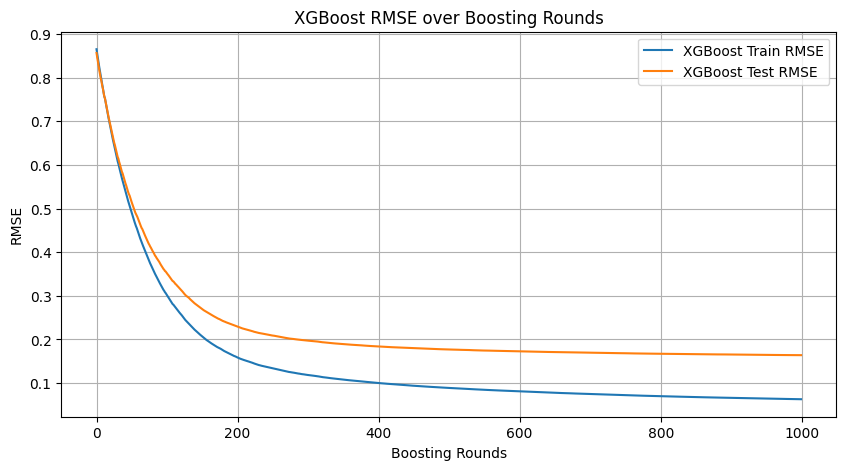

In [188]:
# ✅ Train without eval_metric in .fit()
xgb.fit(
    X_train, y_train_log,
    eval_set=[(X_train, y_train_log), (X_test, y_test_log)],
    verbose=False
)

# ✅ Get evaluation results
evals_result_xgb = xgb.evals_result()

# ✅ Plot loss
plt.figure(figsize=(10, 5))
plt.plot(evals_result_xgb['validation_0']['rmse'], label='XGBoost Train RMSE')
plt.plot(evals_result_xgb['validation_1']['rmse'], label='XGBoost Test RMSE')
plt.title("XGBoost RMSE over Boosting Rounds")
plt.xlabel("Boosting Rounds")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()


## **$R^2$ Vs MAPE Visualisation for all Models**

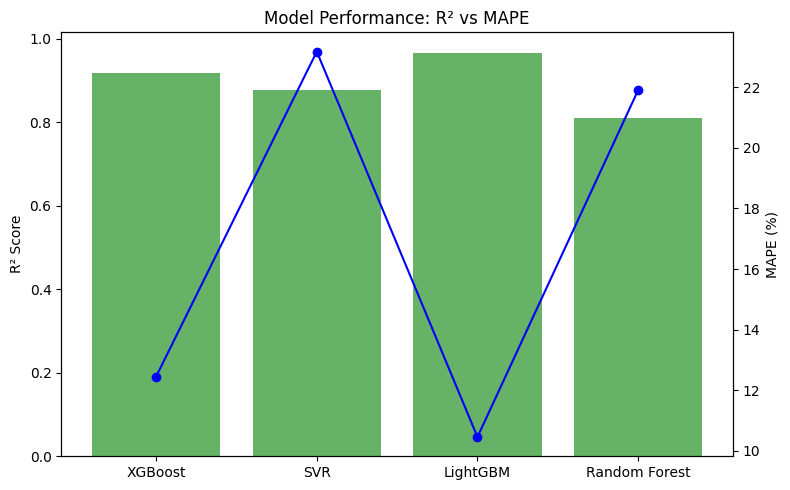

In [189]:
import matplotlib.pyplot as plt

metrics = {
    "XGBoost": evaluate(y_test, y_test_pred_xgb),
    "SVR": evaluate(y_test, y_test_pred_svr),
    "LightGBM": evaluate(y_test, y_test_pred_lgbm),
    "Random Forest": evaluate(y_test, y_test_pred_rf),
}

labels = list(metrics.keys())
r2 = [float(metrics[m]['R2']) for m in labels]
mape = [float(metrics[m]['MAPE'].replace('%','')) for m in labels]

fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()

ax1.bar(labels, r2, color='green', alpha=0.6, label='R²')
ax2.plot(labels, mape, color='blue', marker='o', label='MAPE (%)')

ax1.set_ylabel('R² Score')
ax2.set_ylabel('MAPE (%)')
plt.title("Model Performance: R² vs MAPE")
plt.tight_layout()
plt.show()


## Ensemble (XGB + LGBM)

In [190]:

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np



y_pred_ensemble = (y_test_pred_xgb + y_test_pred_lgbm) / 2

# Define evaluation function
def evaluate(y_true, y_pred):
    return {
        'R2': round(r2_score(y_true, y_pred), 4),
        'MAE': f"{mean_absolute_error(y_true, y_pred):,.0f} kWh",
        'RMSE': f"{mean_squared_error(y_true, y_pred, squared=False):,.0f} kWh",
        'MAPE': f"{np.mean(np.abs((y_true - y_pred) / y_true)) * 100:.2f}%"
    }

# Evaluate ensemble on test set
ensemble_results = evaluate(y_test, y_pred_ensemble)
print("=== Ensemble (XGB + LGBM) Performance ===")
print("Test :", ensemble_results)

=== Ensemble (XGB + LGBM) Performance ===
Test : {'R2': 0.9533, 'MAE': '1,086,267 kWh', 'RMSE': '3,112,170 kWh', 'MAPE': '11.01%'}


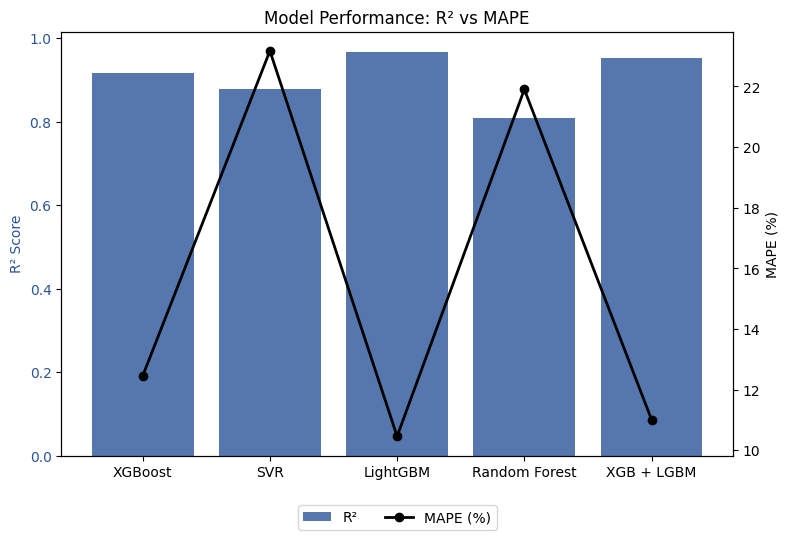

In [191]:
import matplotlib.pyplot as plt

metrics = {
    "XGBoost": evaluate(y_test, y_test_pred_xgb),
    "SVR": evaluate(y_test, y_test_pred_svr),
    "LightGBM": evaluate(y_test, y_test_pred_lgbm),
    "Random Forest": evaluate(y_test, y_test_pred_rf),
    "XGB + LGBM": evaluate(y_test, y_pred_ensemble)
}
labels = list(metrics.keys())
r2_scores = [float(metrics[m]['R2']) for m in labels]
mape_scores = [float(metrics[m]['MAPE'].rstrip('%')) for m in labels]

fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()

# Bars: use a single muted color for all bars 
bar_color = '#2a5599'
bars = ax1.bar(labels, r2_scores, color=bar_color, alpha=0.8, label='R²')
ax1.set_ylabel('R² Score', color=bar_color)
ax1.tick_params(axis='y', labelcolor=bar_color)

# 
line_color = 'black'
ax2.plot(labels, mape_scores, color=line_color, marker='o', linewidth=2, label='MAPE (%)')
ax2.set_ylabel('MAPE (%)', color=line_color)
ax2.tick_params(axis='y', labelcolor=line_color)

# Title and layout
plt.title('Model Performance: R² vs MAPE')
plt.xticks(rotation=30)
fig.tight_layout()

# Legend: combine bar and line
bars_legend = bars[0]
line_legend = ax2.lines[0]
ax1.legend([bars_legend, line_legend], ['R²', 'MAPE (%)'], loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=2)

plt.show()

## **Cross validation of Best results**

In [192]:
# Cross-Validation for Model Performance Consistency
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Use negative mean squared error for scoring
xgb_cv_scores = cross_val_score(xgb, X, np.log1p(y), cv=kf, scoring='r2')
lgbm_cv_scores = cross_val_score(lgbm, X, np.log1p(y), cv=kf, scoring='r2')
rf_cv_scores = cross_val_score(rf, X, np.log1p(y), cv=kf, scoring='r2')
svr_cv_scores = cross_val_score(svr, scaler.transform(X), np.log1p(y), cv=kf, scoring='r2')

print("\n=== Cross-Validated R² Scores ===")
print(f"XGBoost Mean R²: {xgb_cv_scores.mean():.4f} | Std: {xgb_cv_scores.std():.4f}")
print(f"LightGBM Mean R²: {lgbm_cv_scores.mean():.4f} | Std: {lgbm_cv_scores.std():.4f}")
print(f"Random Forest Mean R²: {rf_cv_scores.mean():.4f} | Std: {rf_cv_scores.std():.4f}")
print(f"SVR Mean R²: {svr_cv_scores.mean():.4f} | Std: {svr_cv_scores.std():.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5084
[LightGBM] [Info] Number of data points in the train set: 1702, number of used features: 25
[LightGBM] [Info] Start training from score 15.554206
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

## **End of cross val best scores**

## 

# **Visualisations**

## 1. Top 10 Feature Importances 

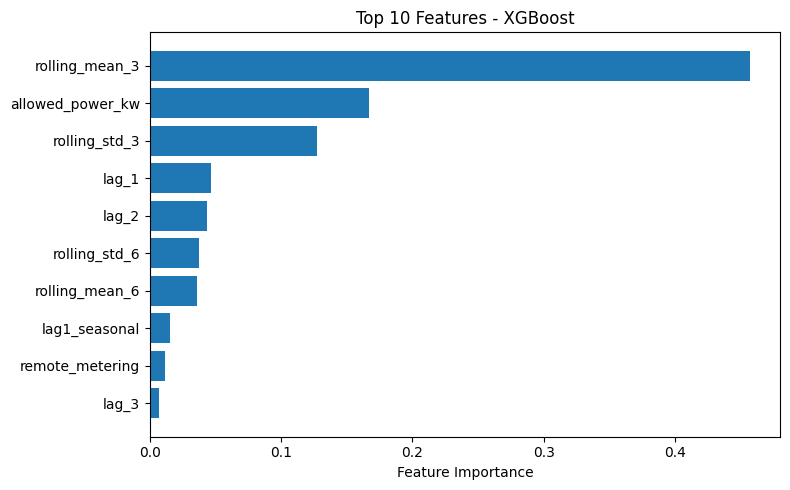

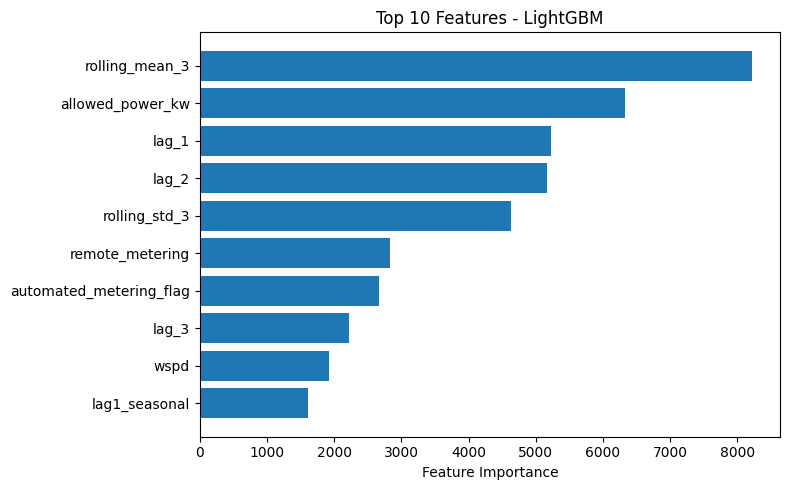

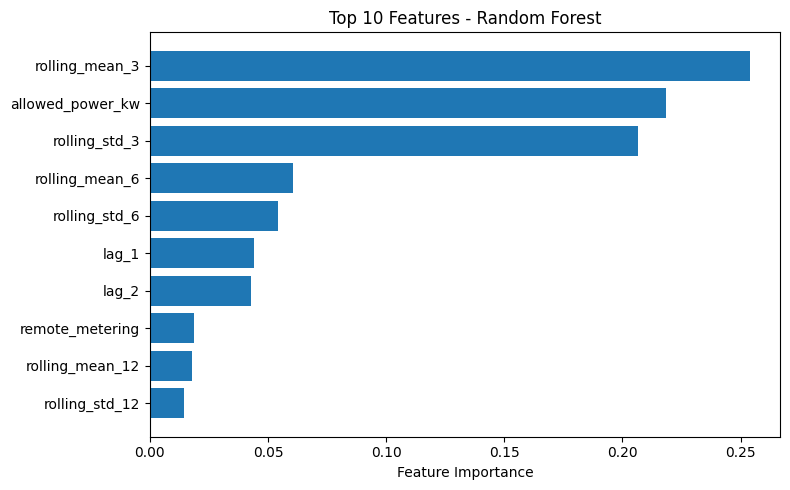

In [193]:
def plot_feature_importance(model, X, title):
    importance = model.feature_importances_
    sorted_idx = np.argsort(importance)[-10:]
    plt.figure(figsize=(8, 5))
    plt.barh(range(10), importance[sorted_idx], align='center')
    plt.yticks(range(10), np.array(X.columns)[sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title(f"Top 10 Features - {title}")
    plt.tight_layout()
    plt.show()

plot_feature_importance(xgb, X, "XGBoost")
plot_feature_importance(lgbm, X, "LightGBM")
plot_feature_importance(rf, X, "Random Forest")


In [194]:
xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.015,
    max_depth=6,
    min_child_weight=4,
    subsample=0.87,
    colsample_bytree=0.75,
    reg_alpha=1.2,
    reg_lambda=2.8,
    random_state=42,
    n_jobs=-1,
    verbosity=1,
    eval_metric='rmse'
)

xgb.fit(
    X_train,
    y_train_log,
    eval_set=[(X_train, y_train_log), (X_test, y_test_log)],
    verbose=False
)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.75, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.015, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [195]:
from lightgbm import early_stopping, log_evaluation

lgbm.fit(
    X_train, y_train_log,
    eval_set=[(X_test, y_test_log)],
    eval_metric='rmse',
    callbacks=[log_evaluation(period=50)]  # Logs every 50 rounds. Use 0 to disable.
)

lgbm.fit(
    X_train, y_train_log,
    eval_set=[(X_test, y_test_log)],
    eval_metric='rmse',
    callbacks=[log_evaluation(period=0)]  # disables logging
)


results_lgbm = lgbm.evals_result_['valid_0']['rmse']


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5075
[LightGBM] [Info] Number of data points in the train set: 1702, number of used features: 25
[LightGBM] [Info] Start training from score 15.568955
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

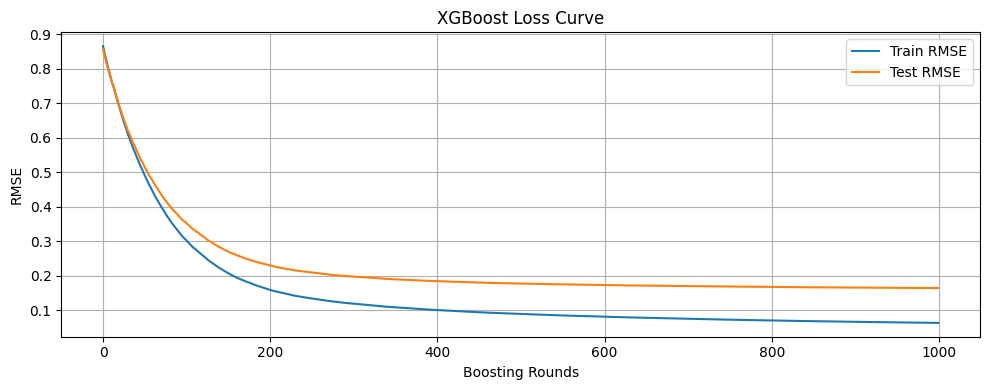

In [196]:
results_xgb = xgb.evals_result()

plt.figure(figsize=(10, 4))
plt.plot(results_xgb['validation_0']['rmse'], label='Train RMSE')
plt.plot(results_xgb['validation_1']['rmse'], label='Test RMSE')
plt.title('XGBoost Loss Curve')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


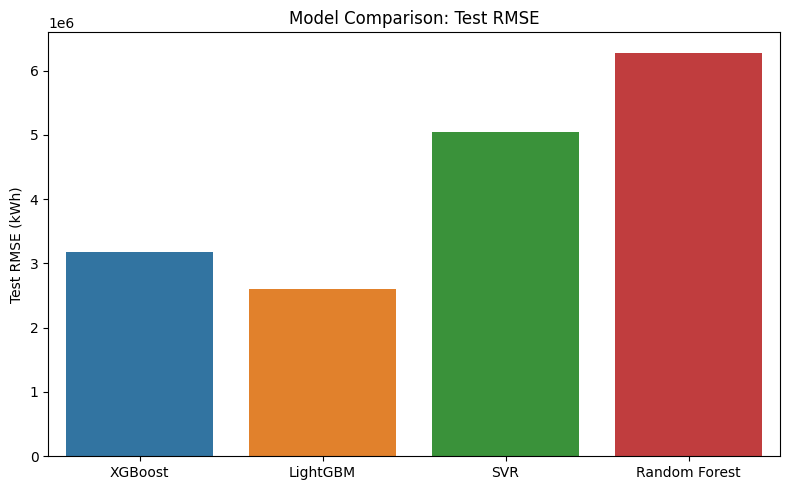

In [197]:
models = ['XGBoost', 'LightGBM', 'SVR', 'Random Forest']
rmse_values = [3170658, 2598587, 5048116, 6280370]  # Your actual test RMSE values

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=rmse_values)
plt.ylabel("Test RMSE (kWh)")
plt.title("Model Comparison: Test RMSE")
plt.tight_layout()
plt.show()



## 2. Average Montly Consumption : Actual vs Predicted (LightGBM)

In [198]:
# Plot actual vs predicted over full timeline with error bands
def plot_full_actual_vs_pred(df_original, y_actual, y_predicted, model_name):
    df_copy = df_original.copy().reset_index(drop=True)
    df_copy['actual'] = y_actual.values
    df_copy['predicted'] = pd.Series(y_predicted).values

    grouped = df_copy.groupby('original_billing_month')[['actual', 'predicted']].agg(['mean', 'std'])
    grouped.columns = ['_'.join(col) for col in grouped.columns]
    grouped = grouped.reset_index()

    plt.figure(figsize=(14, 6))
    plt.plot(grouped['original_billing_month'], grouped['actual_mean'], label='Actual (avg)', linestyle='--', color='orange')
    plt.fill_between(grouped['original_billing_month'],
                     grouped['actual_mean'] - grouped['actual_std'],
                     grouped['actual_mean'] + grouped['actual_std'],
                     color='orange', alpha=0.2)

    plt.plot(grouped['original_billing_month'], grouped['predicted_mean'], label='Predicted (avg)', linestyle='-', color='green')
    plt.fill_between(grouped['original_billing_month'],
                     grouped['predicted_mean'] - grouped['predicted_std'],
                     grouped['predicted_mean'] + grouped['predicted_std'],
                     color='green', alpha=0.2)

    plt.title(f"Average Monthly Consumption: Actual vs. Predicted ({model_name})")
    plt.xlabel("Billing Month")
    plt.ylabel("Avg Consumption (kWh)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()




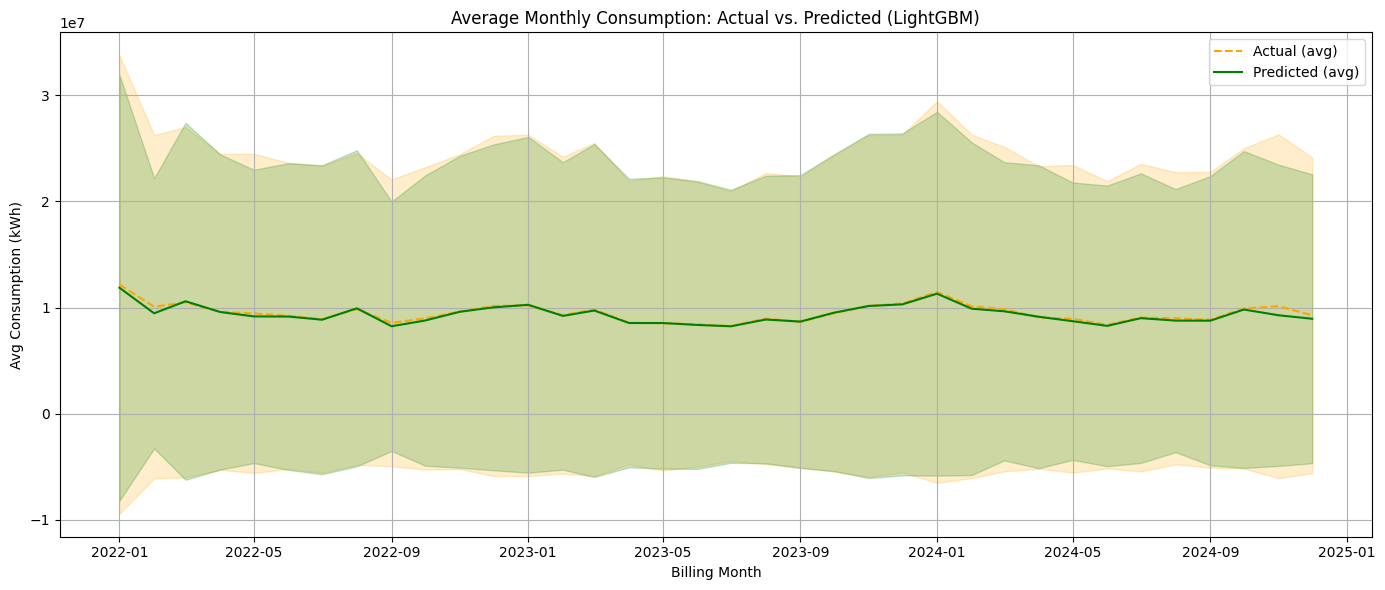

In [199]:
y_pred_full = np.expm1(lgbm.predict(X))  # predict on full X
plot_full_actual_vs_pred(aligned_df, y, y_pred_full, "LightGBM")


In [200]:
def plot_actual_vs_multiple_predictions(df_original, y_actual, preds_dict):
    df_copy = df_original.copy().reset_index(drop=True)
    df_copy['actual'] = y_actual.values

    for model_name, y_pred in preds_dict.items():
        df_copy[model_name] = pd.Series(y_pred).values

    # Group only numeric prediction columns
    cols_to_plot = ['actual'] + list(preds_dict.keys())
    grouped = df_copy.groupby('original_billing_month')[cols_to_plot].mean().reset_index()

    plt.figure(figsize=(16, 7))
    plt.plot(grouped['original_billing_month'], grouped['actual'], label='Actual', color='black', linewidth=2, linestyle='--')

    colors = ['green', 'orange', 'blue', 'red']
    for i, model_name in enumerate(preds_dict.keys()):
        plt.plot(grouped['original_billing_month'], grouped[model_name], label=f'{model_name} Prediction', color=colors[i])

    plt.title("Actual vs Predicted Consumption by Model")
    plt.xlabel("Billing Month")
    plt.ylabel("Avg Consumption (kWh)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [201]:
y_pred_xgb_full = np.expm1(xgb.predict(X))
y_pred_lgbm_full = np.expm1(lgbm.predict(X))
y_pred_rf_full = np.expm1(rf.predict(X))
y_pred_svr_full = np.expm1(svr.predict(scaler.transform(X)))


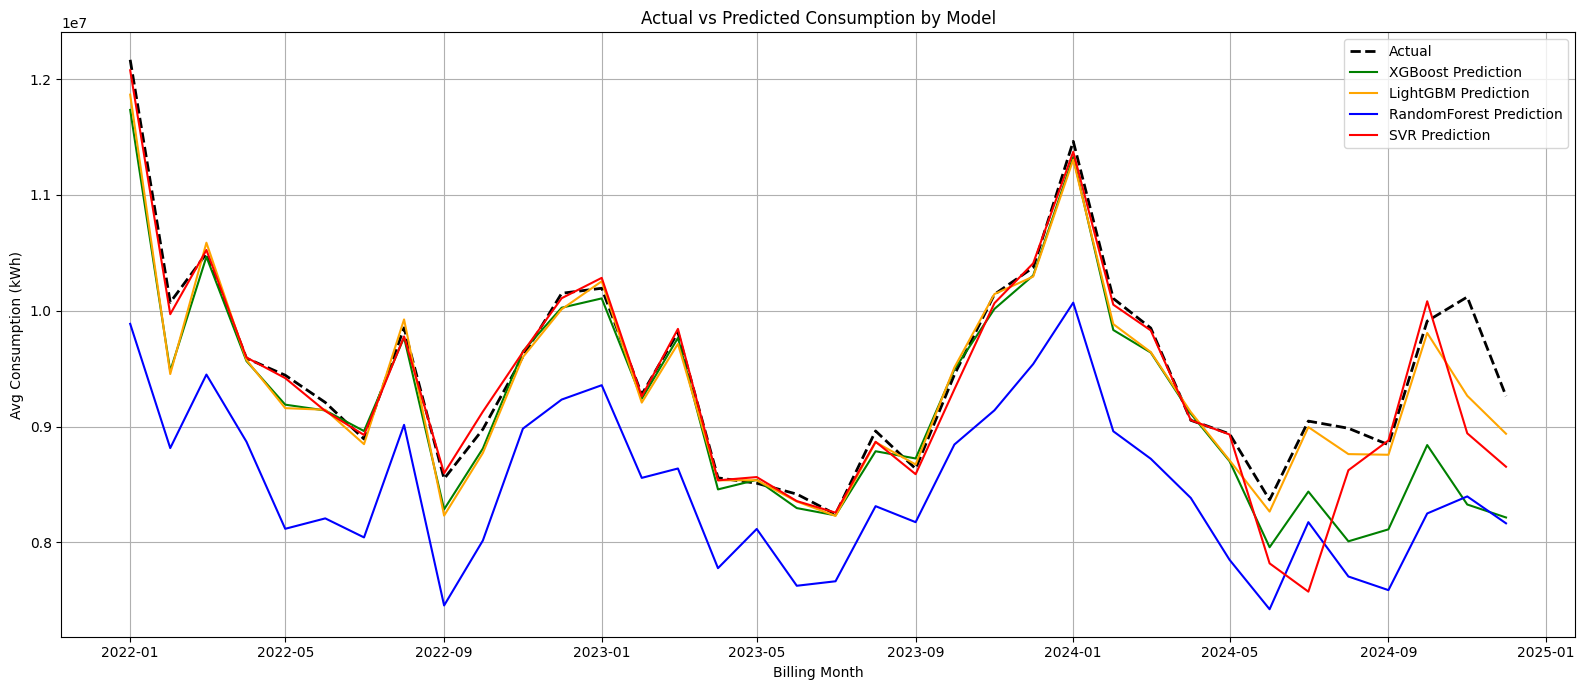

In [202]:
plot_actual_vs_multiple_predictions(
    aligned_df,
    y,
    {
        "XGBoost": y_pred_xgb_full,
        "LightGBM": y_pred_lgbm_full,
        "RandomForest": y_pred_rf_full,
        "SVR": y_pred_svr_full
    }
)


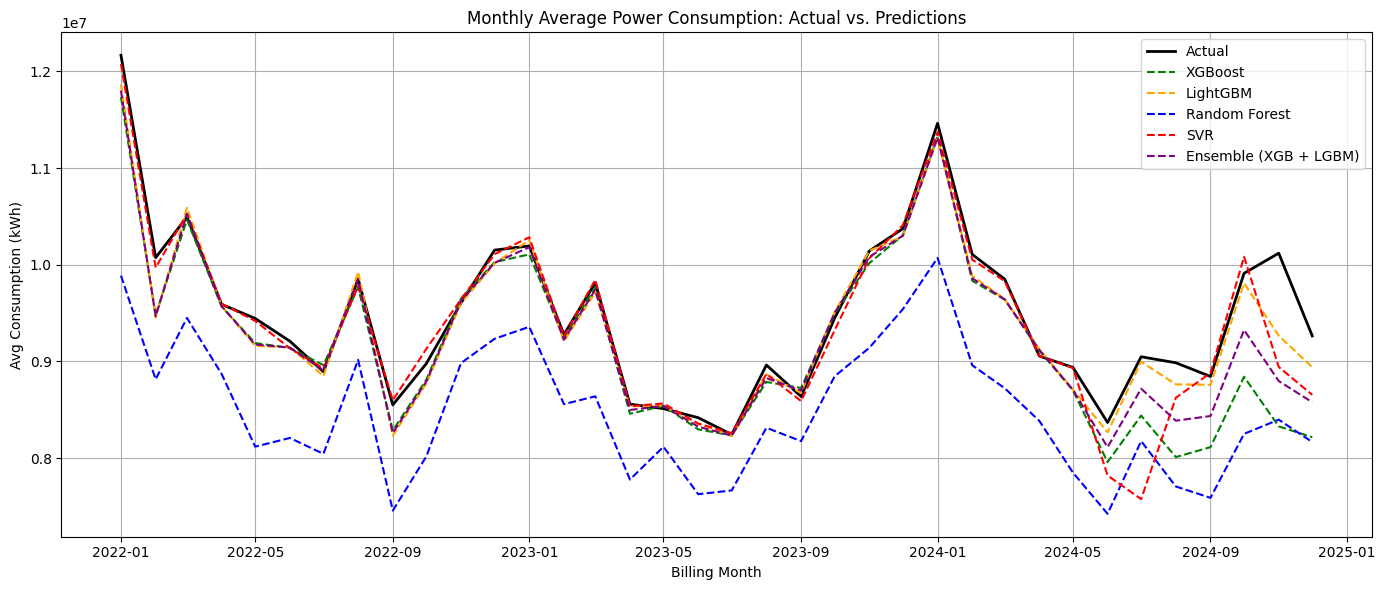

In [203]:
# Ensemble prediction
y_pred_ensemble_full = (y_pred_xgb_full + y_pred_lgbm_full) / 2

# Plot actual vs multiple predictions

def plot_actual_vs_multiple_predictions(df_original, y_actual, prediction_dict):
    df_copy = df_original.copy().reset_index(drop=True)
    df_copy['actual'] = y_actual.values

    grouped = df_copy.groupby('original_billing_month')['actual'].mean().reset_index()

    plt.figure(figsize=(14, 6))
    plt.plot(grouped['original_billing_month'], grouped['actual'], label='Actual', color='black', linewidth=2)

    colors = ['green', 'orange', 'blue', 'red', 'purple']
    for i, (model_name, y_pred) in enumerate(prediction_dict.items()):
        df_copy['predicted'] = y_pred
        pred_grouped = df_copy.groupby('original_billing_month')['predicted'].mean().reset_index()
        plt.plot(pred_grouped['original_billing_month'], pred_grouped['predicted'],
                 label=f'{model_name}', linestyle='--', color=colors[i % len(colors)])

    plt.title("Monthly Average Power Consumption: Actual vs. Predictions")
    plt.xlabel("Billing Month")
    plt.ylabel("Avg Consumption (kWh)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_actual_vs_multiple_predictions(
    aligned_df, y,
    {
        "XGBoost": y_pred_xgb_full,
        "LightGBM": y_pred_lgbm_full,
        "Random Forest": y_pred_rf_full,
        "SVR": y_pred_svr_full,
        "Ensemble (XGB + LGBM)": y_pred_ensemble_full
    }
)

## 3. Actual vs Predicted scatter plot

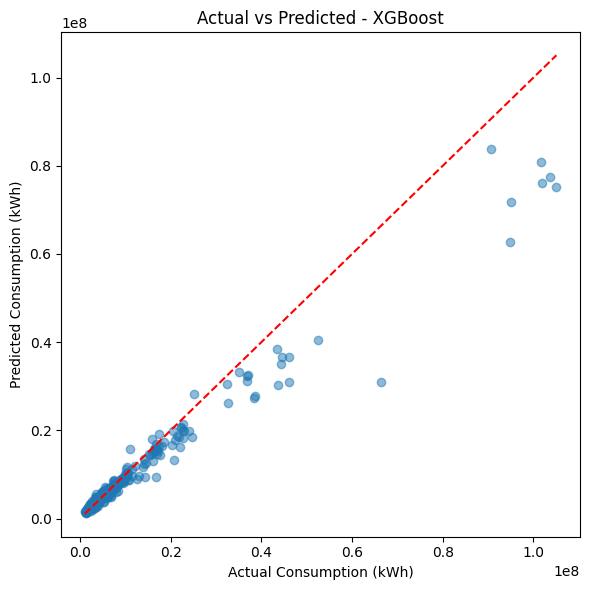

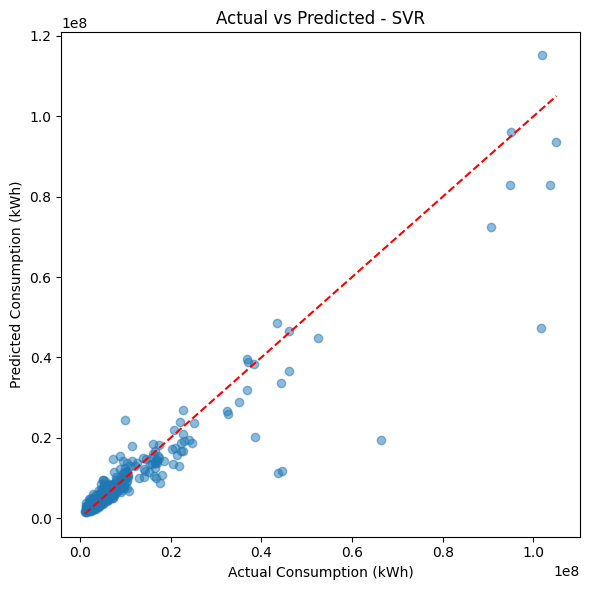

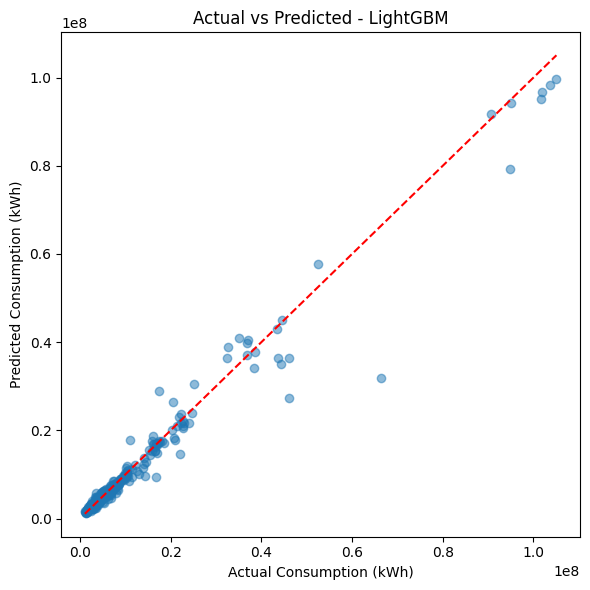

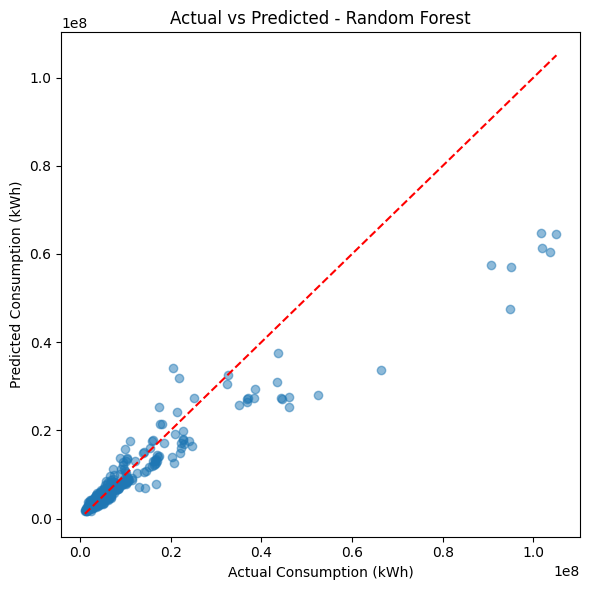

In [204]:
def plot_actual_vs_pred(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual Consumption (kWh)")
    plt.ylabel("Predicted Consumption (kWh)")
    plt.title(f"Actual vs Predicted - {model_name}")
    plt.tight_layout()
    plt.show()

plot_actual_vs_pred(y_test, y_test_pred_xgb, "XGBoost")
plot_actual_vs_pred(y_test, y_test_pred_svr, "SVR")
plot_actual_vs_pred(y_test, y_test_pred_lgbm, "LightGBM")
plot_actual_vs_pred(y_test, y_test_pred_rf, "Random Forest")

## 4. Residual distributions

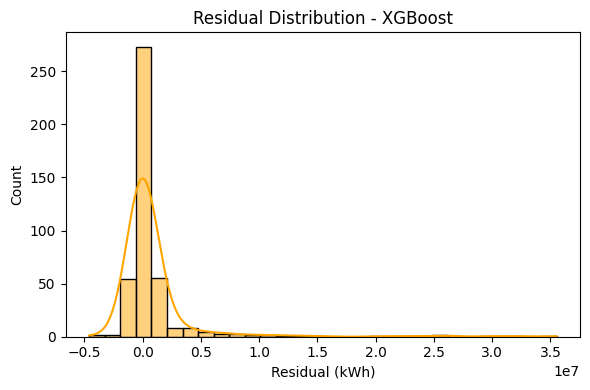

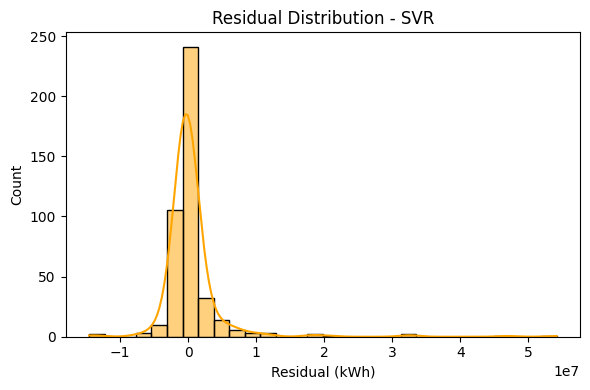

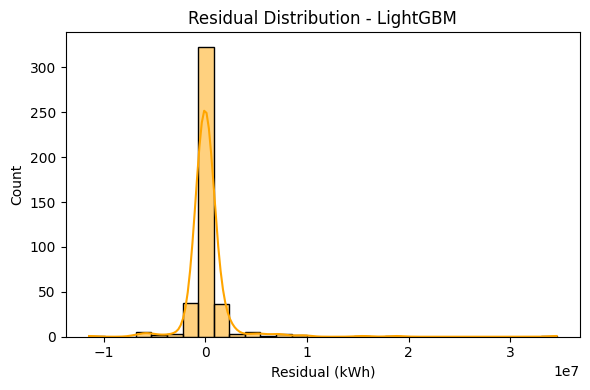

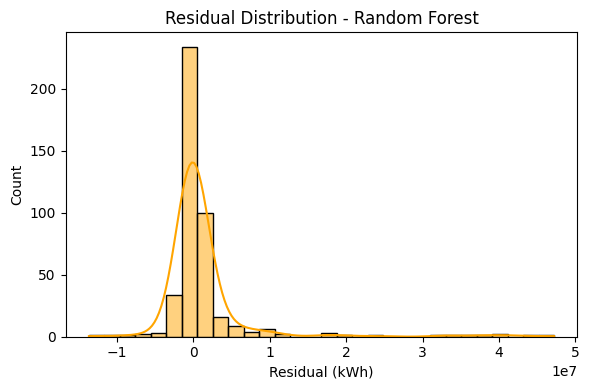

In [205]:
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, bins=30, kde=True,color="orange")
    plt.title(f"Residual Distribution - {model_name}")
    plt.xlabel("Residual (kWh)")
    plt.tight_layout()
    plt.show()

plot_residuals(y_test, y_test_pred_xgb, "XGBoost")
plot_residuals(y_test, y_test_pred_svr, "SVR")
plot_residuals(y_test, y_test_pred_lgbm, "LightGBM")
plot_residuals(y_test, y_test_pred_rf, "Random Forest")


## 5.County Predictions

In [206]:
def plot_county_predictions(df_original, y_test, y_pred, model_name):
    if 'original_county' not in df_original.columns:
        print("original_county not found.")
        return
    counties = df_original.iloc[-len(y_test):]['original_county'].reset_index(drop=True)
    actual_series = pd.Series(y_test.values).reset_index(drop=True)
    predicted_series = pd.Series(y_pred).reset_index(drop=True)
    compare_df = pd.DataFrame({
        'County': counties,
        'Actual': actual_series,
        'Predicted': predicted_series
    })
    grouped = compare_df.groupby('County').mean().sort_values("Actual", ascending=False)
    grouped.plot(kind='bar', figsize=(12, 6))
    plt.title(f"Average Actual vs Predicted by County: {model_name}")
    plt.ylabel("Consumption (kWh)")
    plt.tight_layout()
    plt.show()

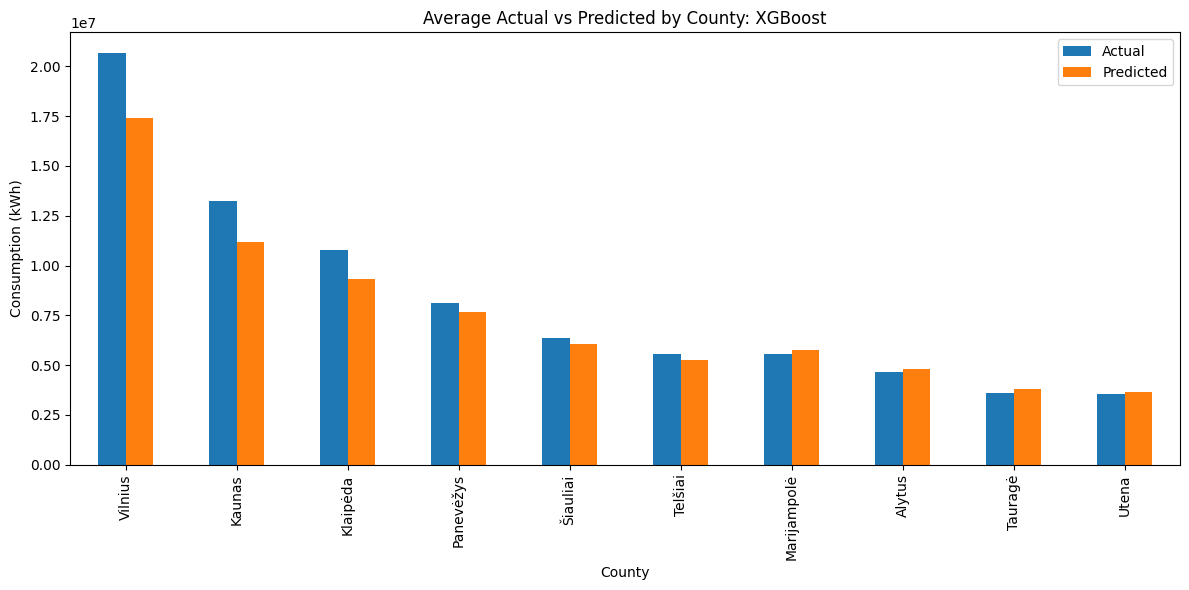

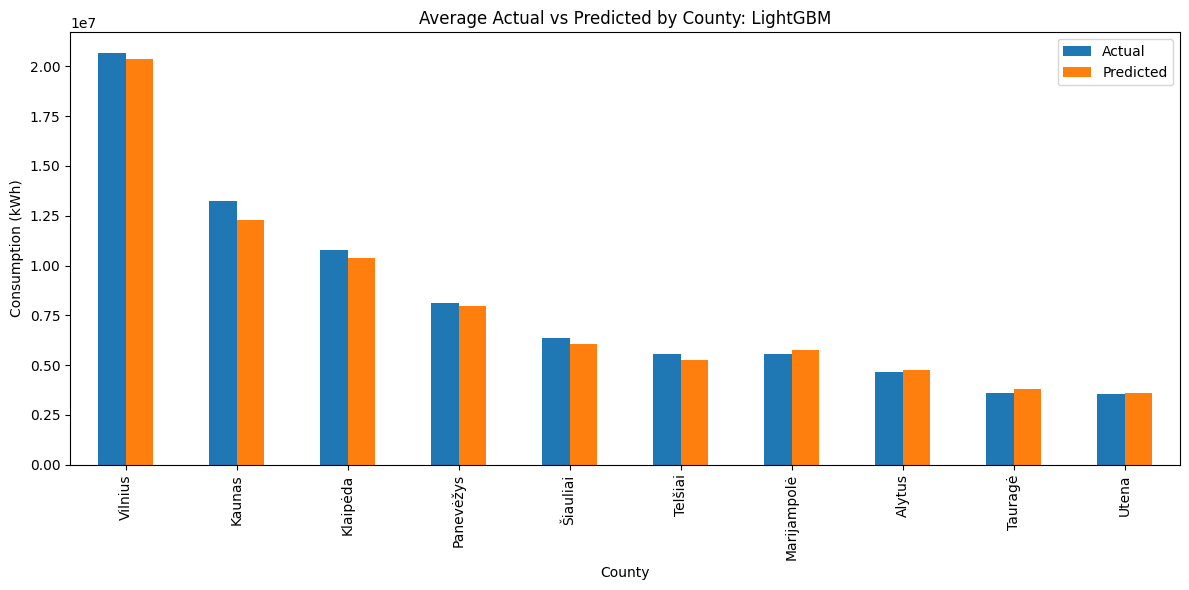

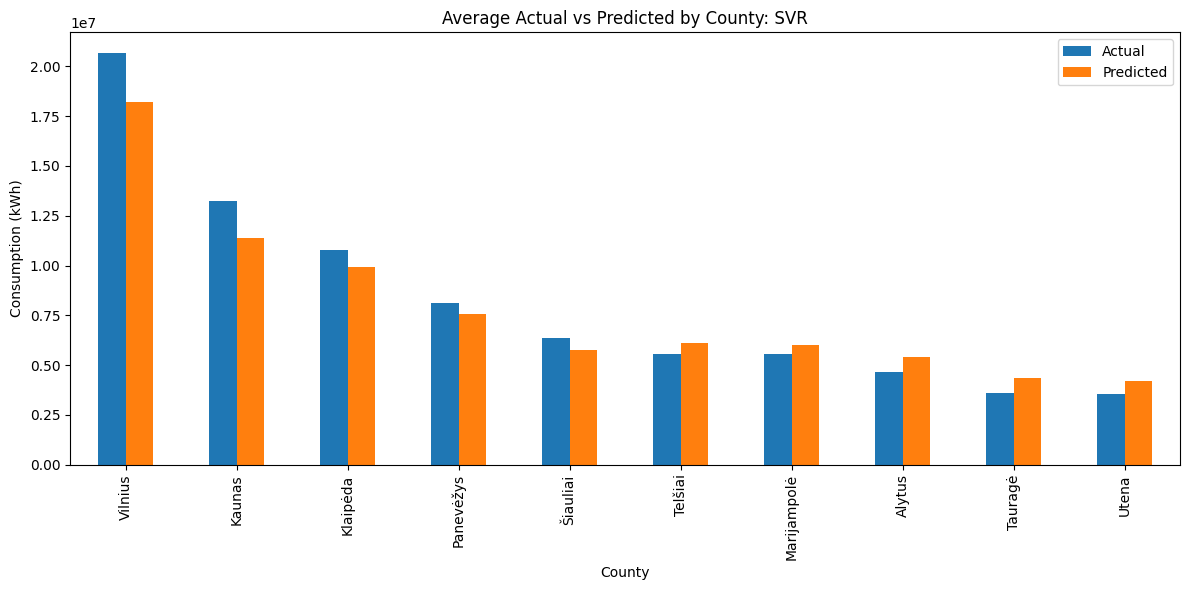

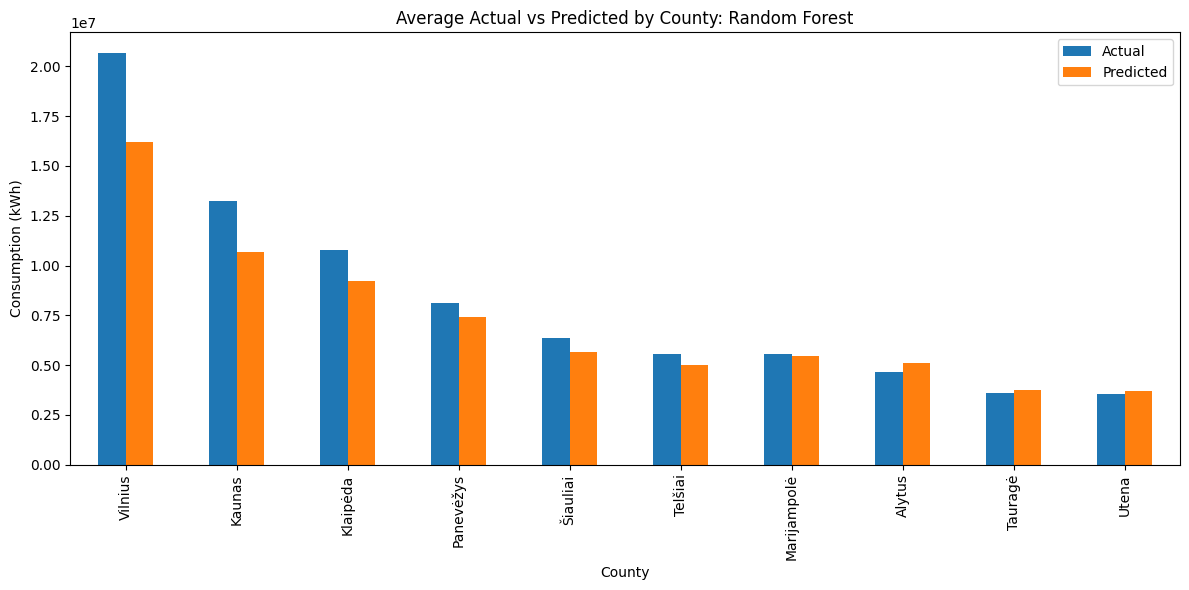

In [207]:
plot_county_predictions(df, y_test, y_test_pred_xgb, "XGBoost")
plot_county_predictions(df, y_test, y_test_pred_lgbm, "LightGBM")
plot_county_predictions(df, y_test, y_test_pred_svr, "SVR")
plot_county_predictions(df, y_test, y_test_pred_rf, "Random Forest")


## 6.Municipality electricity Consumption : Actual vs Predicted Over Time

In [208]:
def plot_combined_time_series(df_original, y_test, preds_dict):
    dates = df_original.iloc[-len(y_test):]['original_billing_month'].reset_index(drop=True)
    actual_series = pd.Series(y_test.values).reset_index(drop=True)
    
    # base dataframe
    compare_df = pd.DataFrame({'Month': dates, 'Actual': actual_series})
    
    for model_name, y_pred in preds_dict.items():
        compare_df[model_name] = pd.Series(y_pred).reset_index(drop=True)
    
    # group by month
    grouped = compare_df.groupby('Month').mean().reset_index()

    # Plot
    plt.figure(figsize=(16, 6))
    plt.plot(grouped['Month'], grouped['Actual'], label='Actual', linestyle='-', linewidth=2, color='black')

    for model_name in preds_dict.keys():
        plt.plot(grouped['Month'], grouped[model_name], label=model_name, linestyle='--')

    plt.title("Monthly Electricity Consumption: Actual vs Model Predictions")
    plt.xlabel("Billing Month")
    plt.ylabel("Avg Consumption (kWh)")
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()


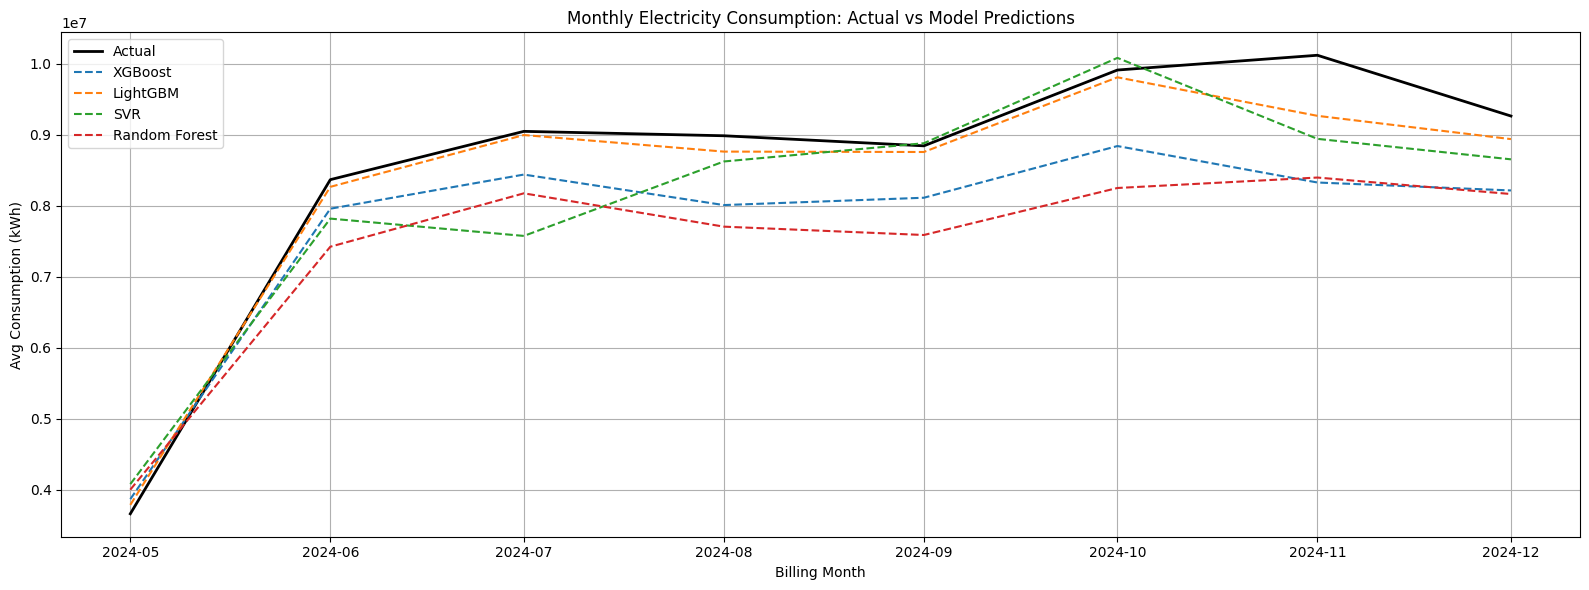

In [209]:

predictions = {
    "XGBoost": y_test_pred_xgb,
    "LightGBM": y_test_pred_lgbm,
    "SVR": y_test_pred_svr,
    "Random Forest": y_test_pred_rf,
    
}

plot_combined_time_series(aligned_df, y_test, predictions)


In [210]:
def plot_time_series(df_original, y_test, y_pred, model_name):
    dates = df_original.iloc[-len(y_test):]['original_billing_month'].reset_index(drop=True)
    actual_series = pd.Series(y_test.values).reset_index(drop=True)
    predicted_series = pd.Series(y_pred).reset_index(drop=True)
    compare_df = pd.DataFrame({
        'Month': dates,
        'Actual': actual_series,
        'Predicted': predicted_series
    })
    grouped = compare_df.groupby('Month').mean().reset_index()
    plt.figure(figsize=(14, 6))
    plt.plot(grouped['Month'], grouped['Actual'], label='Actual (avg)', linestyle='--', color='green')
    plt.plot(grouped['Month'], grouped['Predicted'], label='Predicted (avg)', marker='o', color='orange')
    plt.title(f"Average Monthly Consumption: Actual vs. Predicted")
    plt.xlabel("Billing Month")
    plt.ylabel("Avg Consumption (kWh)")
    plt.legend()
    plt.tight_layout()
    plt.show()


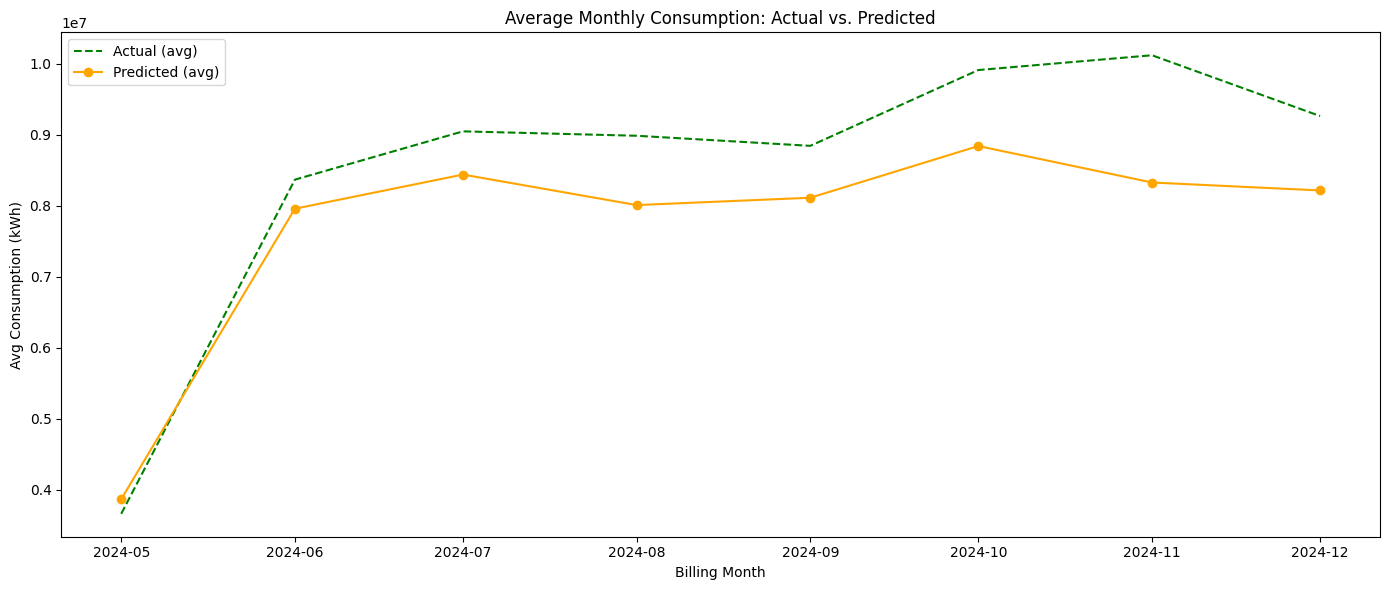

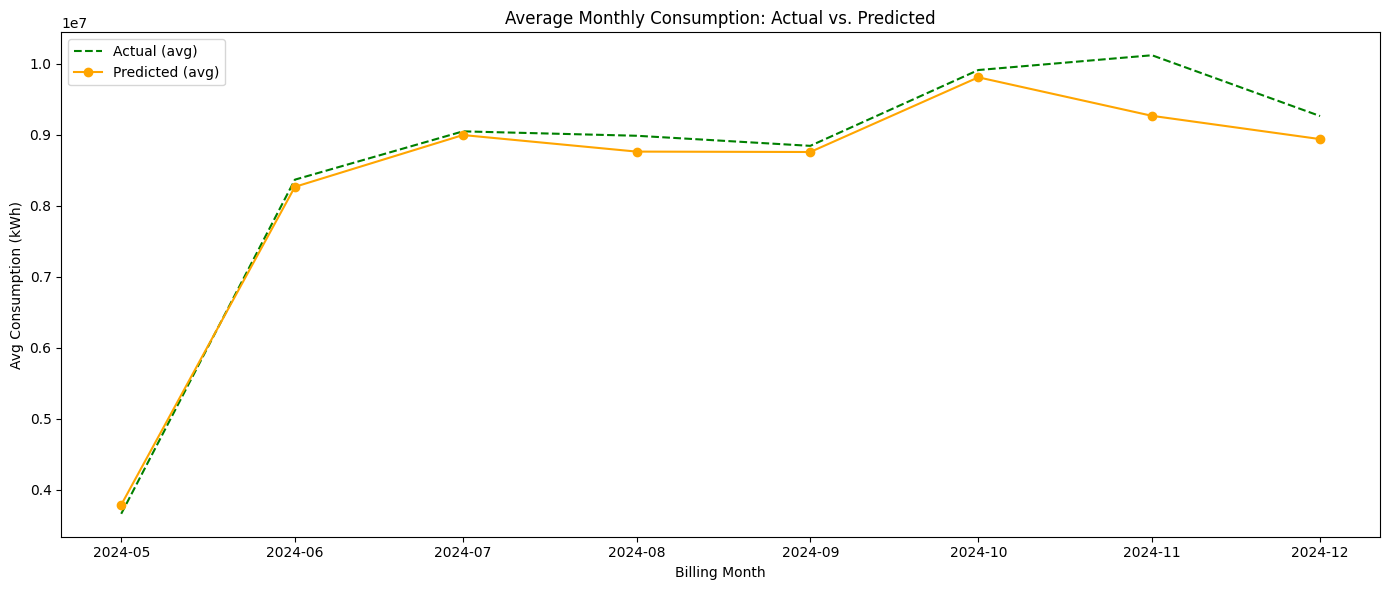

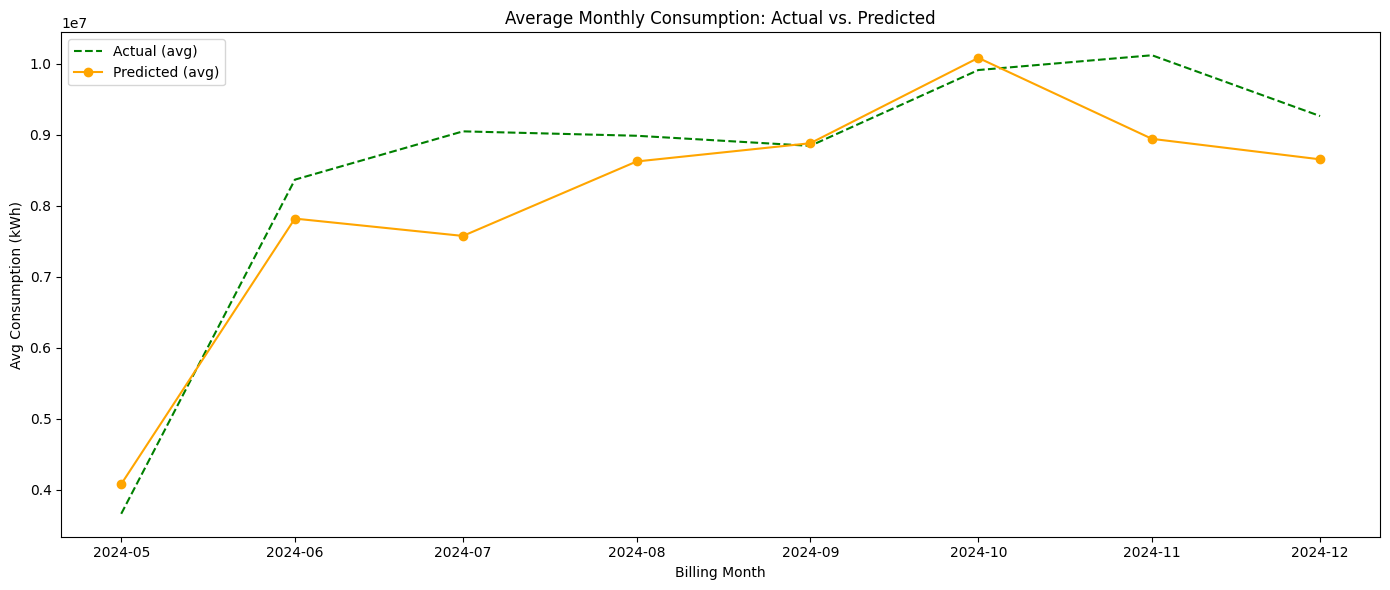

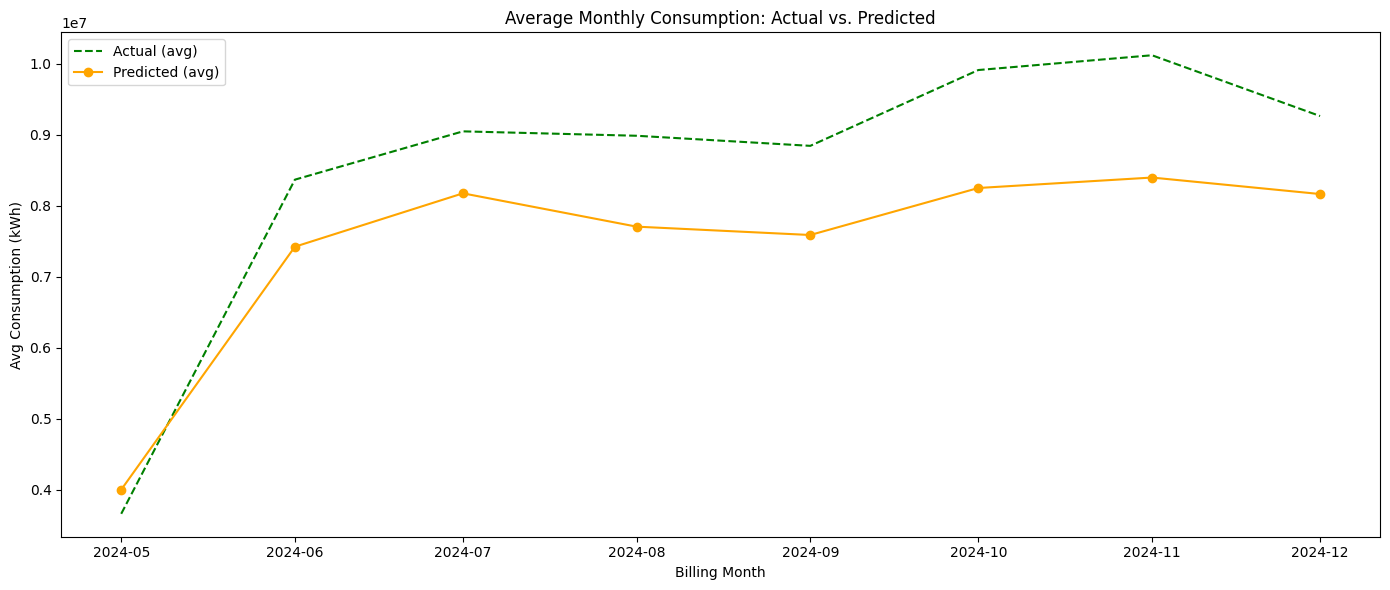

In [211]:
plot_time_series(df, y_test, y_test_pred_xgb, "XGBoost")
plot_time_series(df, y_test, y_test_pred_lgbm, "LightGBM")
plot_time_series(df, y_test, y_test_pred_svr, "SVR")
plot_time_series(df, y_test, y_test_pred_rf, "Random Forest")

## Monthly errors

In [212]:
def plot_monthly_error(df_original, y_test, y_pred, model_name):
    months = df_original.iloc[-len(y_test):]['month'].reset_index(drop=True)
    errors = abs(pd.Series(y_test.values) - pd.Series(y_pred)).reset_index(drop=True)
    error_df = pd.DataFrame({'Month': months, 'Absolute Error': errors})
    grouped = error_df.groupby('Month').mean()
    grouped.plot(kind='bar', figsize=(10, 5), legend=False)
    plt.title(f"Average Absolute Error by Month: {model_name}")
    plt.ylabel("Error (kWh)")
    plt.xlabel("Month")
    plt.tight_layout()
    plt.show()

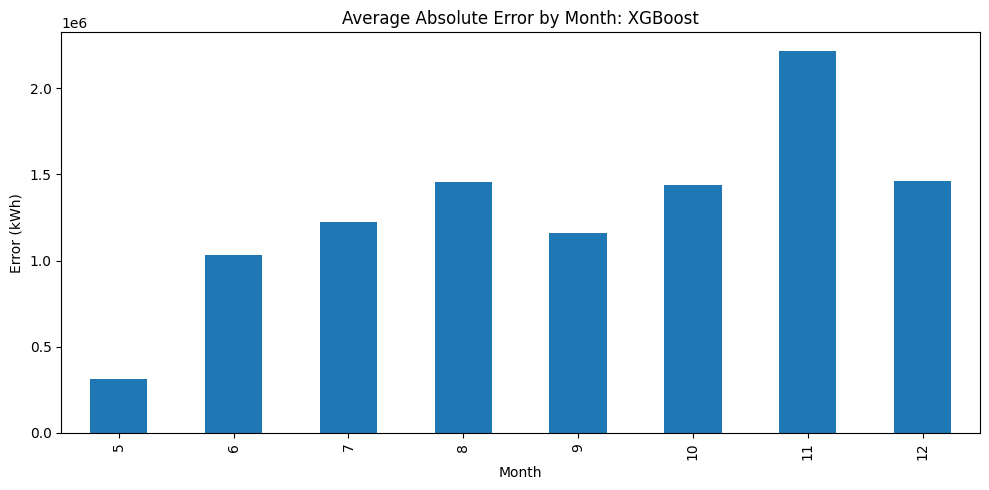

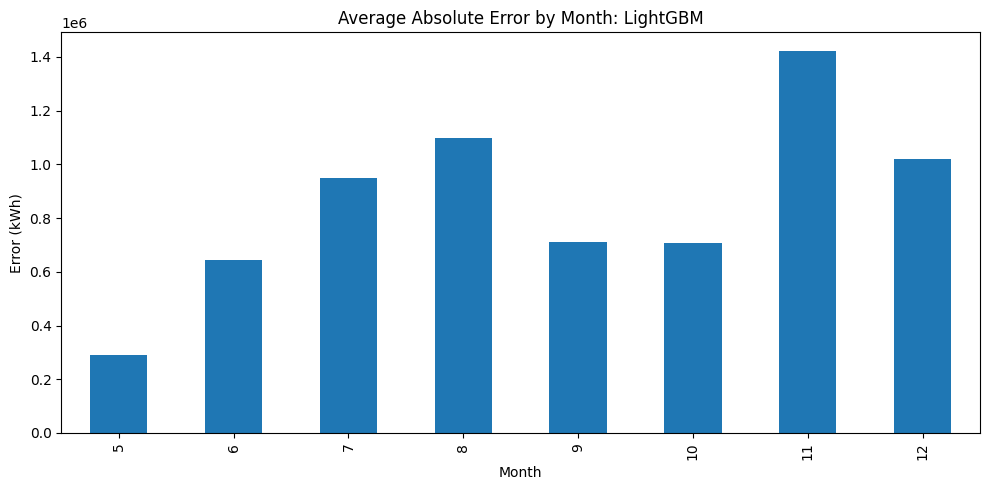

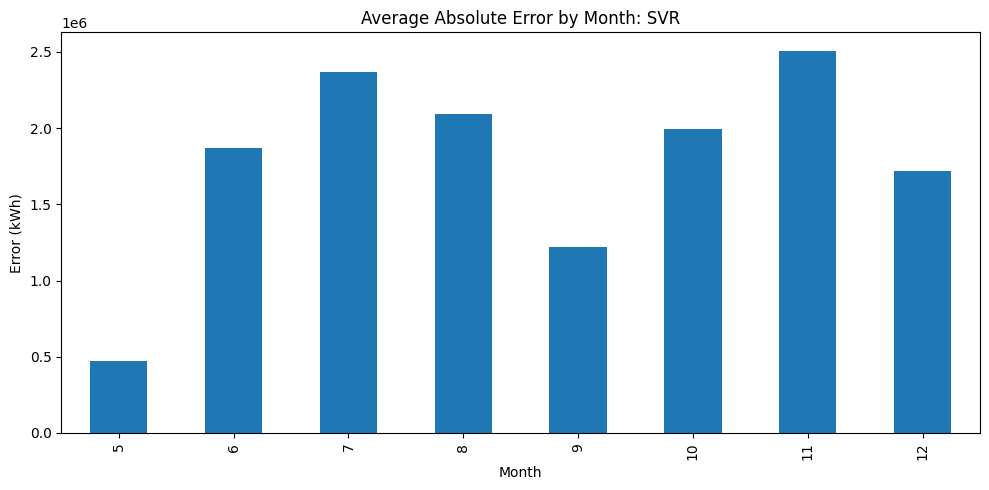

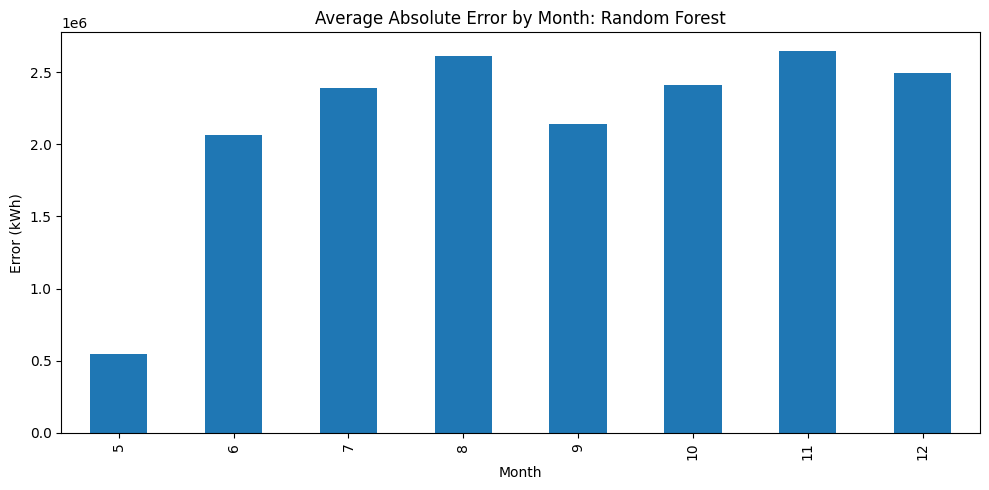

In [213]:
plot_monthly_error(df, y_test, y_test_pred_xgb, "XGBoost")
plot_monthly_error(df, y_test, y_test_pred_lgbm, "LightGBM")
plot_monthly_error(df, y_test, y_test_pred_svr, "SVR")
plot_monthly_error(df, y_test, y_test_pred_rf, "Random Forest")

In [214]:
def plot_actual_vs_predicted_all(y_true, preds_dict):
 
    plt.figure(figsize=(14, 10))

    for i, (model_name, y_pred) in enumerate(preds_dict.items(), 1):
        plt.subplot(2, 2, i)
        plt.scatter(y_true, y_pred, alpha=0.4, color='teal', edgecolor='k', s=40)
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
        plt.xlabel("Actual Consumption (kWh)")
        plt.ylabel("Predicted Consumption (kWh)")
        plt.title(f"{model_name}: Actual vs Predicted")
        plt.grid(True)

    plt.tight_layout()
    plt.show()


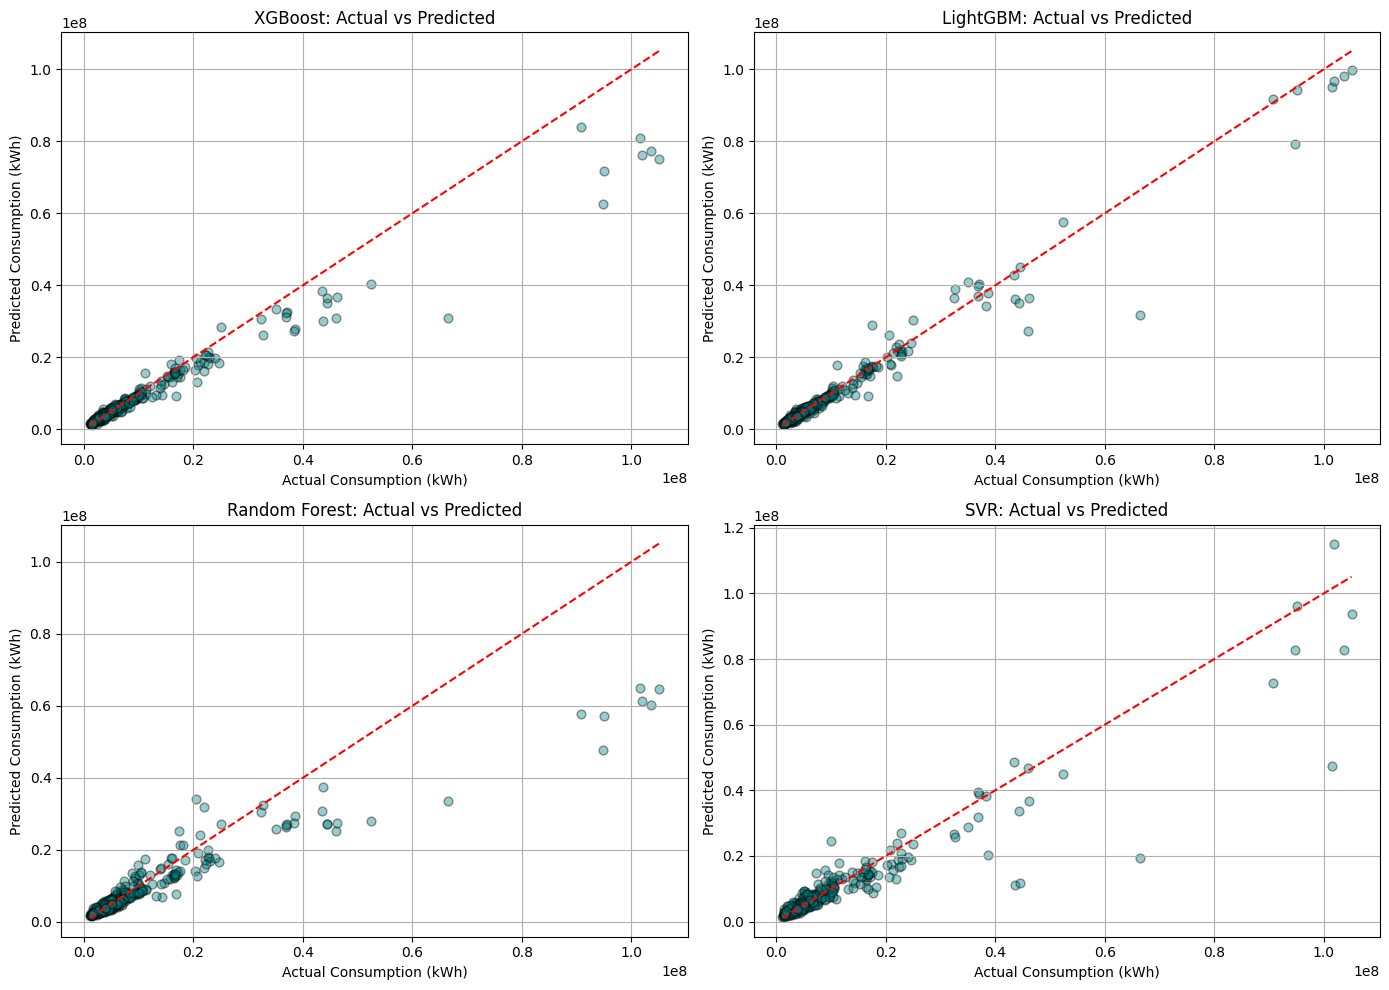

In [215]:
plot_actual_vs_predicted_all(
    y_test,
    {
        "XGBoost": y_test_pred_xgb,
        "LightGBM": y_test_pred_lgbm,
        "Random Forest": y_test_pred_rf,
        "SVR": y_test_pred_svr
    }
)


In [216]:
from sklearn.inspection import permutation_importance


perm_xgb = permutation_importance(xgb, X_test, y_test_log, scoring='r2', n_repeats=10, random_state=42, n_jobs=-1)
perm_lgbm = permutation_importance(lgbm, X_test, y_test_log, scoring='r2', n_repeats=10, random_state=42, n_jobs=-1)



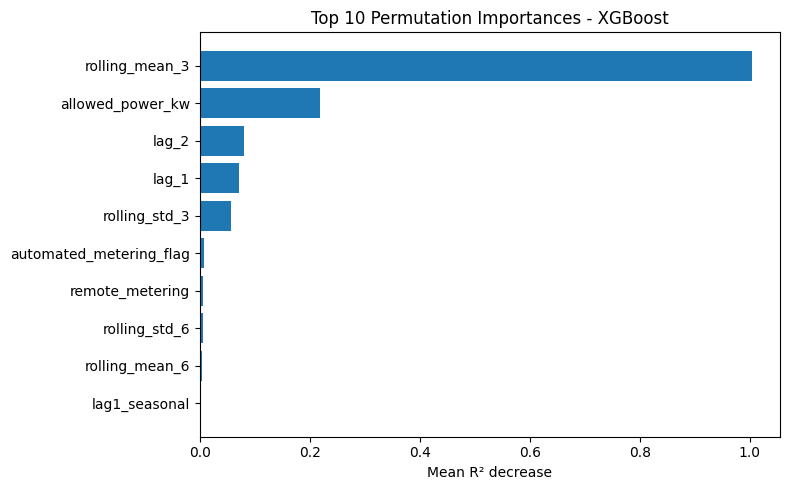

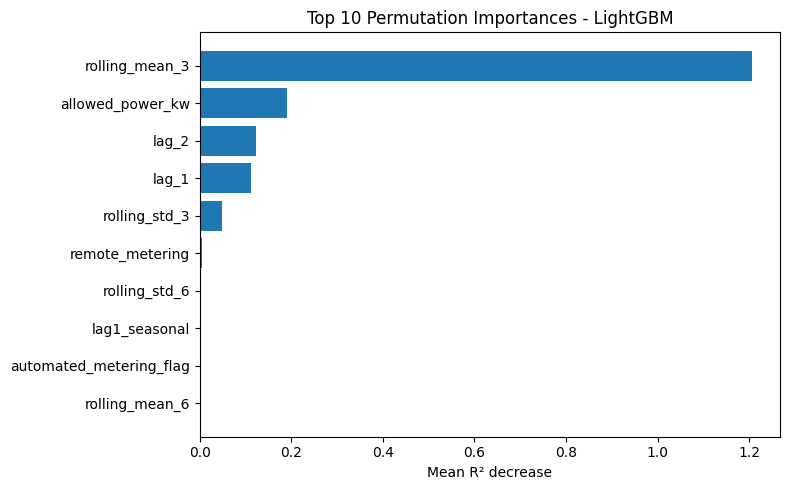

In [217]:

# 3. Extract and sort top features
def plot_permutation_importance(perm, model_name):
    sorted_idx = perm.importances_mean.argsort()[::-1][:10]
    plt.figure(figsize=(8, 5))
    plt.barh(range(10), perm.importances_mean[sorted_idx][::-1])
    plt.yticks(range(10), np.array(X_test.columns)[sorted_idx][::-1])
    plt.xlabel("Mean R² decrease")
    plt.title(f"Top 10 Permutation Importances - {model_name}")
    plt.tight_layout()
    plt.show()

# 4. Plot results
plot_permutation_importance(perm_xgb, "XGBoost")
plot_permutation_importance(perm_lgbm, "LightGBM")


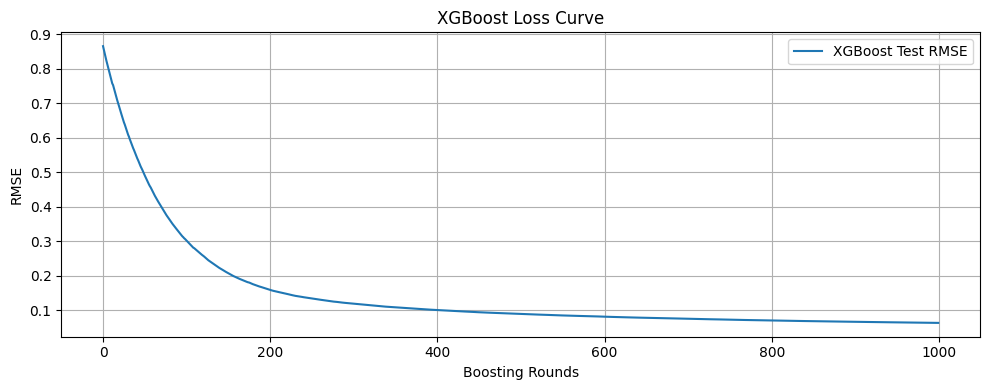

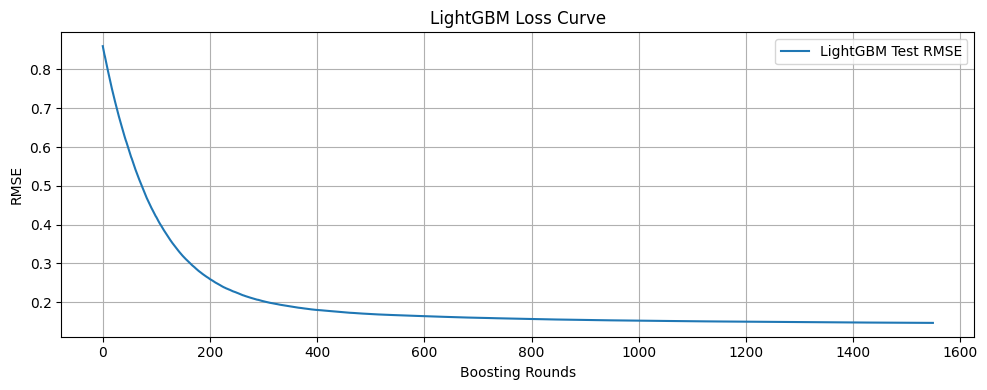

In [218]:
# Plot loss curves for XGBoost and LightGBM
results_xgb = xgb.evals_result()
plt.figure(figsize=(10, 4))
plt.plot(results_xgb['validation_0']['rmse'], label='XGBoost Test RMSE')
plt.title('XGBoost Loss Curve')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

results_lgbm = lgbm.evals_result_['valid_0']['rmse']
plt.figure(figsize=(10, 4))
plt.plot(results_lgbm, label='LightGBM Test RMSE')
plt.title('LightGBM Loss Curve')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

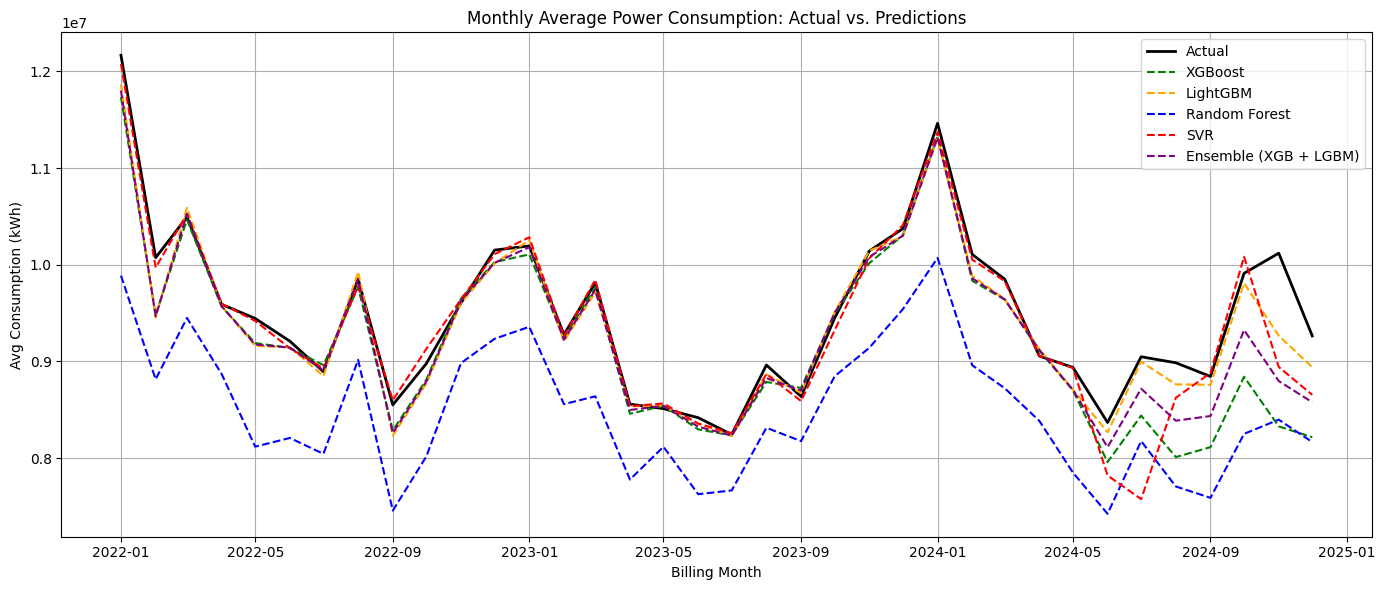

In [219]:
def plot_actual_vs_multiple_predictions(df_original, y_actual, prediction_dict):
    df_copy = df_original.copy().reset_index(drop=True)
    df_copy['actual'] = y_actual.values

    grouped = df_copy.groupby('original_billing_month')['actual'].mean().reset_index()

    plt.figure(figsize=(14, 6))
    plt.plot(grouped['original_billing_month'], grouped['actual'], label='Actual', color='black', linewidth=2)

    colors = ['green', 'orange', 'blue', 'red', 'purple']
    for i, (model_name, y_pred) in enumerate(prediction_dict.items()):
        df_copy['predicted'] = y_pred
        pred_grouped = df_copy.groupby('original_billing_month')['predicted'].mean().reset_index()
        plt.plot(pred_grouped['original_billing_month'], pred_grouped['predicted'],
                 label=f'{model_name}', linestyle='--', color=colors[i % len(colors)])

    plt.title("Monthly Average Power Consumption: Actual vs. Predictions")
    plt.xlabel("Billing Month")
    plt.ylabel("Avg Consumption (kWh)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_actual_vs_multiple_predictions(
    aligned_df, y,
    {
        "XGBoost": y_pred_xgb_full,
        "LightGBM": y_pred_lgbm_full,
        "Random Forest": y_pred_rf_full,
        "SVR": y_pred_svr_full,
        "Ensemble (XGB + LGBM)": y_pred_ensemble_full
    }
)

In [220]:
def plot_xgboost_loss_curve(model):
    results = model.evals_result()
    plt.figure(figsize=(10, 4))
    plt.plot(results['validation_0']['rmse'], label='XGBoost Test RMSE')
    plt.title('XGBoost Loss Curve')
    plt.xlabel('Boosting Rounds')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


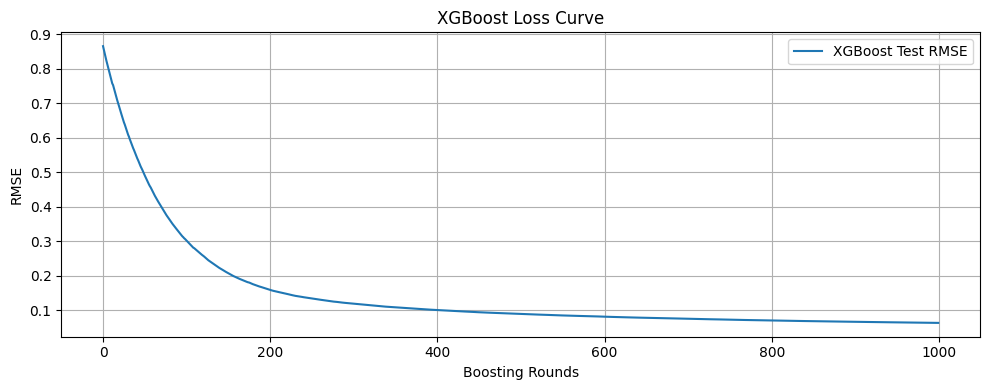

In [221]:
plot_xgboost_loss_curve(xgb)

# **Presentation stuff**

In [222]:

    def plot_residual_scatter(y_true, y_pred, model_name):
        residuals = y_true - y_pred
        plt.figure(figsize=(8, 5))
        plt.scatter(y_true, residuals, alpha=0.5)
        plt.axhline(0, color='red', linestyle='--')
        plt.xlabel("Actual Consumption (kWh)")
        plt.ylabel("Residuals (kWh)")
        plt.title(f"Residuals vs Actual - {model_name}")
        plt.tight_layout()
        plt.show()


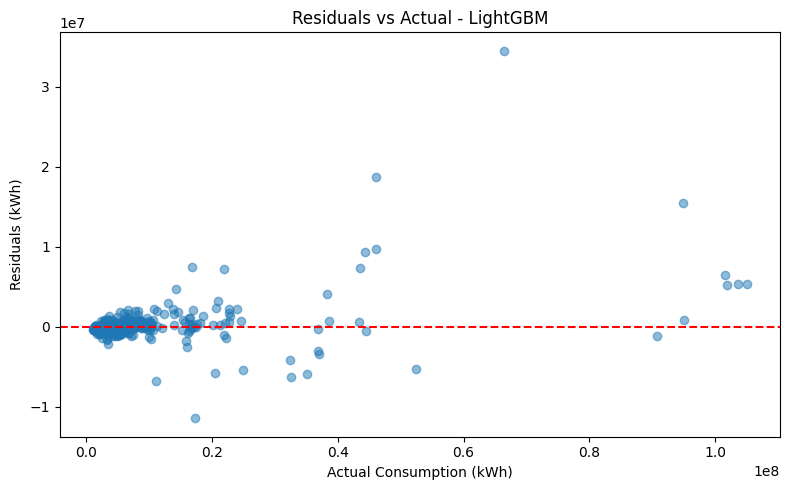

In [223]:
plot_residual_scatter(y_test, y_test_pred_lgbm, "LightGBM")


In [224]:
def plot_residual_histogram(y_true, y_pred, model_name):
    errors = y_pred - y_true
    plt.figure(figsize=(8, 4))
    sns.histplot(errors, bins=30, kde=True)
    plt.title(f"Prediction Error Distribution - {model_name}")
    plt.xlabel("Prediction Error (kWh)")
    plt.tight_layout()
    plt.show()


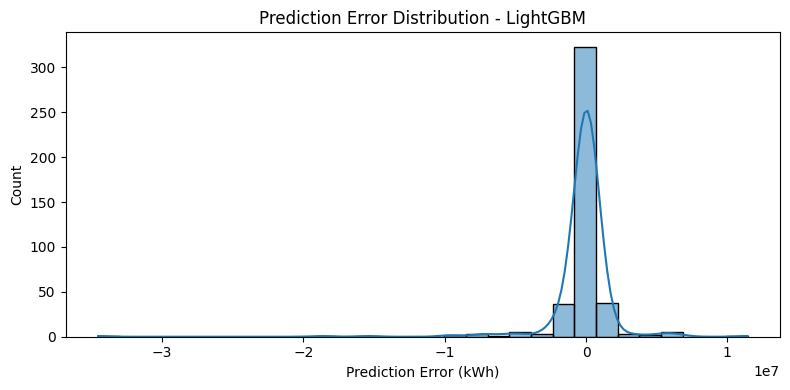

In [225]:
plot_residual_histogram(y_test, y_test_pred_lgbm, "LightGBM")

In [226]:
def bar_compare_metric(metric_values, metric_name):
    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(metric_values.keys()), y=list(metric_values.values()))
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} Comparison Across Models")
    plt.tight_layout()
    plt.show()


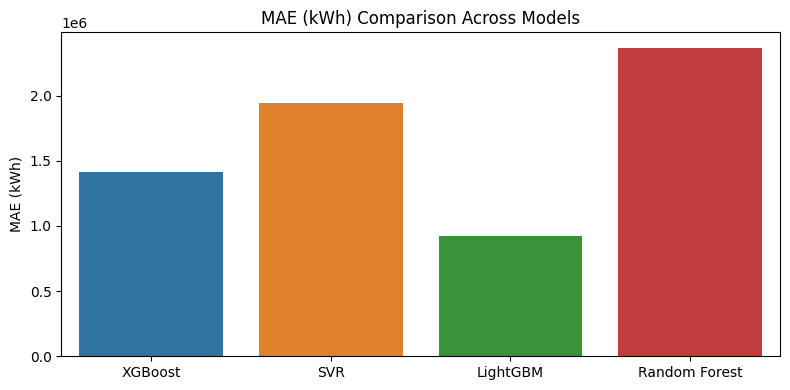

In [227]:
bar_compare_metric({
    'XGBoost': 1410958,
    'SVR': 1945799,
    'LightGBM': 926310,
    'Random Forest': 2367406
}, "MAE (kWh)")


**Count unique grid IDs**

In [228]:
# n_grids = df_cleaned['object_address_grid_id'].nunique()
# print(f"Unique grid cells: {n_grids}")


In [229]:
# user_counts = df_cleaned.groupby('object_address_grid_id')['client_id'].nunique()
# print(user_counts.describe())  # min, max, mean users per grid


In [230]:
# coverage = df_cleaned.groupby(['object_address_grid_id', 'billing_month'])['client_id'].count().reset_index()
# coverage_counts = coverage.groupby('object_address_grid_id')['billing_month'].count()
# print(coverage_counts.describe())  # How many months per grid


In [231]:
# unique_dates = df_cleaned['billing_month'].unique()
# print(f"Total unique billing months: {len(unique_dates)}")
# print("Billing months:", sorted(unique_dates))

In [232]:
# df_cleaned.head(3)

In [233]:
# df_cleaned.shape

In [234]:
# df_cleaned.isna().sum()

In [235]:
# unique_muncipalities = df_cleaned['object_municipality'].unique()
# unique_muncipalities

In [236]:

# # Counts per municipality
# municipality_counts = df_cleaned['object_municipality'].value_counts()
# print("\nMunicipality value counts:")
# print(municipality_counts)

# # Top 20 municipalities


# municipality_counts.head(20).plot(kind='barh', figsize=(10,8))
# plt.gca().invert_yaxis()
# plt.xlabel("Number of rows")
# plt.title("Top 20 Municipalities by Data Volume")
# plt.show()

In [237]:
# query = """
# SELECT
#     object_municipality,
#     MIN(billing_month) AS first_month,
#     MAX(billing_month) AS last_month,
#     COUNT(DISTINCT billing_month) AS months_covered,
#     COUNT(*) AS total_records
# FROM energy_cleaned
# GROUP BY object_municipality
# ORDER BY months_covered DESC
# """

# # Execute and fetch results into a df
# df_municipality_coverage = con.execute(query).fetchdf()

# print(df_municipality_coverage)

In [238]:
# pd.set_option('display.max_rows', None)

# query = """
# SELECT
#     object_municipality,
#     MIN(billing_month) AS first_month,
#     MAX(billing_month) AS last_month,
#     COUNT(DISTINCT billing_month) AS months_covered,
#     COUNT(*) AS total_records
# FROM energy_cleaned
# GROUP BY object_municipality
# ORDER BY months_covered DESC
# """

# # Execute and fetch results into a DataFrame (optional if you want to see nicely)
# df_municipality_coverage = con.execute(query).fetchdf()

# print(df_municipality_coverage)

In [239]:
# df_cleaned = df_cleaned[df_cleaned['object_municipality'].notna()]a

In [240]:
# df_cleaned.isna().sum()

In [241]:
# df_cleaned.shape

In [242]:
# #Grouping muncipalities separately
# # m.sav => city, r.sav => district, sav =>special cities
# df_cleaned['municipality_type'] = np.where(
#     df_cleaned['object_municipality'].str.contains('m. sav.'), 'city',
#     np.where(df_cleaned['object_municipality'].str.contains('r. sav.'), 'district', 'sav')
# )

In [243]:
# df_cleaned.head(20)

In [244]:
# # Total econsumed_kwh and total_consumption_kwh for object_muncipality
# #in descenfing order for unique objectid

# query = """
#       SELECT
#           object_municipality,
#           SUM(consumed_kwh) AS total_consumed_kwh,
#           SUM(total_consumption_kwh) AS total_total_consumption_kwh,
#           COUNT(DISTINCT object_id) AS unique_objects
#       FROM
#           energy_cleaned
#       GROUP BY
#           object_municipality
#       ORDER BY
#           total_consumed_kwh DESC
# """


# df_grouped = con.execute(query).fetchdf()
# pd.set_option('display.float_format', '{:.2f}'.format)


# df_grouped.head(20)

In [245]:
# df_cleaned.sample(5)

In [246]:
# municipality_type_grouped = duckdb.query("""
#     SELECT
#         municipality_type,
#         SUM(consumed_kwh) AS total_consumed_kwh,
#         SUM(total_consumption_kwh) AS total_total_consumption_kwh,
#         COUNT(DISTINCT object_id) AS unique_objects
#     FROM df_cleaned
#     GROUP BY municipality_type
#     ORDER BY total_consumed_kwh DESC
# """).to_df()

# municipality_type_grouped.head()

In [247]:
municipality_type_grouped

NameError: name 'municipality_type_grouped' is not defined

In [ ]:
# municipality_type_grouped.set_index('municipality_type')['total_total_consumption_kwh'].\
# plot(kind='bar',color=['#4CAF50', '#2196F3', '#FFC107'], figsize=(10,8))


# plt.title('Total Power Consumption by Municipality Type', fontsize=16)
# plt.xlabel('Municipality Type', fontsize=14)
# plt.ylabel('Total Consumption (kWh)', fontsize=14)

# # Display the plot
# plt.show()

* City muncipalities are consume the most power

* District muncipalities consume less than cities but still a lot

* Small independent muncipalities consume the least

In [ ]:
# labels = municipality_type_grouped['municipality_type']
# sizes = municipality_type_grouped['total_total_consumption_kwh']

# # Plot
# plt.figure(figsize=(8,8))
# plt.pie(
#     sizes,
#     labels=labels,
#     autopct='%1.1f%%',
#     startangle=140,
#     colors=['#4CAF50', '#2196F3', '#FFC107'],
#     wedgeprops={'edgecolor': 'black'}
# )

# plt.title('Total Power Consumption Distribution by Municipality Type', fontsize=16)
# plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
# plt.show()

In [ ]:
# df_cleaned['billing_month'] = pd.to_datetime(df_cleaned['billing_month'])

In [ ]:
# df_cleaned['billing_month'].head()

In [ ]:
# # Group by billing montha and muncipality type
# monthly_consumption = df_cleaned.groupby(
#     [df_cleaned['billing_month'], 'municipality_type']
# ).agg({
#     'consumed_kwh': 'sum',
#     'total_consumption_kwh': 'sum'
# }).reset_index()
# monthly_consumption.head()

In [ ]:
# pivot_data = monthly_consumption.pivot(index='billing_month', columns='municipality_type', values='total_consumption_kwh')

# # Plot
# pivot_data.plot(figsize=(15,8))
# plt.title('Monthly Total Consumption by Municipality Type')
# plt.xlabel('Billing Month')
# plt.ylabel('Total Consumption (kWh)')a
# plt.grid(True)
# plt.show()

In [ ]:
# top_municipalities = (
#     df_cleaned.groupby('object_municipality')['total_consumption_kwh']
#     .sum()
#     .sort_values(ascending=False)
#     .head(3)
#     .index
# )

In [ ]:
# df_top_municipalities = df_cleaned[df_cleaned['object_municipality'].isin(top_municipalities)]

In [ ]:
# monthly_top_municipalities = df_top_municipalities.groupby([df_top_municipalities['billing_month'],
#                                                     'object_municipality']).agg({'total_consumption_kwh': 'sum'}).reset_index()
# monthly_top_municipalities.head(12)

In [ ]:
# pivot_top = monthly_top_municipalities.pivot(index='billing_month', columns='object_municipality', values='total_consumption_kwh')

# pivot_top.plot(figsize=(15,8))
# plt.title('Monthly Total Consumption for Top 3 Municipalities')
# plt.xlabel('Billing Month')
# plt.ylabel('Total Consumption (kWh)')
# plt.grid(True)
# plt.legend(title='Municipality')
# plt.show()

In [ ]:
# df_cleaned.head(3)

In [ ]:
# query = """
# WITH top_municipalities AS (
#     SELECT 
#         object_municipality,
#         SUM(total_consumption_kwh) AS total_consumption
#     FROM df_cleaned
#     GROUP BY object_municipality
#     ORDER BY total_consumption DESC
#     LIMIT 3
# )

# SELECT 
#     billing_month,
#     object_municipality,
#     SUM(total_consumption_kwh) AS monthly_total_consumption
# FROM df_cleaned
# WHERE object_municipality IN (SELECT object_municipality FROM top_municipalities)
# GROUP BY billing_month, object_municipality
# ORDER BY billing_month, object_municipality
# """

# monthly_top_municipalities = duckdb.query(query).to_df()
# monthly_top_municipalities.sample(5)

In [ ]:
# pivot_top = monthly_top_municipalities.pivot(index='billing_month', columns='object_municipality', values='monthly_total_consumption')

# pivot_top.plot(figsize=(15,8))
# plt.title('Monthly Total Consumption for Top 5 Municipalities')
# plt.xlabel('Billing Month')
# plt.ylabel('Total Consumption (kWh)')
# plt.grid(True)
# plt.legend(title='Municipality')
# plt.show()

In [ ]:
# df_cleaned.head()

In [ ]:
# monthly_top_municipalities.columns

$$ \text{Growth Rate (\%)} = \left( \frac{\text{Current Month} - \text{Previous Month}}{\text{Previous Month}} \right) \times 100 $$

In [ ]:
# monthly_top_municipalities = monthly_top_municipalities.sort_values(['object_municipality', 'billing_month'])

# monthly_top_municipalities['growth_rate_percentage'] = monthly_top_municipalities.groupby('object_municipality')['monthly_total_consumption'].pct_change() * 100

In [ ]:
# monthly_top_municipalities['object_municipality'].unique()

In [ ]:
# plt.figure(figsize=(14, 8))

# for municipality in monthly_top_municipalities['object_municipality'].unique():
#     subset = monthly_top_municipalities[monthly_top_municipalities['object_municipality'] == municipality]
#     plt.plot(subset['billing_month'], subset['growth_rate_percentage'], label=municipality)

# plt.xlabel('Month')
# plt.ylabel('Growth Rate (%)')
# plt.title('Monthly Growth Rate per Municipality')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# vilnius_data = monthly_top_municipalities[monthly_top_municipalities['object_municipality'] == 'Vilniaus m. sav.']

# plt.figure(figsize=(10, 6))
# plt.plot(vilnius_data['billing_month'], vilnius_data['growth_rate_percentage'], marker='o')
# plt.xlabel('Month')
# plt.ylabel('Growth Rate (%)')
# plt.title('Vilnius Municipality Growth Rate Over Time')
# plt.grid(True)
# plt.show()

In [ ]:
# import requests
# import pandas as pd
# from datetime import datetime
# from dateutil.relativedelta import relativedelta


In [ ]:
# # Coordinates for top 3 municipalities
# cities = {
#     "Vilniaus m. sav.": {"lat": 54.6872, "lon": 25.2797},
#     "Kauno m. sav.": {"lat": 54.8985, "lon": 23.9036},
#     "Klaipėdos m. sav.": {"lat": 55.7033, "lon": 21.1443},
# }

# # Generate list of first days of each month from Jan 2022 to Dec 2024
# start_date = datetime(2022, 1, 1)
# end_date = datetime(2024, 12, 1)
# months = [start_date + relativedelta(months=i) for i in range((end_date.year - start_date.year)*12 + end_date.month - start_date.month + 1)]

# def fetch_monthly_weather(lat, lon, start_date, end_date):
#     url = "https://archive-api.open-meteo.com/v1/archive"
#     params = {
#         "latitude": lat,
#         "longitude": lon,
#         "start_date": start_date.strftime("%Y-%m-%d"),
#         "end_date": end_date.strftime("%Y-%m-%d"),
#         "daily": ["temperature_2m_max", "temperature_2m_min", "precipitation_sum"],
#         "timezone": "Europe/Vilnius"
#     }
#     response = requests.get(url, params=params)
#     data = response.json()
    
#     if 'daily' in data:
#         df = pd.DataFrame(data['daily'])
#         df['date'] = pd.to_datetime(df['time'])
#         return df[['date', 'temperature_2m_max', 'temperature_2m_min', 'precipitation_sum']]
#     else:
#         return pd.DataFrame()


In [ ]:
# data

In [ ]:
# weather_records = []

# for city, coords in cities.items():
#     print(f"Fetching weather for {city}...")
#     for month in months:
#         start = month
#         end = month + relativedelta(months=1) - relativedelta(days=1)
#         df = fetch_monthly_weather(coords["lat"], coords["lon"], start, end)
#         if not df.empty:
#             df['city'] = city
#             df['month'] = df['date'].dt.to_period('M')
#             monthly_avg = df.groupby('month').agg({
#                 'temperature_2m_max': 'mean',
#                 'temperature_2m_min': 'mean',
#                 'precipitation_sum': 'sum'
#             }).reset_index()
#             monthly_avg['city'] = city
#             weather_records.append(monthly_avg)

# # Combine all city-month weather into one DataFrame
# weather_df = pd.concat(weather_records, ignore_index=True)
# weather_df['month'] = weather_df['month'].astype(str)


In [ ]:
# weather_df.head(10)

In [ ]:
# weather_df.dtypes

**Resampling weather data to monthly**

In [ ]:
# weather_df['month'] = pd.to_datetime(weather_df['month']) 

# weather_df.head(3)

In [ ]:
# monthly_weather = weather_df.groupby(['month', 'city']).agg({
#     'temperature_2m_max': 'mean',
#     'temperature_2m_min': 'mean',
#     'precipitation_sum': 'mean'  
# }).reset_index()
# monthly_weather.head(3)

In [ ]:
# #changing the column name from month to billing month
# monthly_weather = monthly_weather.rename(columns = {'month':'billing_month'})
# monthly_weather['city'] = monthly_weather['city'].replace({
#     'Kauno m. sav.': 'Kaunas',
#     'Klaipėdos m. sav.': 'Klaipeda',
#     'Vilniaus m. sav.': 'Vilnius'
# })

# monthly_weather.head(3)

In [ ]:
# #creating a dict so that we can use to fetch these particular data
# city_map = {
#     'Vilniaus m. sav.': 'Vilnius',
#     'Kauno m. sav.': 'Kaunas',
#     'Klaipėdos m. sav.': 'Klaipėda'
# }

In [ ]:
# monthly_top_municipalities['city'] = monthly_top_municipalities['object_municipality'].map(city_map)
# monthly_top_municipalities.sample(3)

In [ ]:
# monthly_weather = monthly_weather.rename(columns = {'month':'billing_month'})
# monthly_weather.head(3)

**Merging the weather data and power consumption data**

In [ ]:
# print(monthly_top_municipalities.columns)
# print(monthly_weather.columns)

In [ ]:
# merged_df = pd.merge(
#     monthly_top_municipalities,
#     monthly_weather,
#     how='left',
#     on=['billing_month', 'city']
# )

In [ ]:
# merged_df
# merged_df = merged_df.drop(columns=['object_municipality'])



In [ ]:
# merged_df.sample(3)

In [ ]:
# merged_df.dtypes

In [ ]:
# merged_df.describe()

In [ ]:
# merged_df.isna().sum()

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))
# for city in merged_df['city'].unique():
#     city_data = merged_df[merged_df['city'] == city]
#     plt.plot(city_data['billing_month'], city_data['monthly_total_consumption'], label=city)

# plt.title('Monthly Energy Consumption by City')
# plt.xlabel('Month')
# plt.ylabel('Consumption (kWh)')
# plt.legend()
# plt.grid()
# plt.show()

In [ ]:
# # Calculate correlations
# corr = merged_df[['monthly_total_consumption', 'temperature_2m_max', 'precipitation_sum']].corr()
# print(corr)

In [ ]:
# city_stats = merged_df.groupby('city').agg({
#     'monthly_total_consumption': 'mean',
#     'temperature_2m_max': 'mean'
# }).round(2)
# print(city_stats)

In [ ]:
# print(merged_df['billing_month'].head())

In [ ]:
# city_stats['temperature_2m_max']

In [ ]:
# translation = {
#     'iraso_id': 'record_id',
#     'kliento_id': 'client_id',
#     'objekto_id': 'object_id',
#     'objekto_savivaldybe': 'object_municipality',
#     'obj_adreso_gardele._id': 'object_address_grid_id',
#     'imones_kodas': 'company_code',
#     'evrk_2_red': 'industry_code',
#     'obj_galioja_nuo': 'valid_from',
#     'obj_galioja_iki': 'valid_until',
#     'apskaitos_men': 'billing_month',
#     'atgauta_kwh': 'recovered_kwh',
#     'suvartota_kwh': 'consumed_kwh',
#     'bendras_suvartojimas_kwh': 'total_consumption_kwh',
#     'duomenis_pateike': 'data_provider',
#     'im_adreso_gardele._id': 'company_address_grid_id',
#     'nutoles_gv': 'remote_metering',
#     'automatizuota_apskaita': 'automated_metering',
#     'el_pasto_adresas': 'email_address',
#     'telefono_nr': 'phone_number',
#     'obj_itampos_lygis': 'voltage_level',
#     'obj_itampa_kv': 'voltage_kv',
#     'leistina_galia_kw': 'allowed_power_kw',
#     'leistina_gen_galia_kw': 'allowed_generation_power_kw',
#     'instal_gen_galia_kw': 'installed_generation_power_kw',
#     'objekto_gamintojo_tipas': 'producer_type'
# }

# # Rename the columns
# df.rename(columns=translation, inplace=True)

In [ ]:
# df.head()

In [ ]:
# df.columns

In [ ]:
# df['billing_month'] = pd.to_datetime(df['billing_month'])

In [ ]:
# year_counts = df['billing_month'].dt.year.value_counts().sort_index()
# print(year_counts)

In [ ]:
# # Filter for years 2022, 2023, and 2024
# df_filtered = df[df['billing_month'].dt.year.isin([2022, 2023, 2024])]


# # Save it if you want
# df_filtered.to_csv('power_consumption_data_2022_2024.csv', index=False)

In [ ]:
# df['billing_month'] = pd.to_datetime(df['billing_month'])

In [ ]:
# df['billing_month'].dtype

In [ ]:
# df['year'] = df['billing_month'].dt.year

# # 3. Find unique years
# unique_years = df['year'].unique()
# print(f"Unique years of data: {sorted(unique_years)}")

# # 4. Count how many years
# print(f"Total number of years: {len(unique_years)}")

In [ ]:
# df.drop('producer_type',axis=1,inplace=True)

In [ ]:
# df['year'].unique()

In [ ]:
# df.head()

In [ ]:
# df.shape

In [ ]:
# value_counts = df['voltage_level'].value_counts()

# # Filter out values that appear only once (non-repeated)
# repeated_values = value_counts[value_counts > 1]

# # Print the repeated values and their counts
# print(repeated_values)

In [ ]:


# # Columns to drop based on above analysis
# columns_to_drop = [
#     '_type', '_id', '_revision', '_page.next',
#     'record_id', 'client_id', 'object_id',
#     'object_address_grid_id', 'company_code',
#     'valid_from', 'valid_until', 'data_provider',
#     'company_address_grid_id',
#     'email_address', 'phone_number'
# ]

# # Actually drop them
# df_clean = df.drop(columns=columns_to_drop,axis=1)

# # Check results
# print(f"New shape: {df_clean.shape}")
# print(df_clean.columns)

In [ ]:
#To fetch the missing coordinates that missed after first downloading it 


# import requests
# import pandas as pd
# import time
# import os

# # Define expected columns
# expected_columns = ['object_municipality', 'year', 'month', 'tavg', 'tmin', 'tmax', 'prcp', 'wspd']
# checkpoint_file = "all_missing_weather_data.csv"

# # Load checkpoint only if it has valid structure
# if os.path.exists(checkpoint_file):
#     try:
#         fetched_weather_df = pd.read_csv(checkpoint_file)
#         if not all(col in fetched_weather_df.columns for col in expected_columns[:3]):
#             print("⚠ Checkpoint file exists but has no valid structure. Starting fresh.")
#             fetched_weather_df = pd.DataFrame(columns=expected_columns)
#         else:
#             print(f"✅ Resuming from: {len(fetched_weather_df)} rows")
#     except Exception as e:
#         print(f"⚠ Failed to read checkpoint, starting fresh: {e}")
#         fetched_weather_df = pd.DataFrame(columns=expected_columns)
# else:
#     fetched_weather_df = pd.DataFrame(columns=expected_columns)

# # Set of rows already fetched
# already_fetched = set(zip(fetched_weather_df['object_municipality'], fetched_weather_df['year'], fetched_weather_df['month']))

# # Container for new fetches
# new_data = []

# # Loop through missing rows
# for idx, row in missing_weather_df.iterrows():
#     key = (row['object_municipality'], int(row['year']), int(row['month']))
#     if key in already_fetched:
#         continue

#     lat = row['latitude']
#     lon = row['longitude']
#     year = key[1]
#     month = key[2]

#     start_date = f"{year}-{month:02d}-01"
#     end_date = f"{year + (month == 12)}-{(month % 12) + 1:02d}-01"

#     url = (
#         f"https://archive-api.open-meteo.com/v1/archive?"
#         f"latitude={lat}&longitude={lon}"
#         f"&start_date={start_date}&end_date={end_date}"
#         f"&daily=temperature_2m_min,temperature_2m_max,temperature_2m_mean,precipitation_sum,windspeed_10m_max"
#         f"&timezone=auto"
#     )

#     try:
#         response = requests.get(url, timeout=15)
#         response.raise_for_status()
#         data = response.json()

#         if 'daily' not in data or not data['daily']['time']:
#             print(f" No data for {key}")
#             continue

#         daily = pd.DataFrame(data['daily'])

#         record = {
#             'object_municipality': key[0],
#             'year': year,
#             'month': month,
#             'tavg': daily['temperature_2m_mean'].mean(),
#             'tmin': daily['temperature_2m_min'].min(),
#             'tmax': daily['temperature_2m_max'].max(),
#             'prcp': daily['precipitation_sum'].sum(),
#             'wspd': daily['windspeed_10m_max'].mean()
#         }

#         # Add to running DataFrame and checkpoint immediately
#         fetched_weather_df = pd.concat([fetched_weather_df, pd.DataFrame([record])], ignore_index=True)
#         fetched_weather_df.to_csv(checkpoint_file, index=False)

#         print(f"Fetched: {key}")
#         time.sleep(0.6)  # Respect API rate limits

#     except Exception as e:
#         print(f"Failed for {key}: {e}")
#         time.sleep(1)
#         continue
